# Rainfall Prediction - Weather Forecasting

Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [359]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Data
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#Shape of the dataset
df.shape

(8425, 23)

In [4]:
#Column Names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
#DataTypes of df dataset
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
#Separating Day/Month/Year column into separate columns in Day,Month,Year

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(['Date'], axis = 1,inplace=True) 
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# EDA

First I will start with the visualizations part.

Univariate Analysis

In [8]:
categorical_variables = df.select_dtypes(include=['O'])

categorical_variables

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
8420,Uluru,E,SE,ENE,No,No
8421,Uluru,NNW,SE,N,No,No
8422,Uluru,N,SE,WNW,No,No
8423,Uluru,SE,SSE,N,No,No


In [9]:
#frequency values in categorical variables
for i in categorical_variables:
    vc=df[i].value_counts()
    print(vc)
    print('-'*50)

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
--------------------------------------------------
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
--------------------------------------------------
N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64
--------------------------------------------------
SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    3

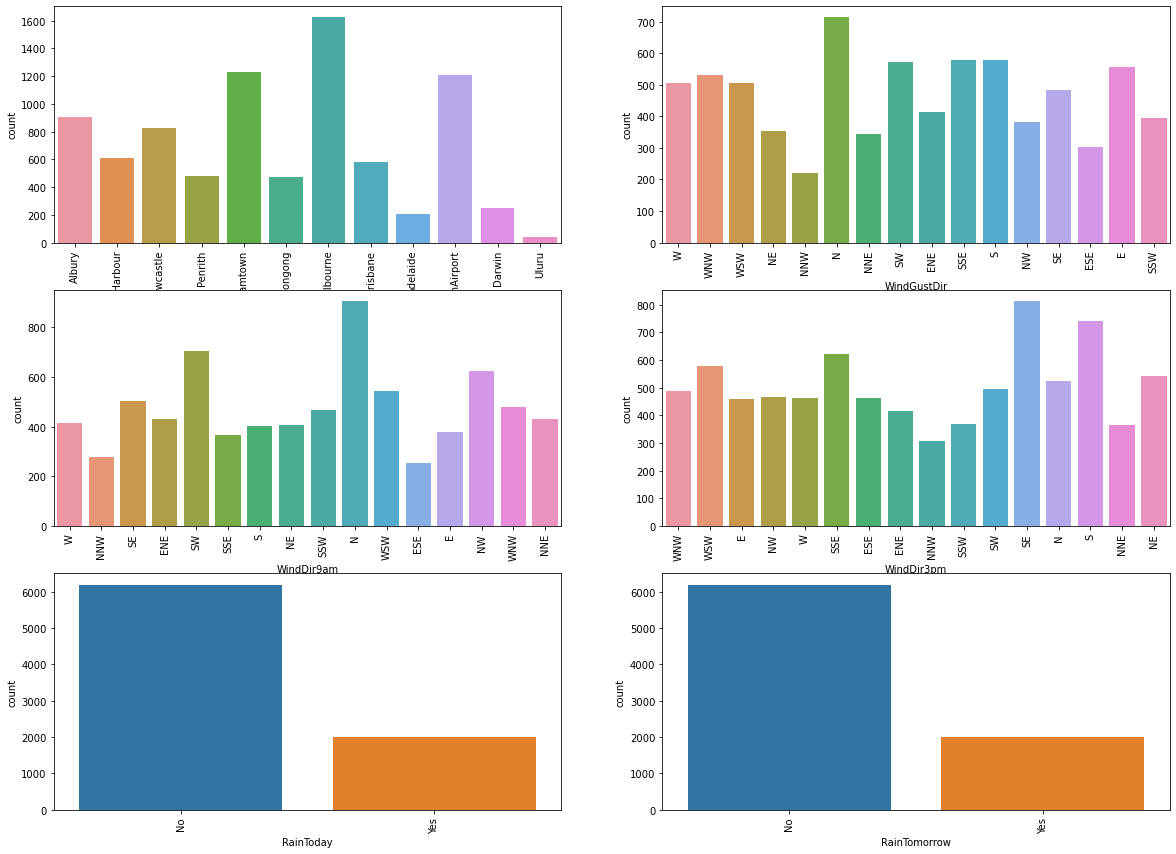

In [10]:
#Plotting Count Plot
plt.figure(figsize=(20,20))
plot = 1
for i in categorical_variables:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.countplot(df[i])
        plt.xticks(rotation=90)
    plot += 1
plt.show()

Now I will explore numerical variables

In [11]:
numerical_variables = df.select_dtypes(include=['number'])
numerical_variables

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,2017,6,21
8421,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,2017,6,22
8422,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,2017,6,23
8423,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,2017,6,24


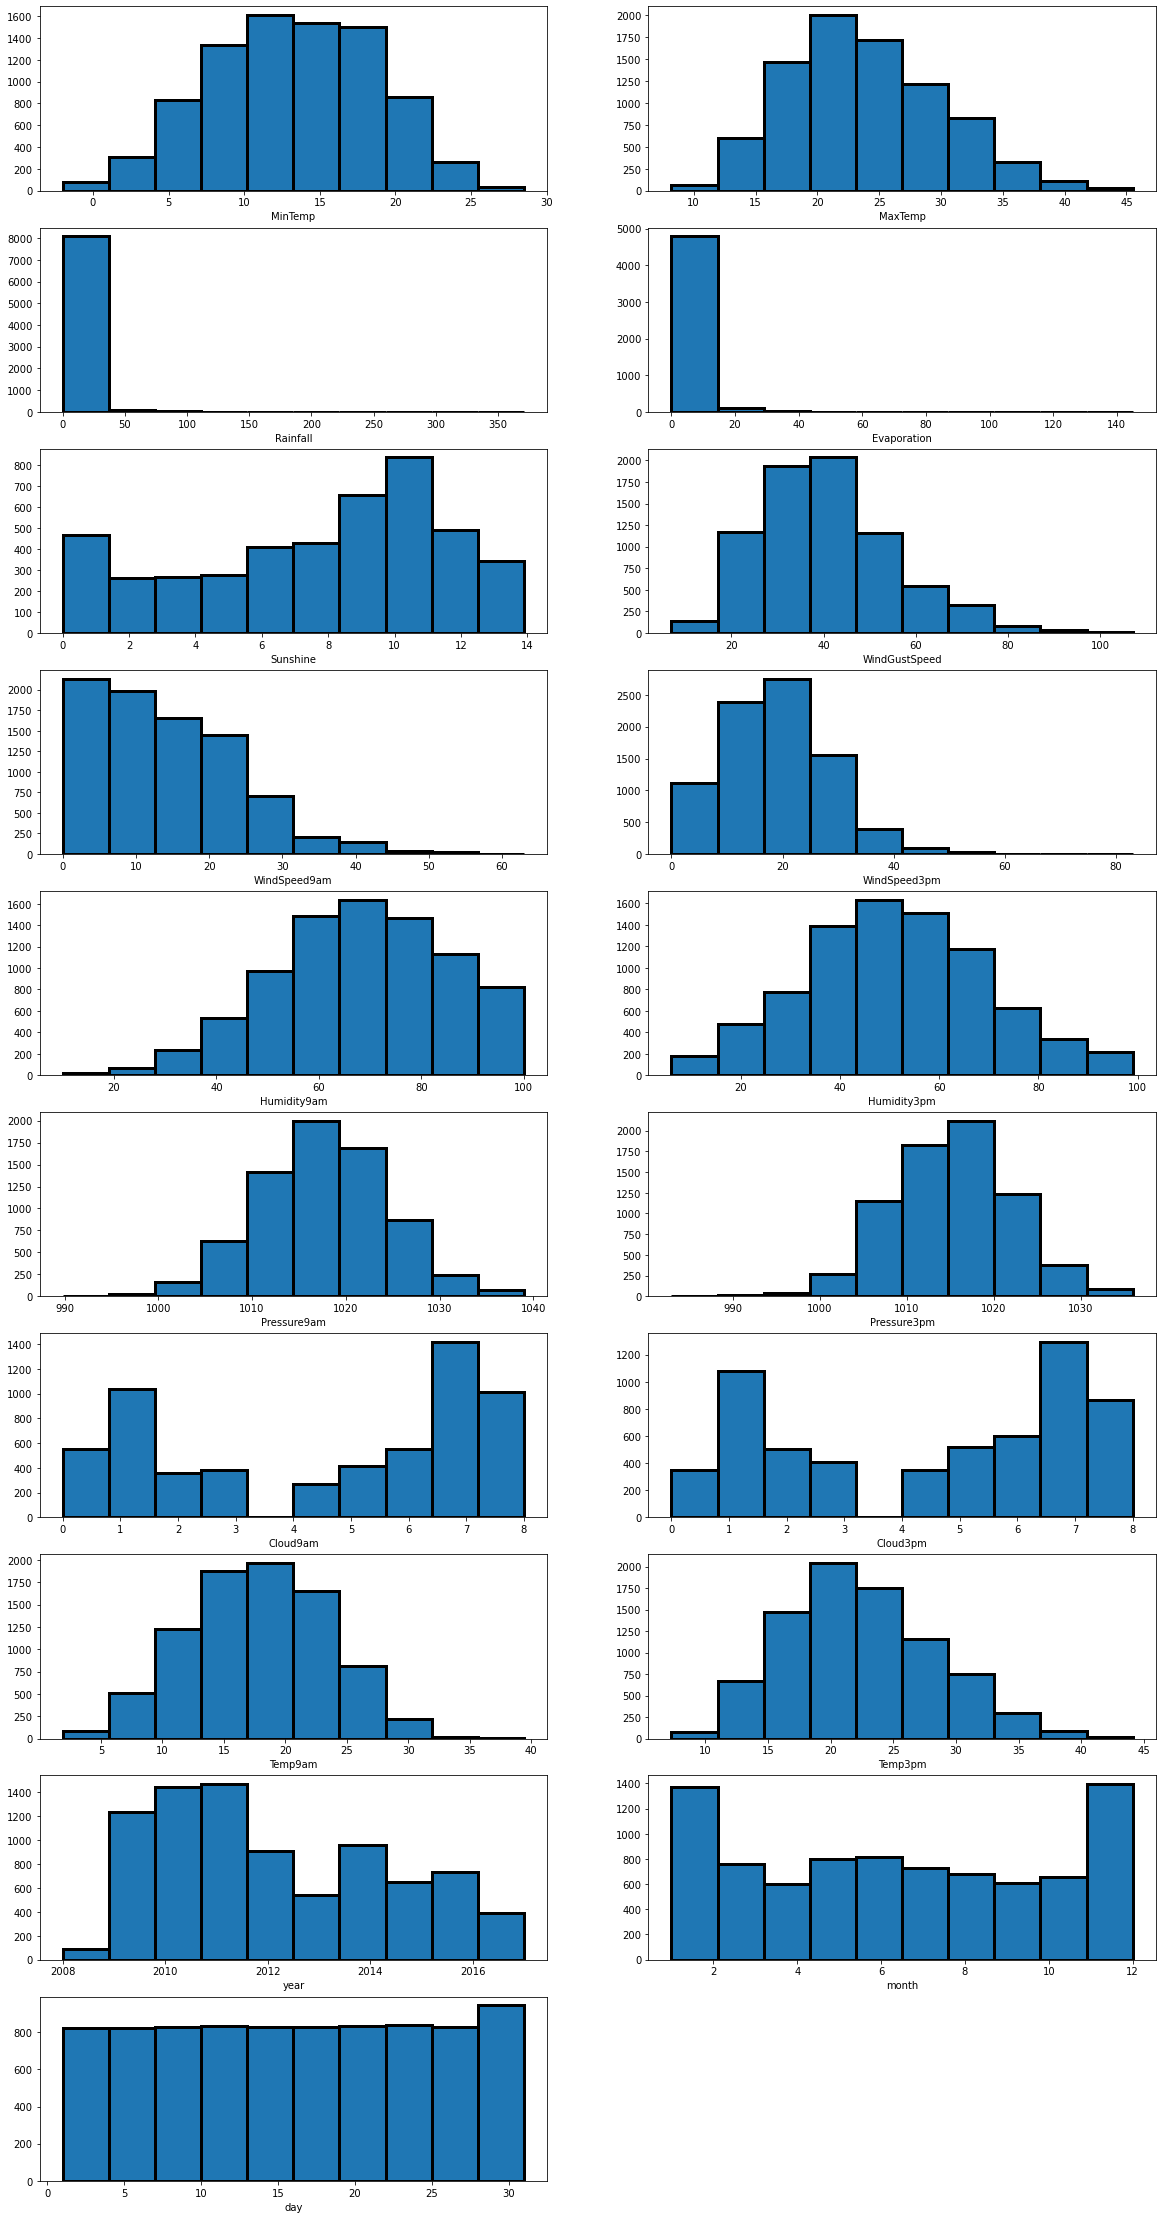

In [12]:
#Plotting Histogram 
plt.figure(figsize=(20,40))
plot = 1
for i in numerical_variables:
    if plot < 20:
        ax = plt.subplot(10,2,plot)
        plt.hist(df[i],edgecolor='black',linewidth=3)
        plt.xlabel(i)
    plot += 1
plt.show()

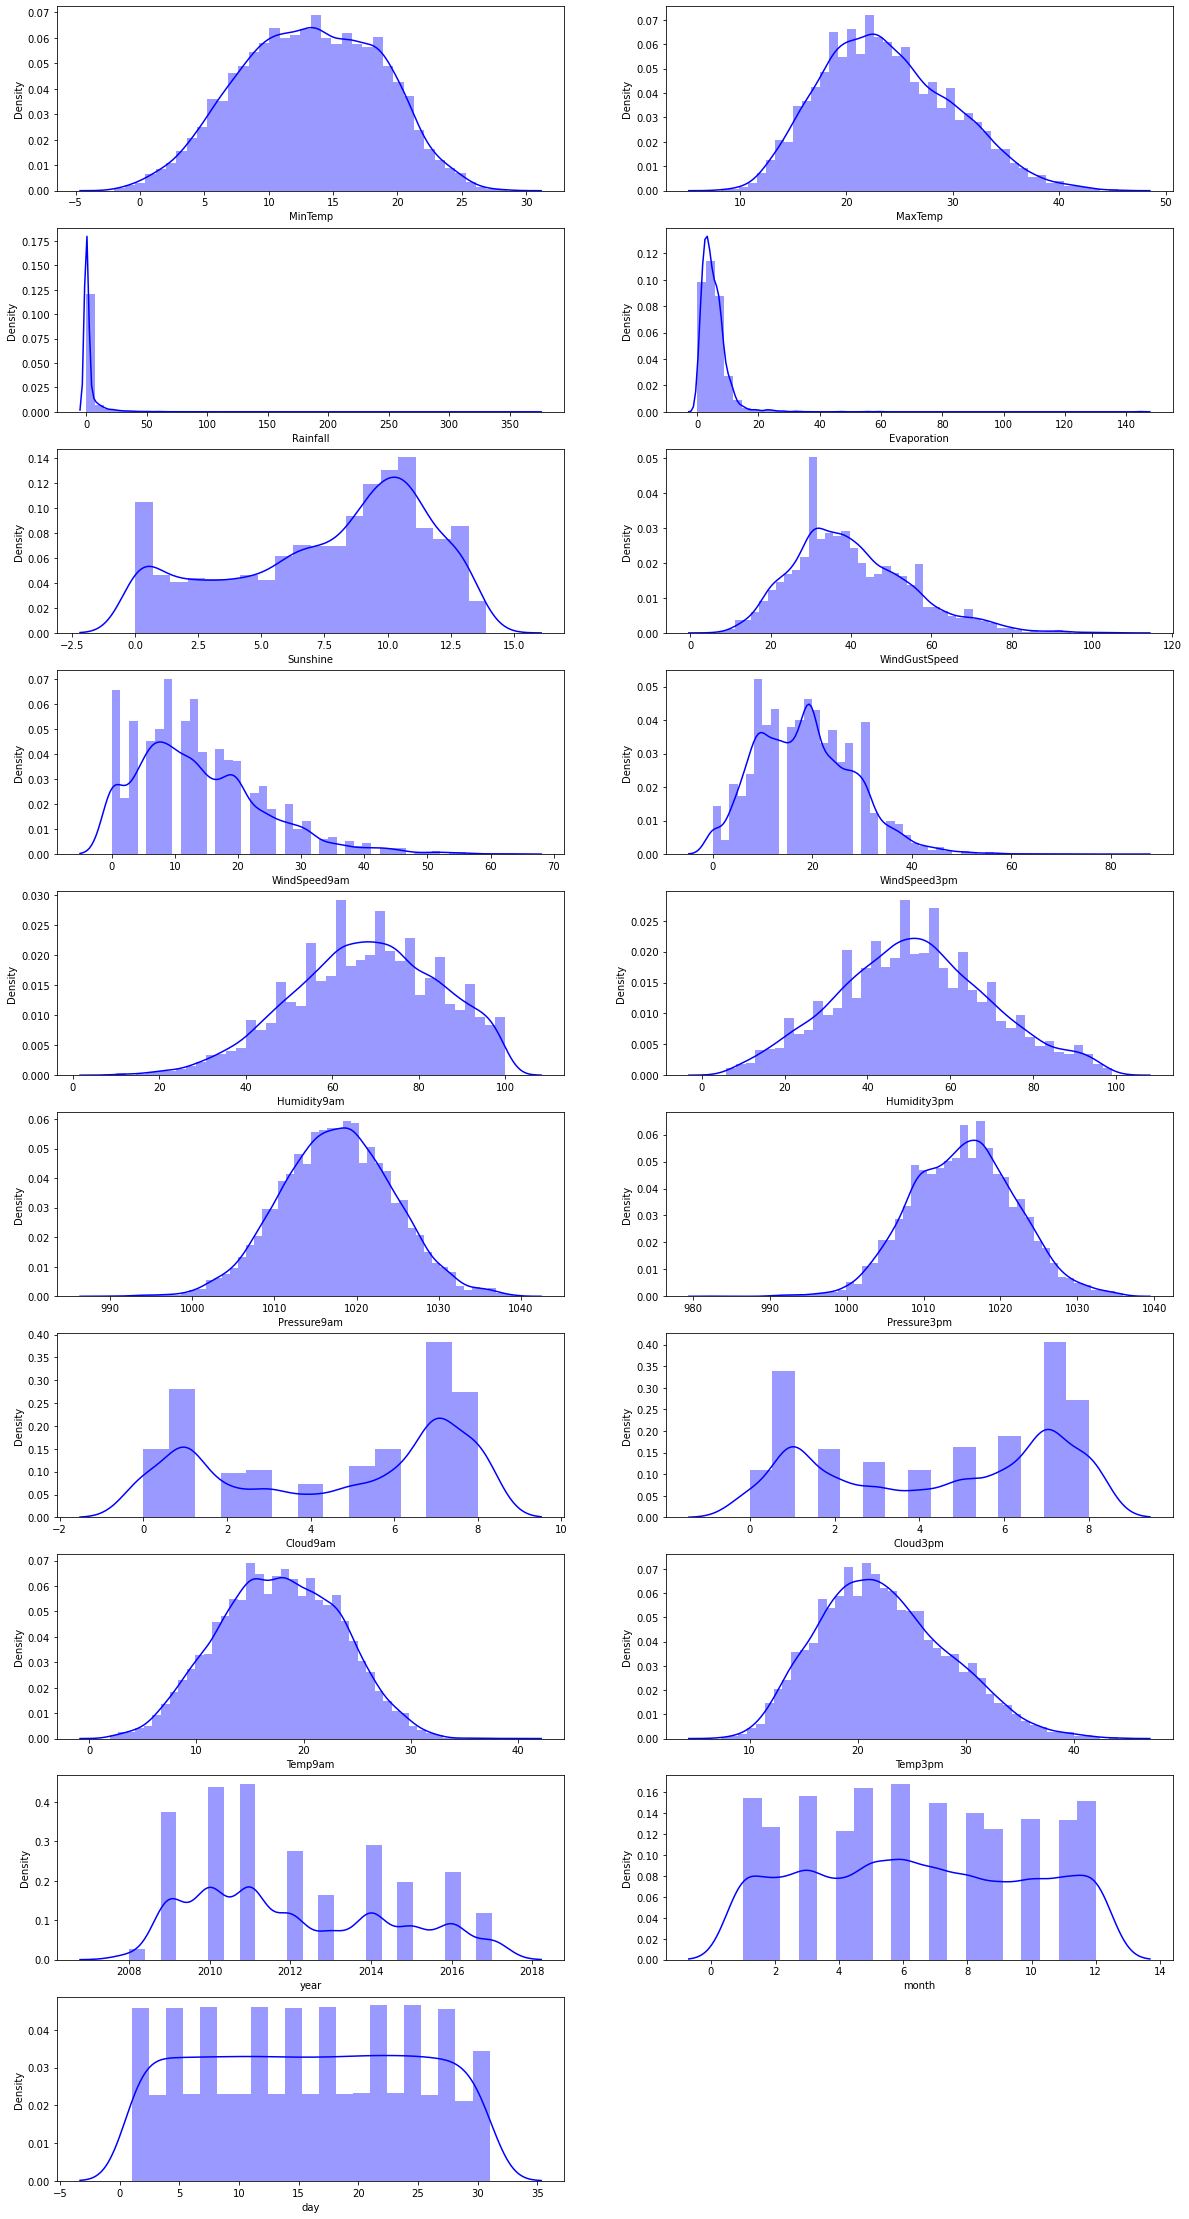

In [13]:
#Plotting Density
plt.figure(figsize=(20,40))
plot = 1
for i in numerical_variables:
    if plot < 20:
        ax = plt.subplot(10,2,plot)
        sns.distplot(df[i],color='blue')
        plt.xlabel(i)
    plot += 1
plt.show()

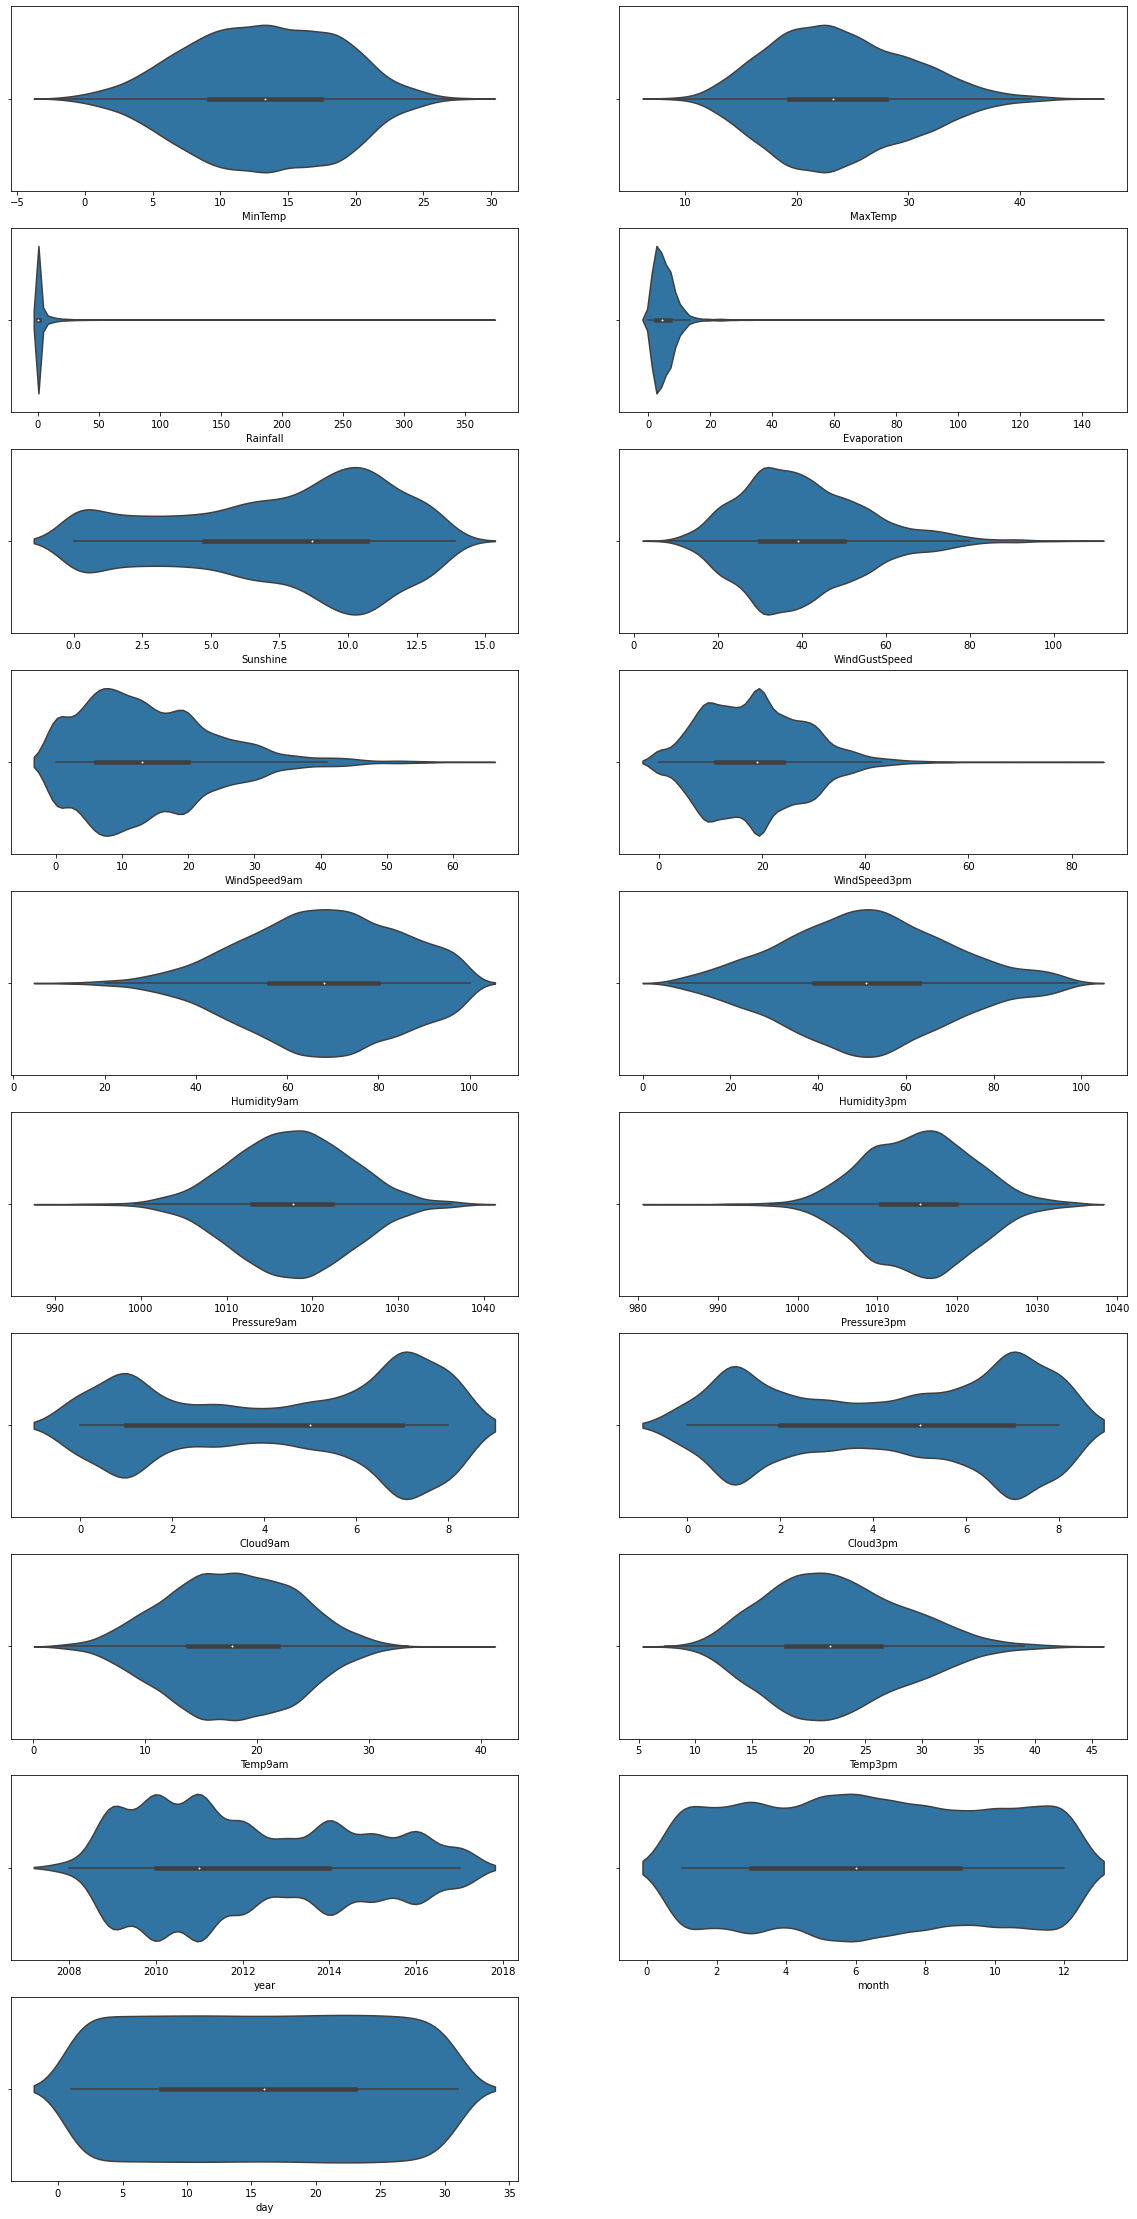

In [14]:
#Plotting Violen Plot
plt.figure(figsize=(20,40))
plot = 1
for i in numerical_variables:
    if plot < 20:
        ax = plt.subplot(10,2,plot)
        sns.violinplot(df[i])
        plt.xlabel(i)
    plot += 1
plt.show()

I have done with univariate analysis part.

Bivariate Analysis

Target variable : Rain Tommorrow

First I will use barplot to plot numerical vs categorical variable with hue being the target variable.

In [15]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

Barplot of MinTemp with all categorical variables

<AxesSubplot:xlabel='MinTemp', ylabel='Location'>

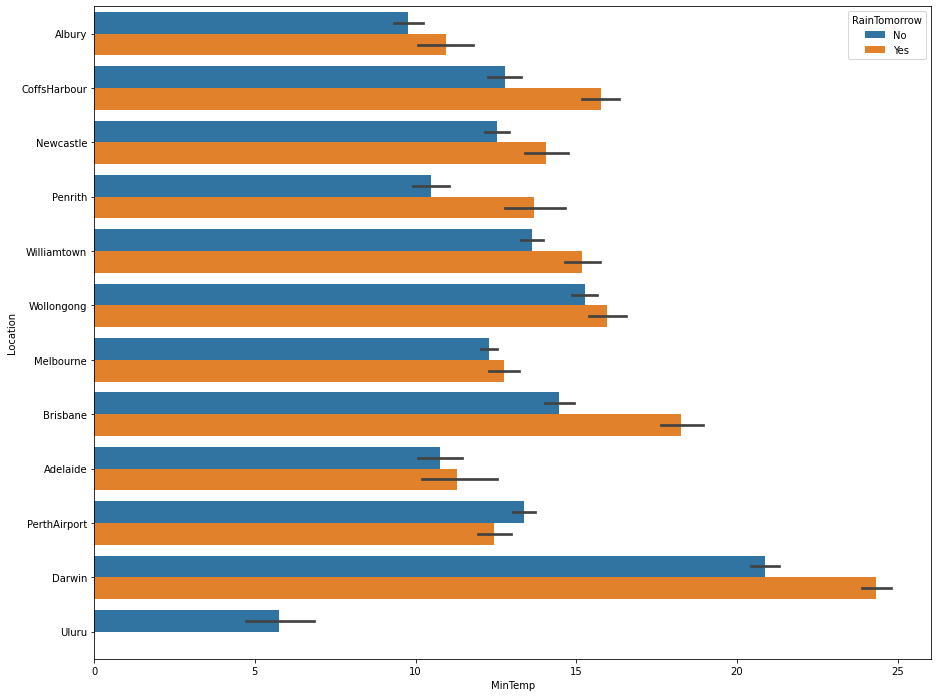

In [16]:
#barplot
plt.figure(figsize=(15,12))
sns.barplot(df['MinTemp'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='MinTemp', ylabel='WindGustDir'>

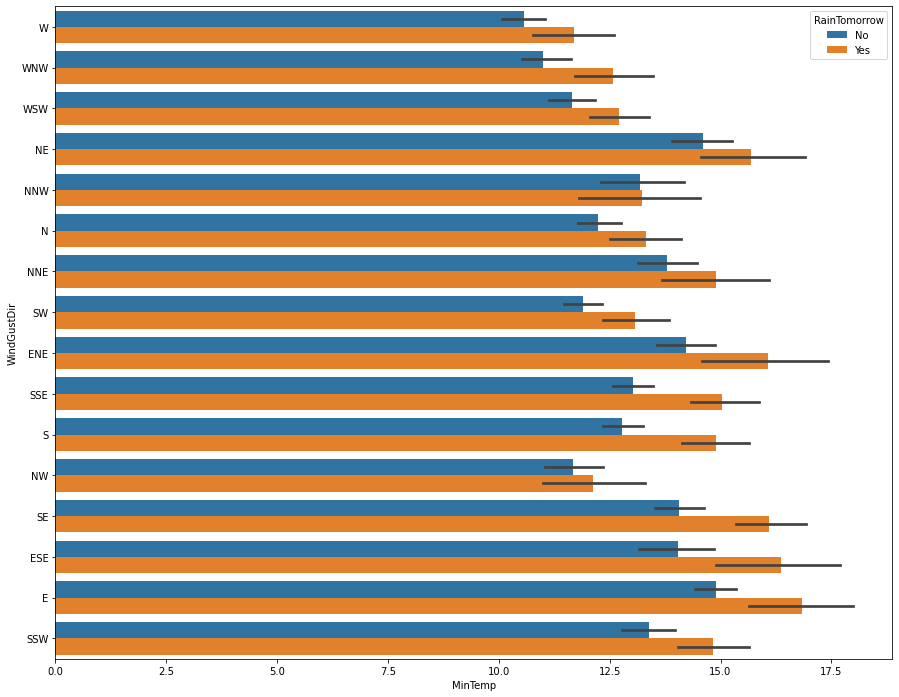

In [17]:
plt.figure(figsize=(15,12))
sns.barplot(df['MinTemp'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='MinTemp', ylabel='RainToday'>

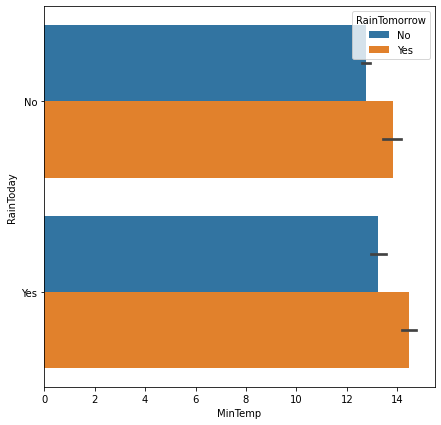

In [18]:
plt.figure(figsize=(7,7))
sns.barplot(df['MinTemp'],df['RainToday'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='MinTemp', ylabel='WindDir9am'>

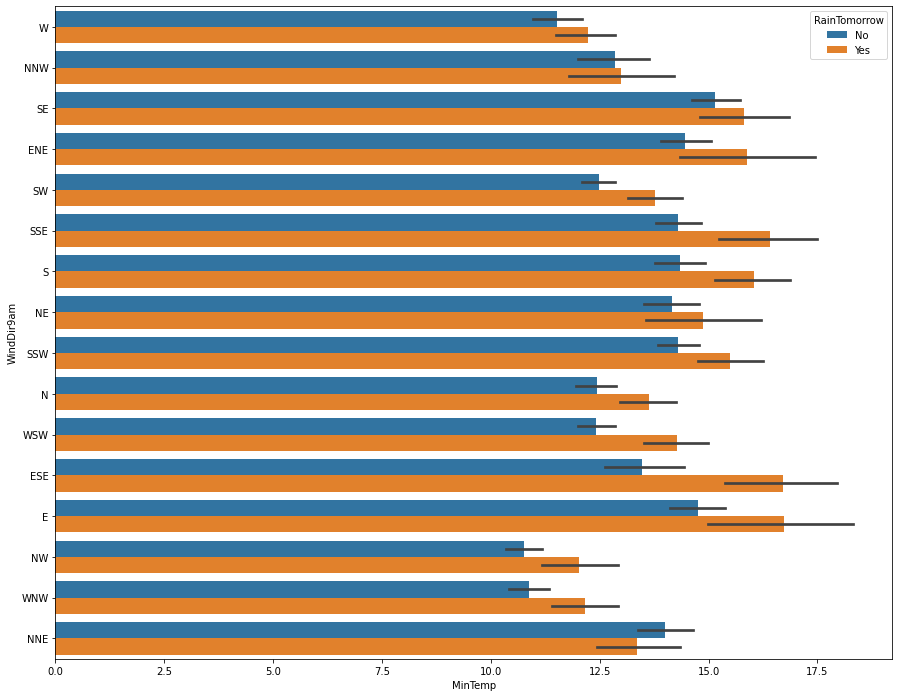

In [19]:
plt.figure(figsize=(15,12))
sns.barplot(df['MinTemp'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='MinTemp', ylabel='WindDir3pm'>

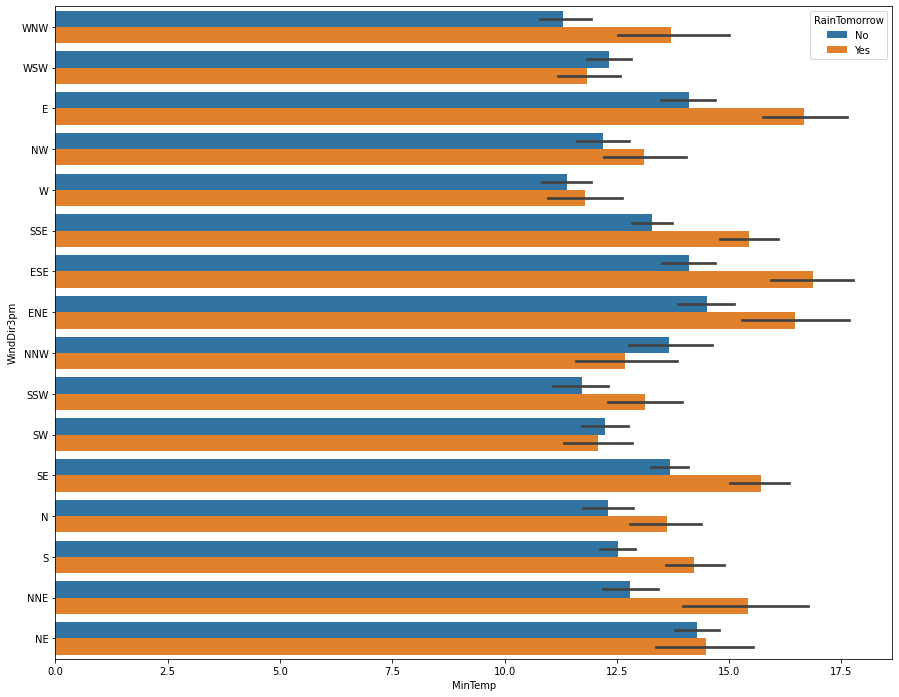

In [20]:
plt.figure(figsize=(15,12))
sns.barplot(df['MinTemp'],df['WindDir3pm'],hue=df['RainTomorrow'])

Barplot of MaxTemp with categorical variables

<AxesSubplot:xlabel='MaxTemp', ylabel='Location'>

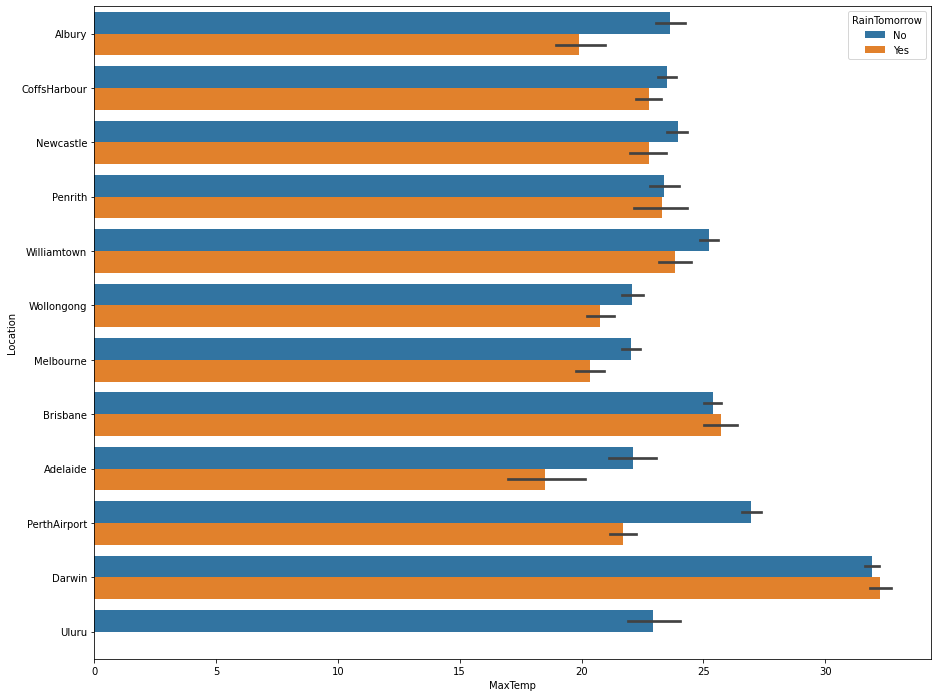

In [21]:
plt.figure(figsize=(15,12))
sns.barplot(df['MaxTemp'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='MaxTemp', ylabel='WindGustDir'>

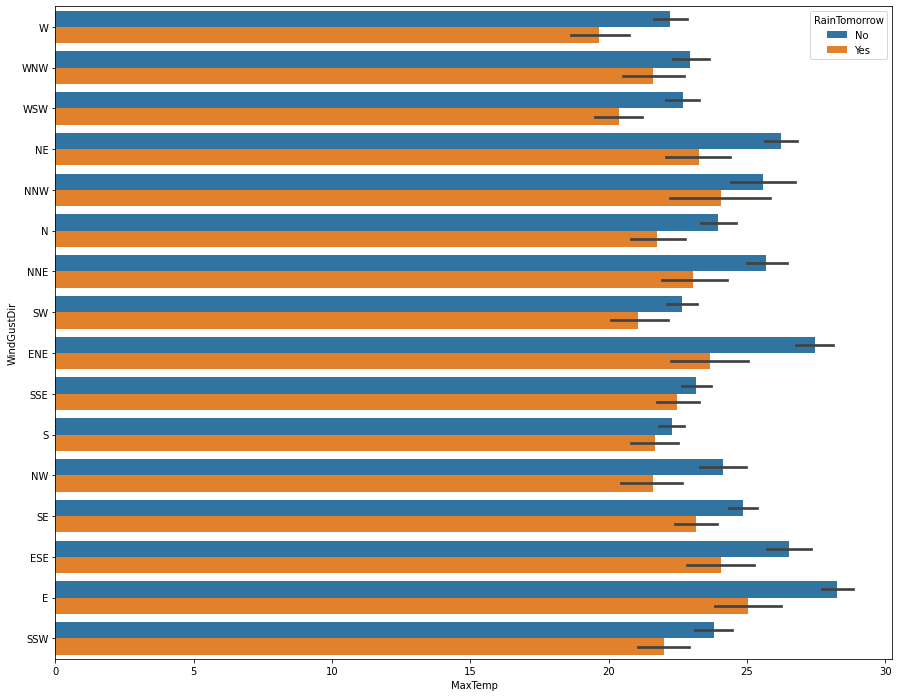

In [22]:
plt.figure(figsize=(15,12))
sns.barplot(df['MaxTemp'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='MaxTemp', ylabel='WindDir9am'>

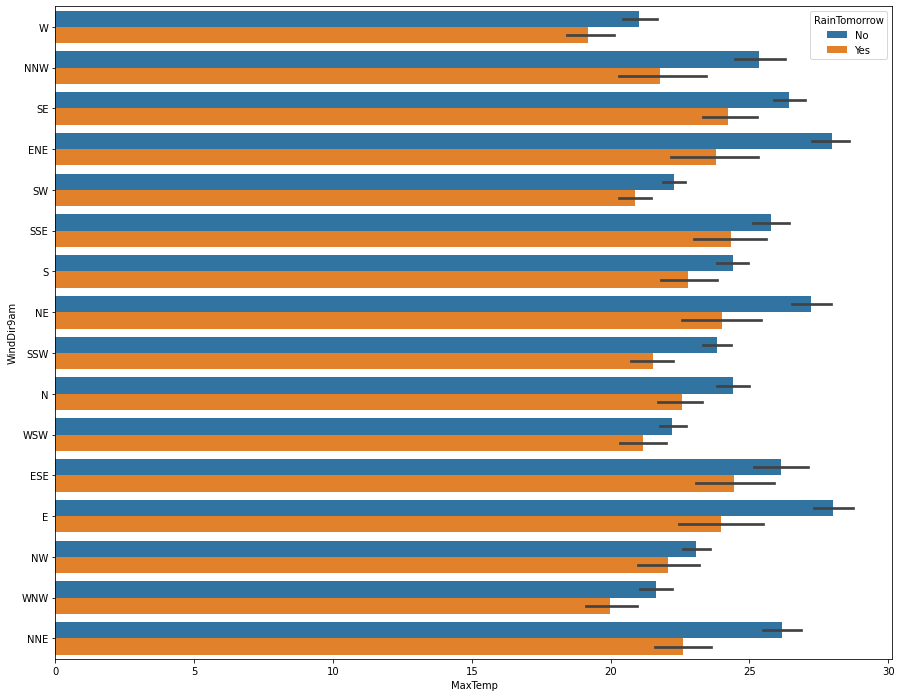

In [23]:
plt.figure(figsize=(15,12))
sns.barplot(df['MaxTemp'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='MaxTemp', ylabel='WindDir3pm'>

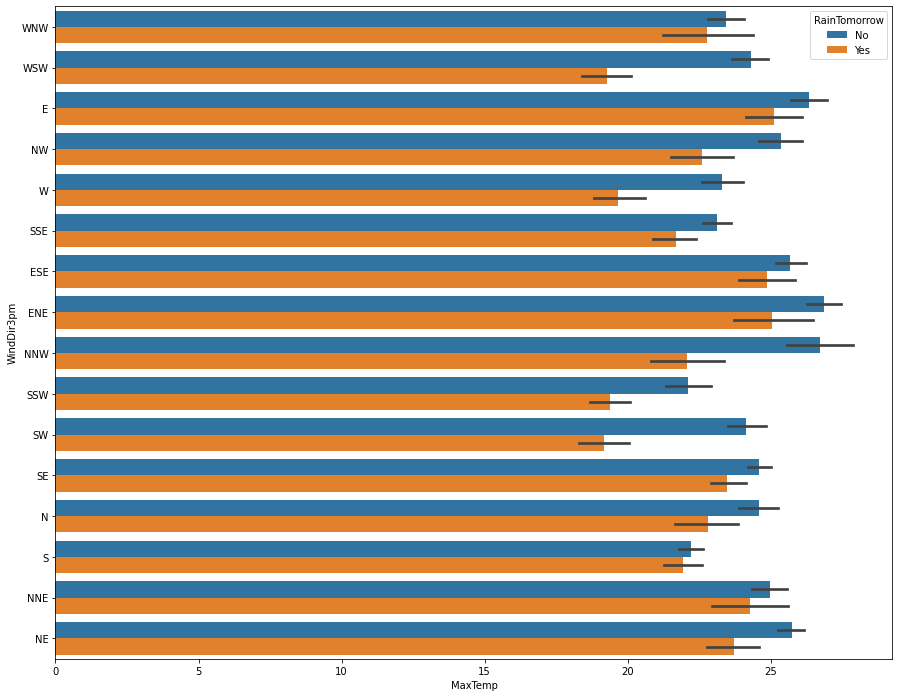

In [24]:
plt.figure(figsize=(15,12))
sns.barplot(df['MaxTemp'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='MaxTemp', ylabel='RainToday'>

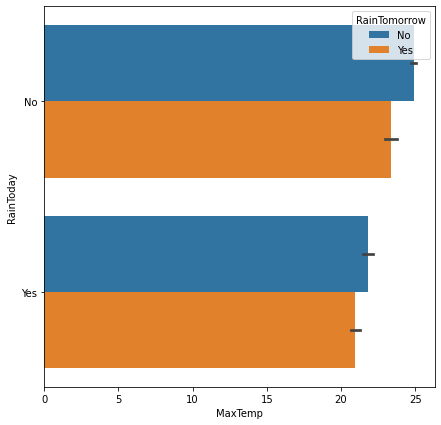

In [25]:
plt.figure(figsize=(7,7))
sns.barplot(df['MaxTemp'],df['RainToday'],hue=df['RainTomorrow'])

Rainfall vs Categorical variables

<AxesSubplot:xlabel='Rainfall', ylabel='Location'>

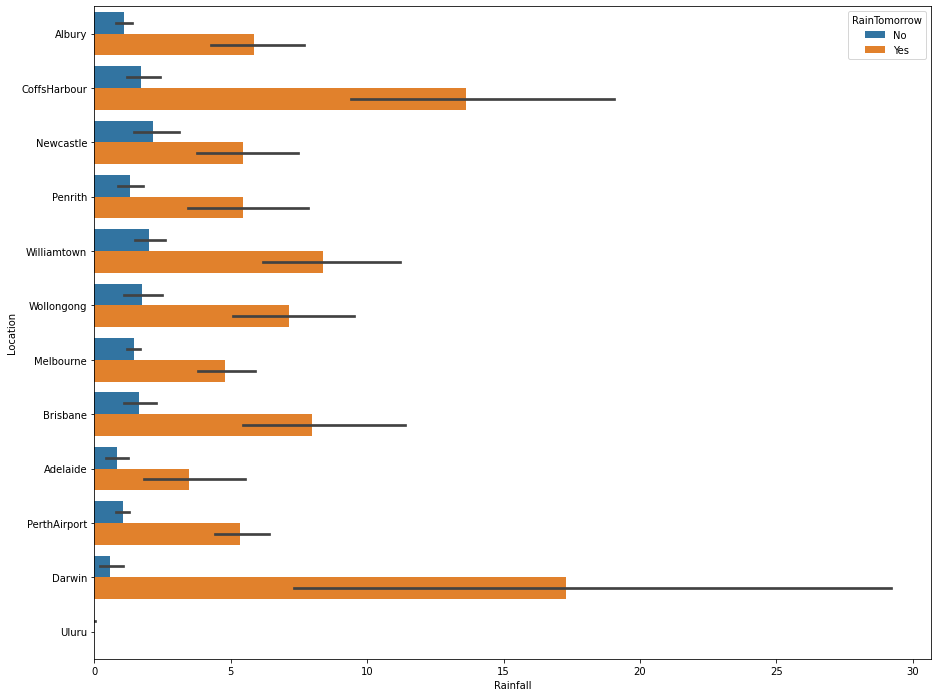

In [26]:
plt.figure(figsize=(15,12))
sns.barplot(df['Rainfall'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Rainfall', ylabel='WindGustDir'>

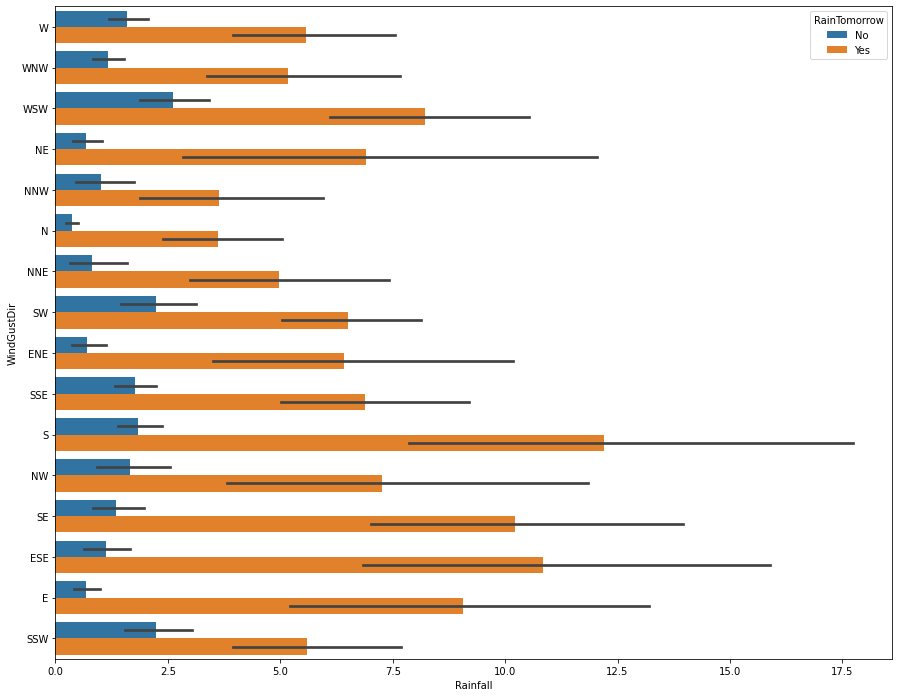

In [27]:
plt.figure(figsize=(15,12))
sns.barplot(df['Rainfall'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Rainfall', ylabel='WindDir9am'>

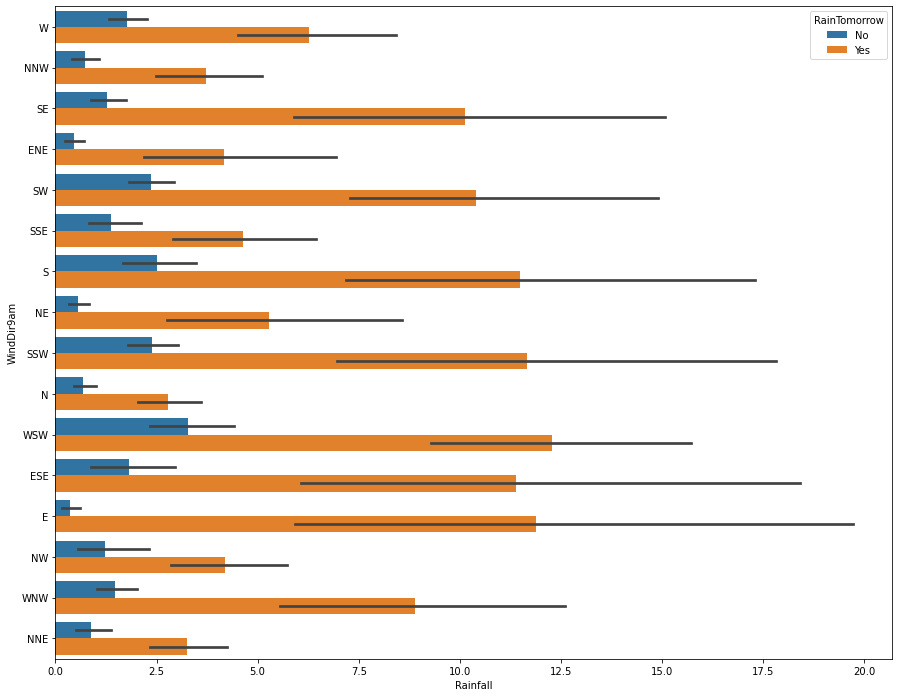

In [28]:
plt.figure(figsize=(15,12))
sns.barplot(df['Rainfall'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Rainfall', ylabel='WindDir3pm'>

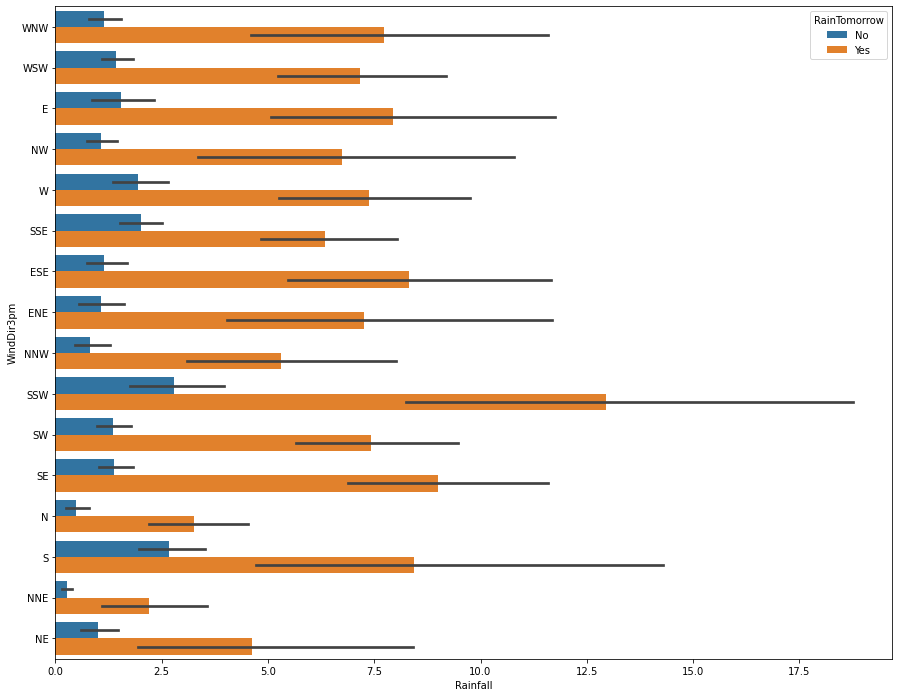

In [29]:
plt.figure(figsize=(15,12))
sns.barplot(df['Rainfall'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Rainfall', ylabel='RainToday'>

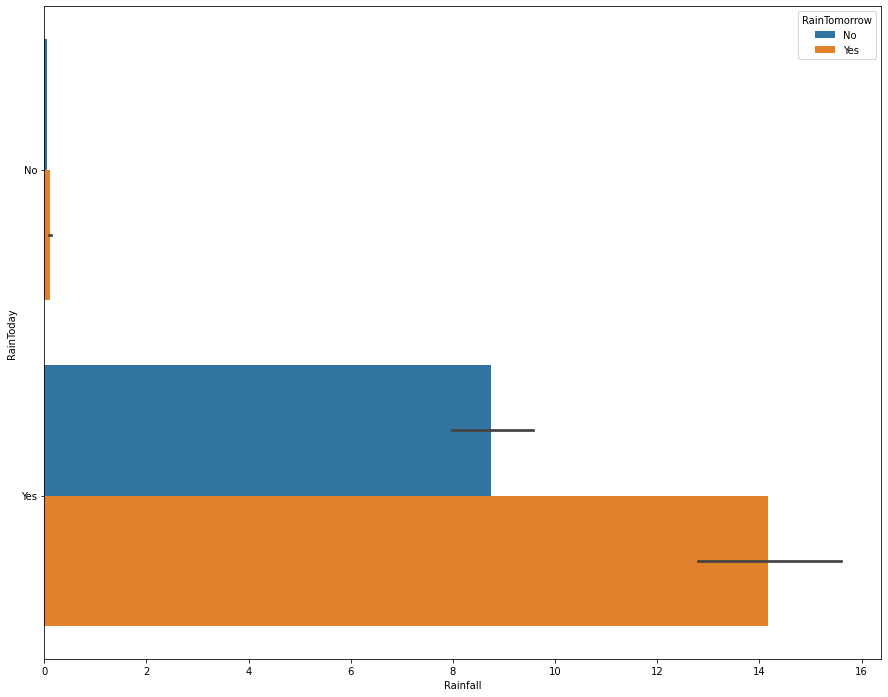

In [30]:
plt.figure(figsize=(15,12))
sns.barplot(df['Rainfall'],df['RainToday'],hue=df['RainTomorrow'])

Evaporation vs Categorical variables

<AxesSubplot:xlabel='Evaporation', ylabel='Location'>

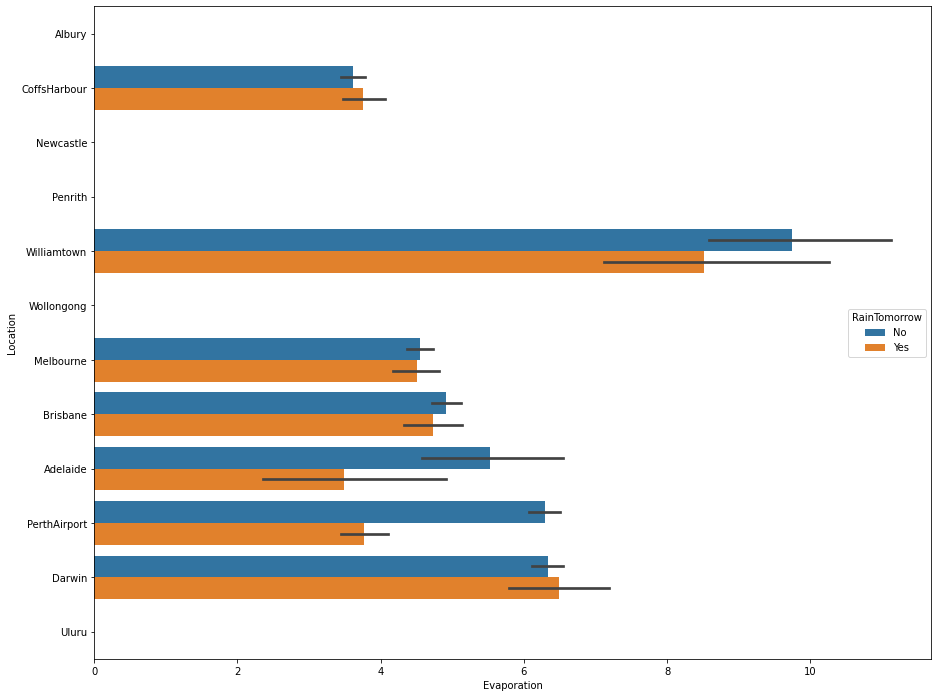

In [31]:
plt.figure(figsize=(15,12))
sns.barplot(df['Evaporation'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Evaporation', ylabel='WindGustDir'>

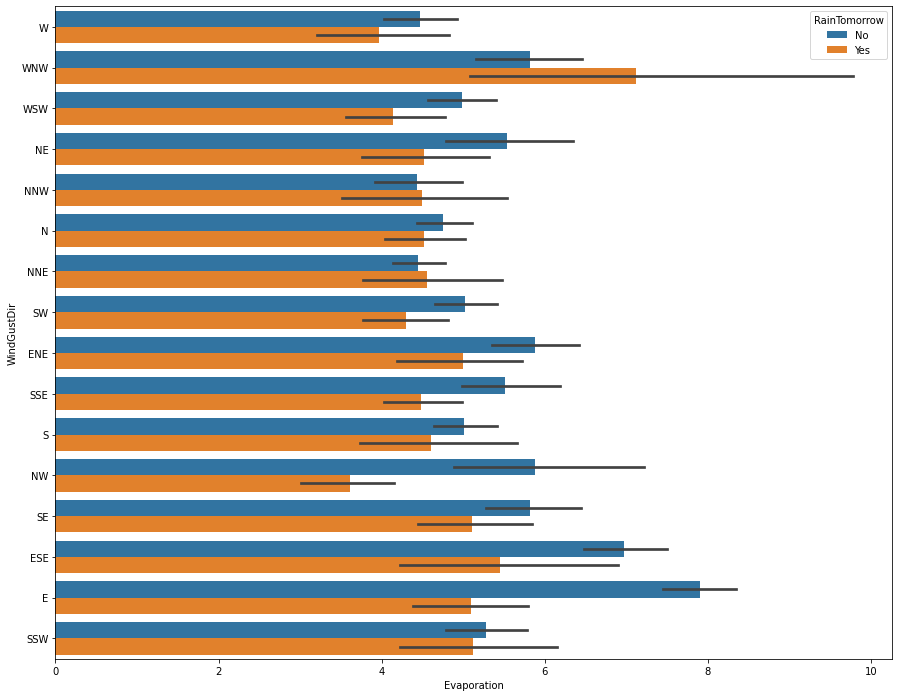

In [32]:
plt.figure(figsize=(15,12))
sns.barplot(df['Evaporation'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Evaporation', ylabel='WindDir9am'>

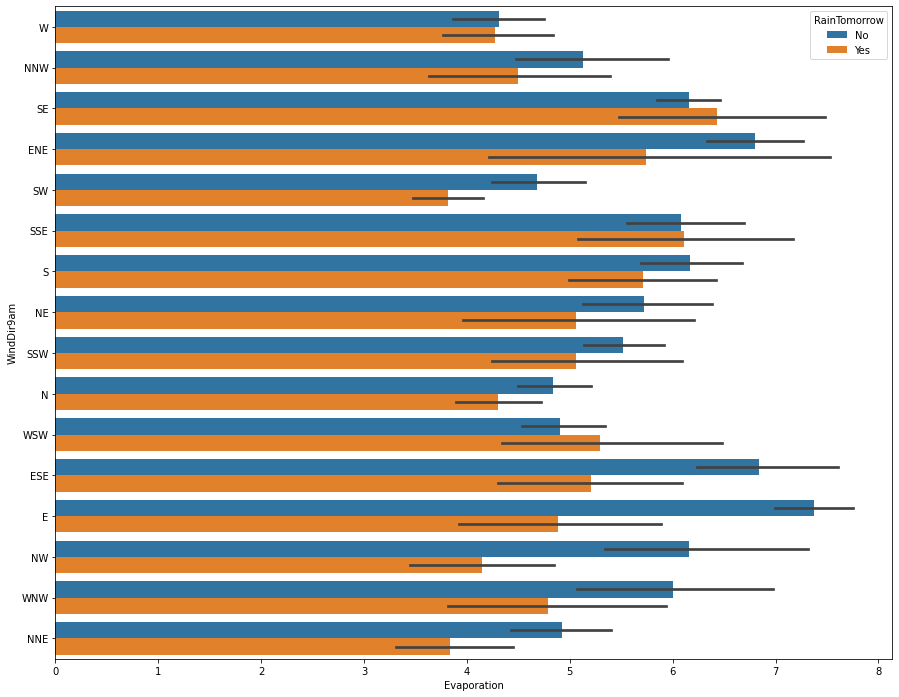

In [33]:
plt.figure(figsize=(15,12))
sns.barplot(df['Evaporation'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Evaporation', ylabel='WindDir3pm'>

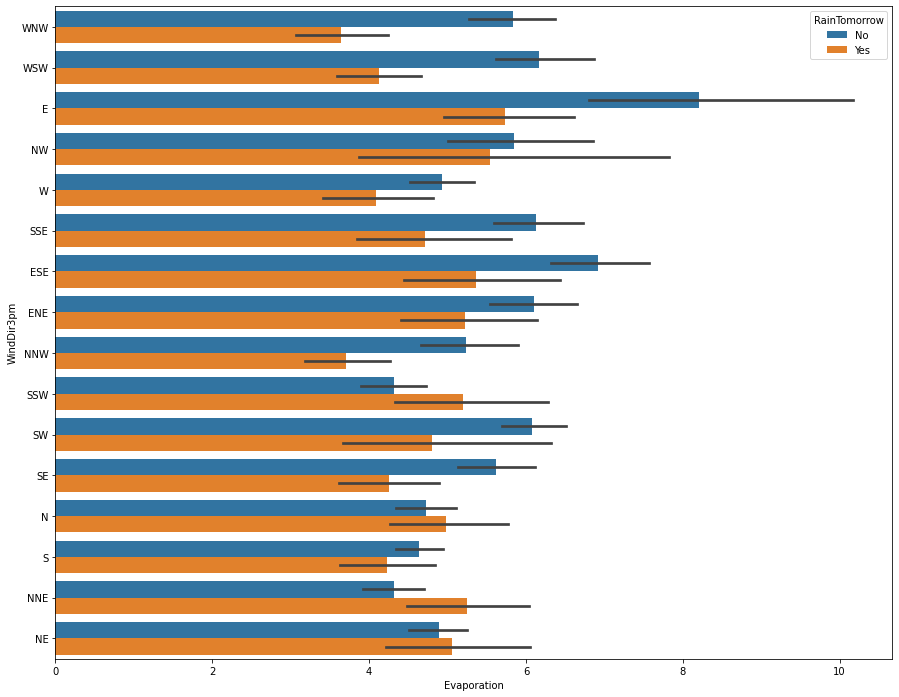

In [34]:
plt.figure(figsize=(15,12))
sns.barplot(df['Evaporation'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Evaporation', ylabel='RainToday'>

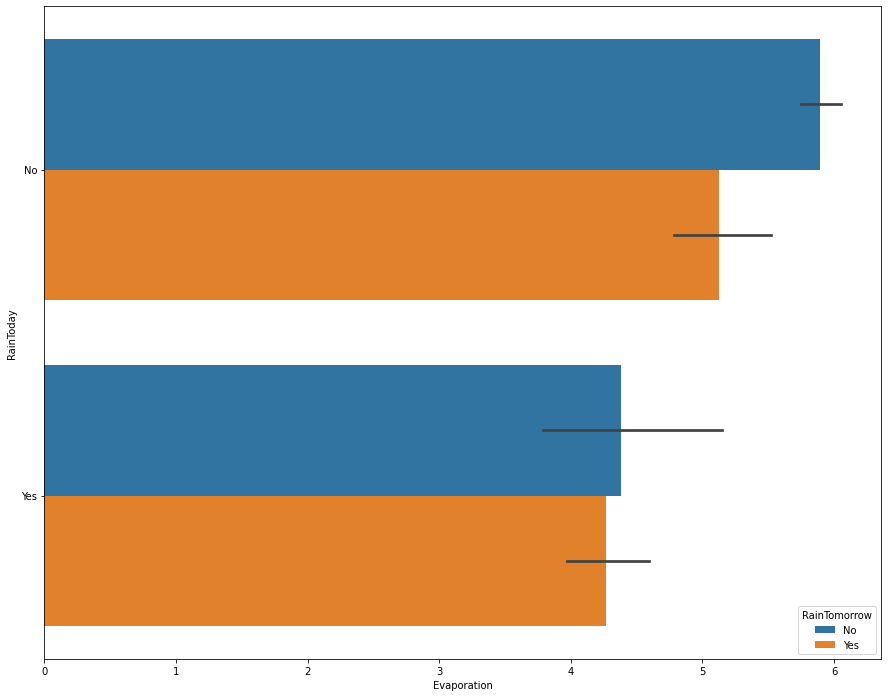

In [35]:
plt.figure(figsize=(15,12))
sns.barplot(df['Evaporation'],df['RainToday'],hue=df['RainTomorrow'])

Sunshine vs Categorical variables

<AxesSubplot:xlabel='Sunshine', ylabel='Location'>

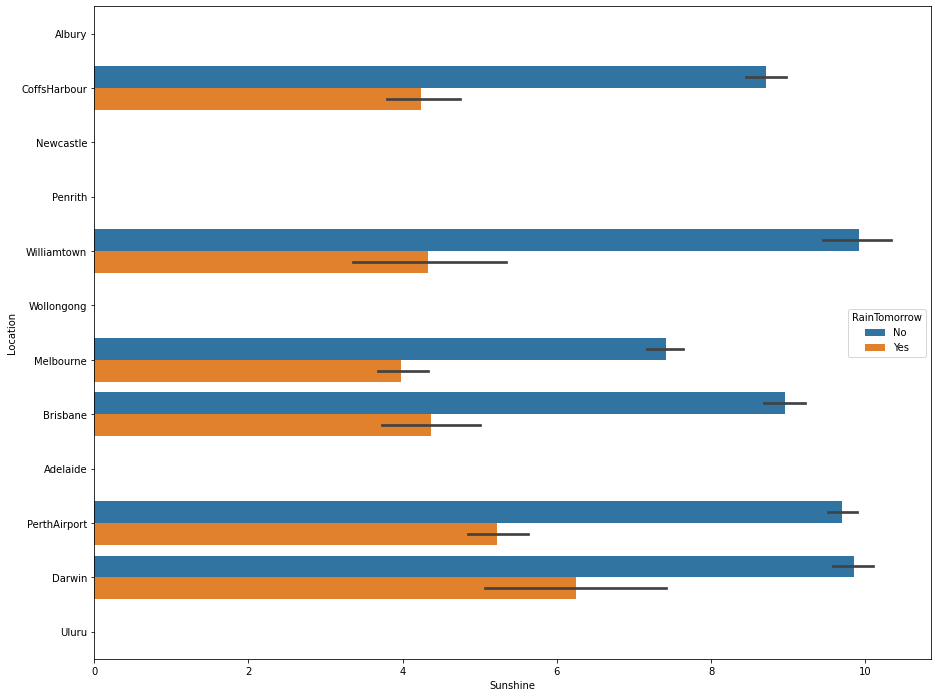

In [36]:
plt.figure(figsize=(15,12))
sns.barplot(df['Sunshine'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Sunshine', ylabel='WindGustDir'>

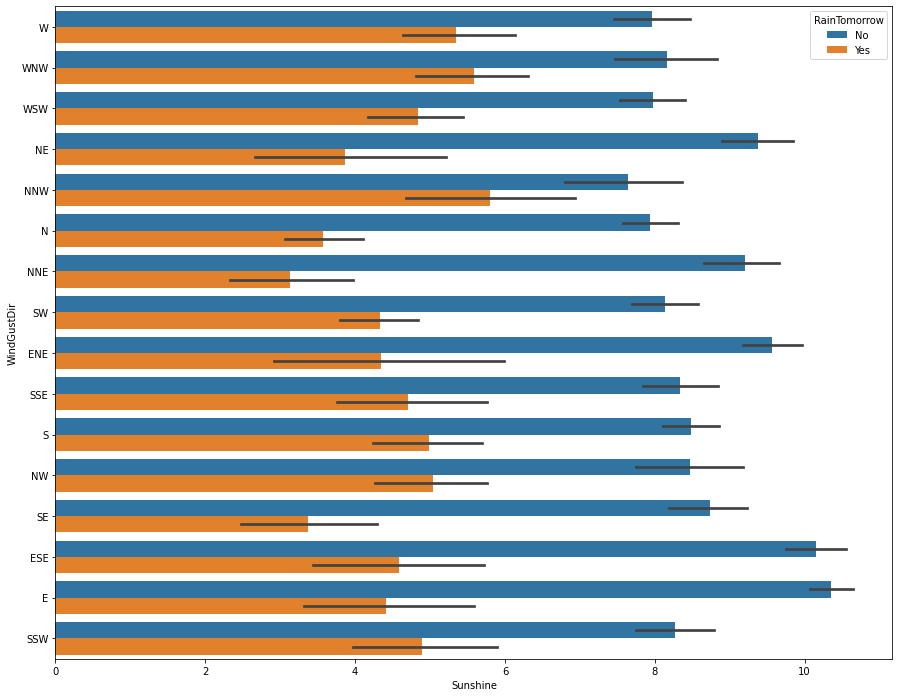

In [37]:
plt.figure(figsize=(15,12))
sns.barplot(df['Sunshine'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Sunshine', ylabel='WindDir9am'>

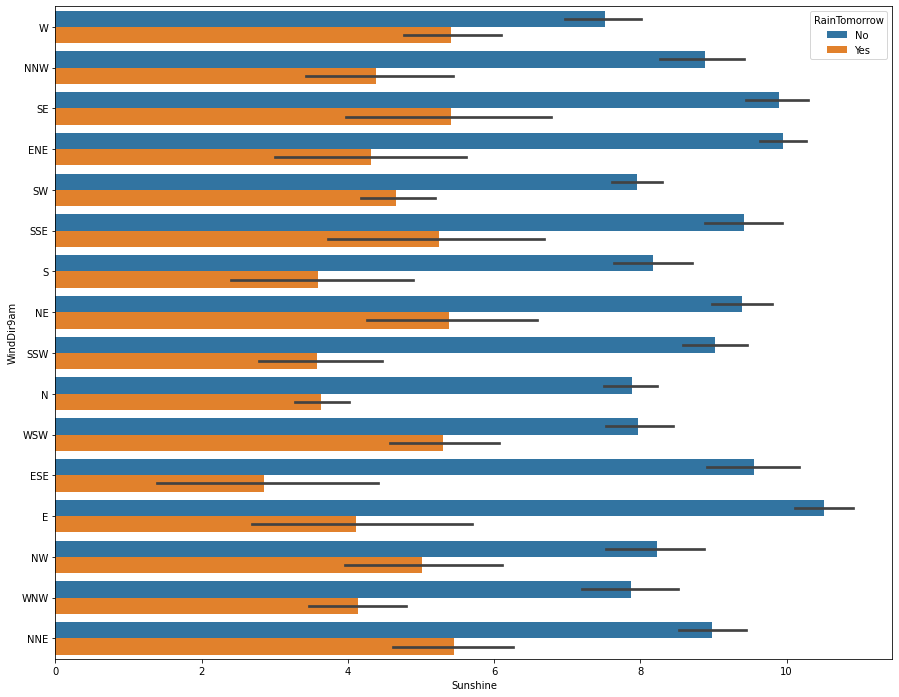

In [38]:
plt.figure(figsize=(15,12))
sns.barplot(df['Sunshine'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Sunshine', ylabel='WindDir3pm'>

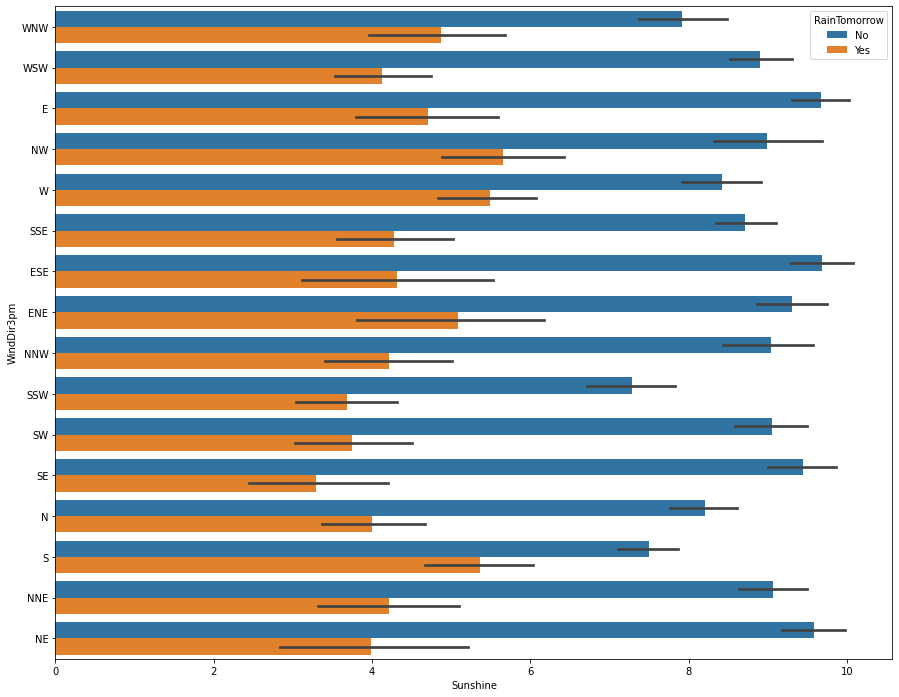

In [39]:
plt.figure(figsize=(15,12))
sns.barplot(df['Sunshine'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Sunshine', ylabel='RainToday'>

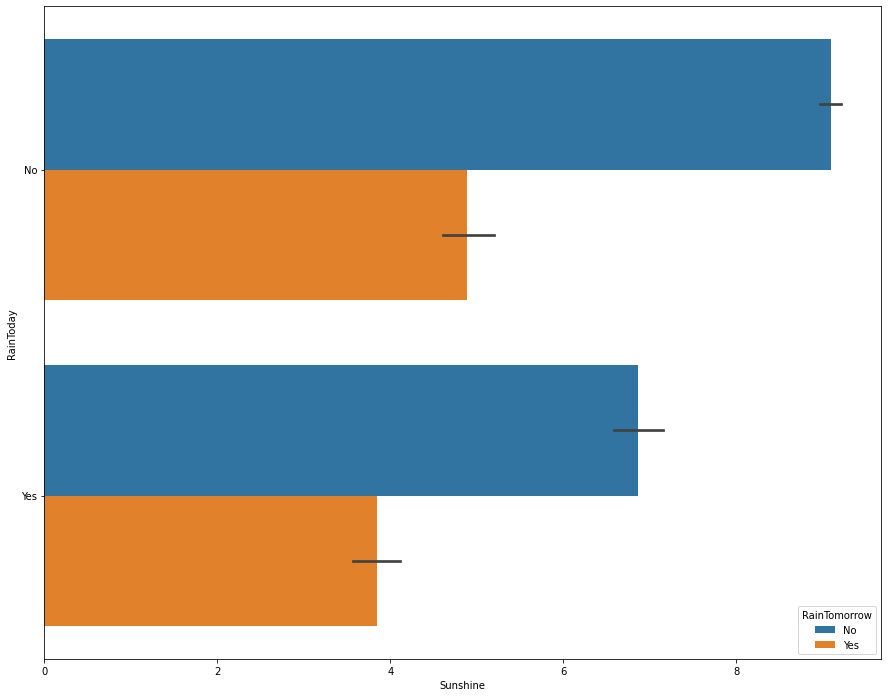

In [40]:
plt.figure(figsize=(15,12))
sns.barplot(df['Sunshine'],df['RainToday'],hue=df['RainTomorrow'])

WindGustSpeed vs Categorical variables

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Location'>

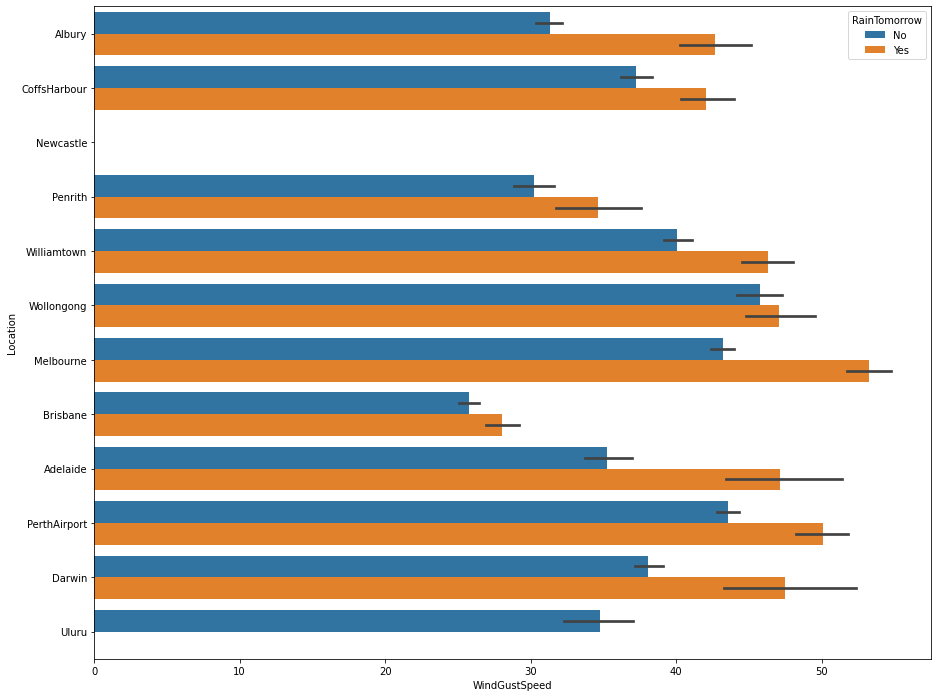

In [41]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindGustSpeed'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindGustDir'>

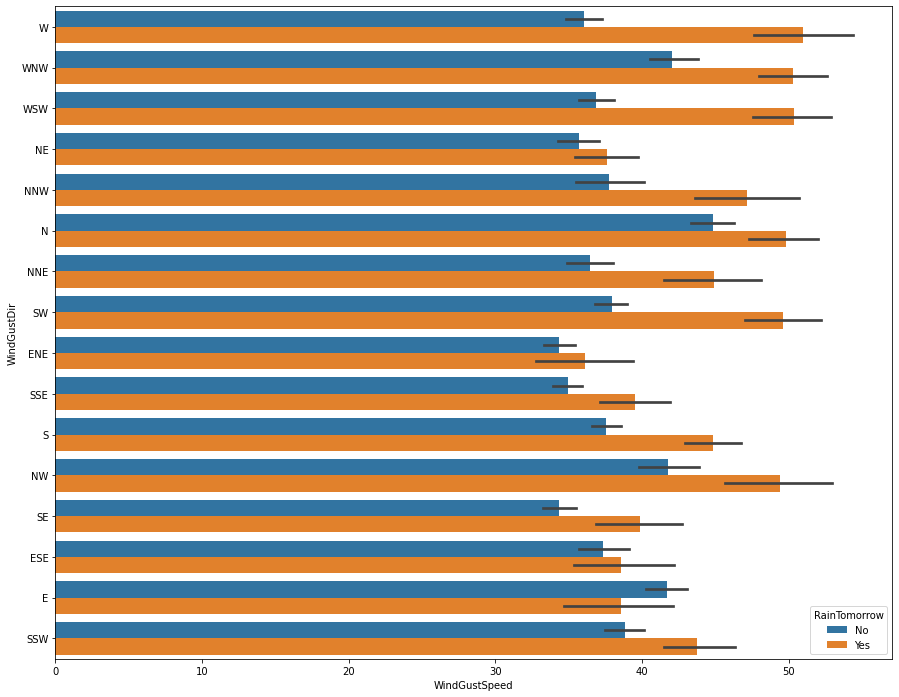

In [42]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindGustSpeed'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindDir9am'>

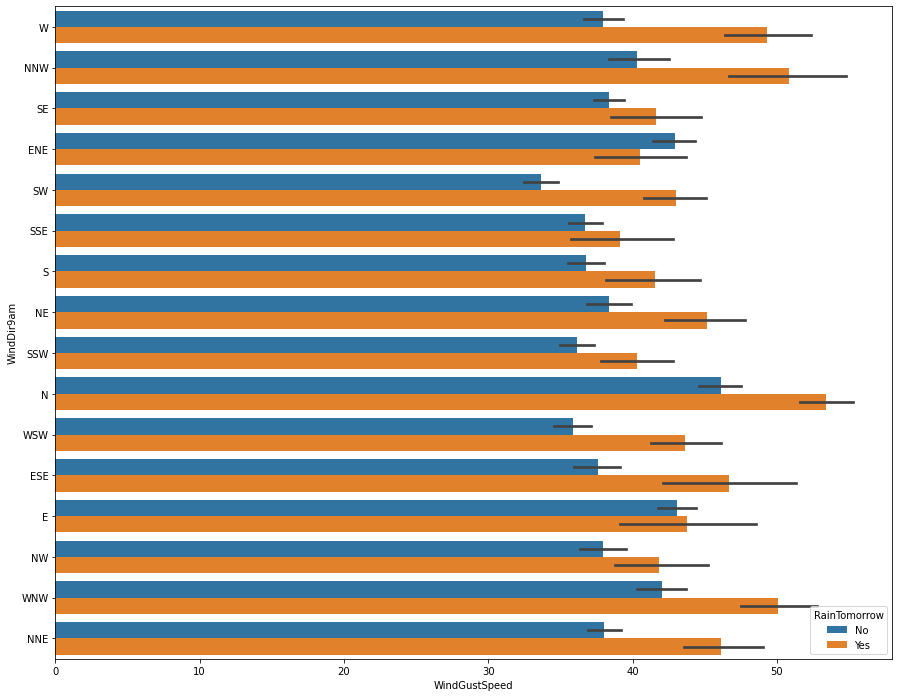

In [43]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindGustSpeed'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindDir3pm'>

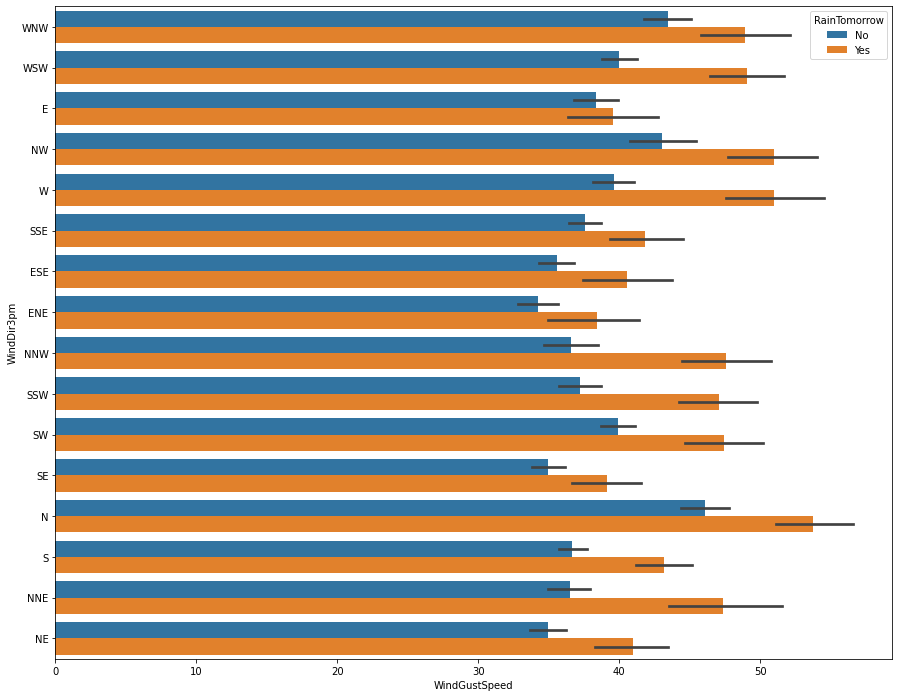

In [44]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindGustSpeed'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='RainToday'>

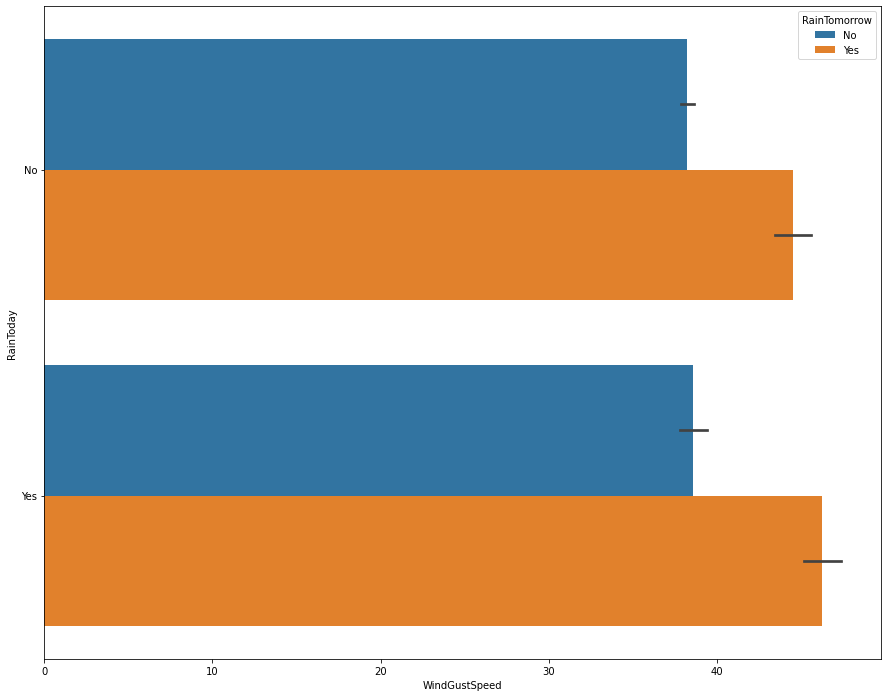

In [45]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindGustSpeed'],df['RainToday'],hue=df['RainTomorrow'])

WindSpeed9am vs Categorical variables

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Location'>

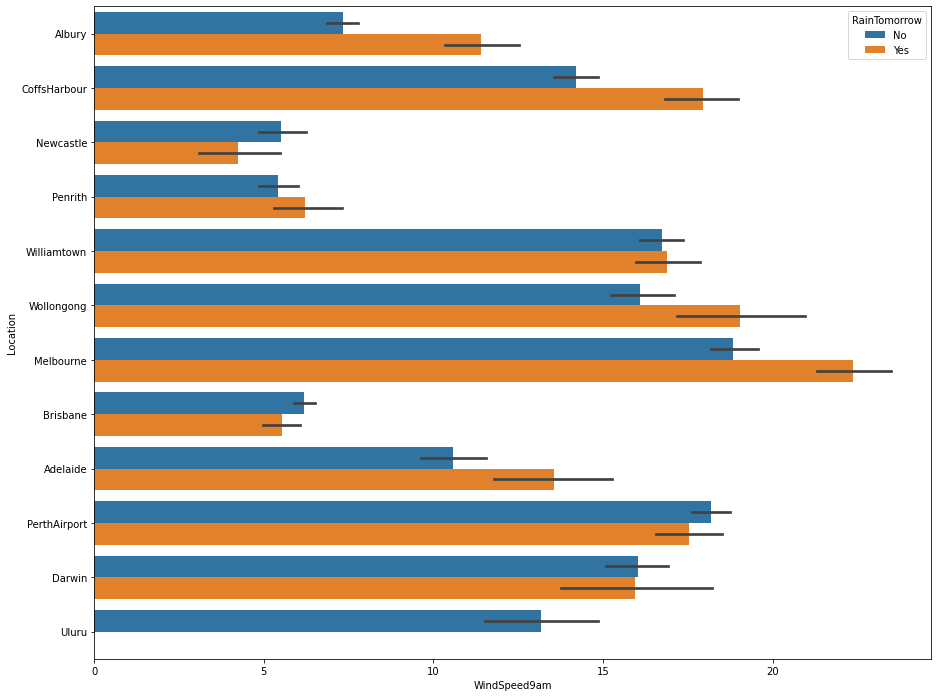

In [46]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed9am'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindGustDir'>

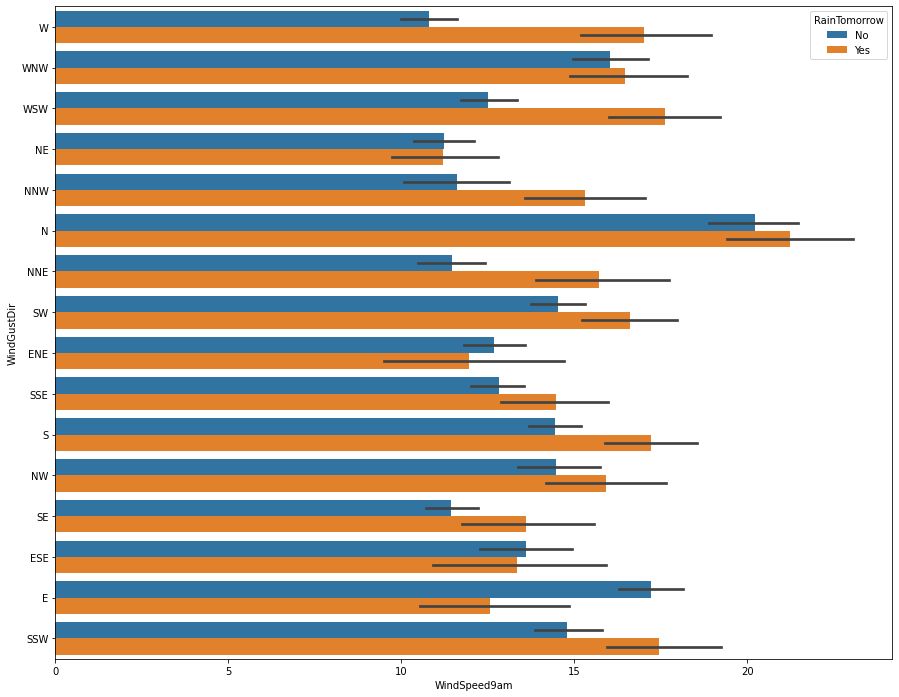

In [47]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed9am'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindDir9am'>

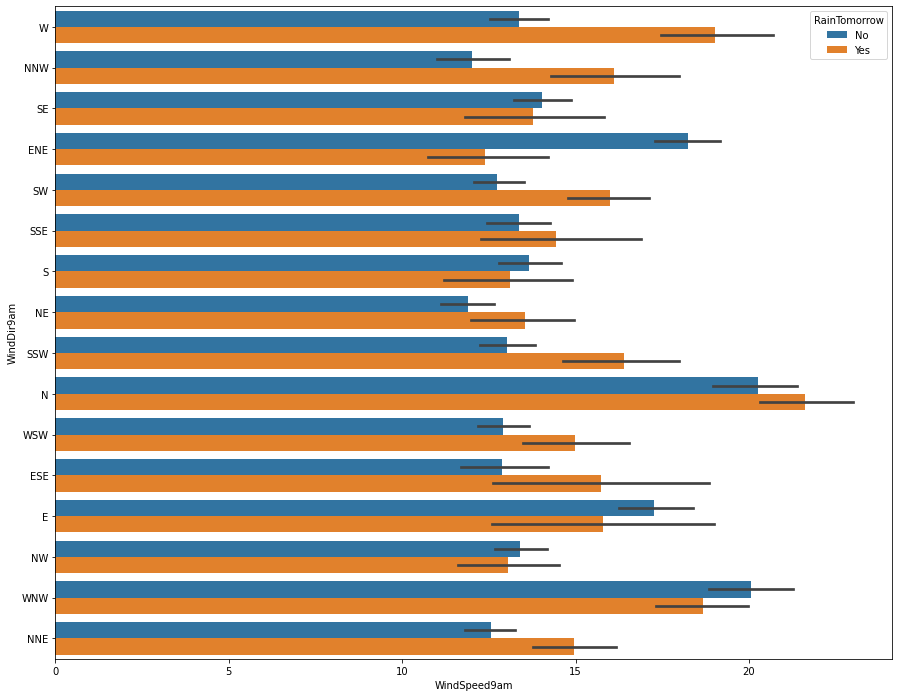

In [48]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed9am'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindDir3pm'>

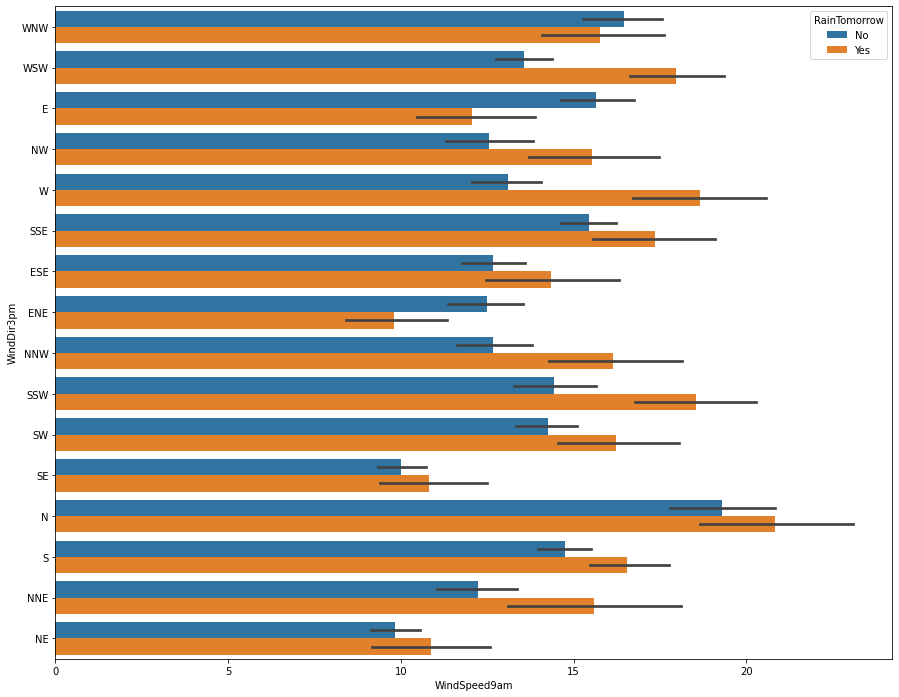

In [49]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed9am'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='RainToday'>

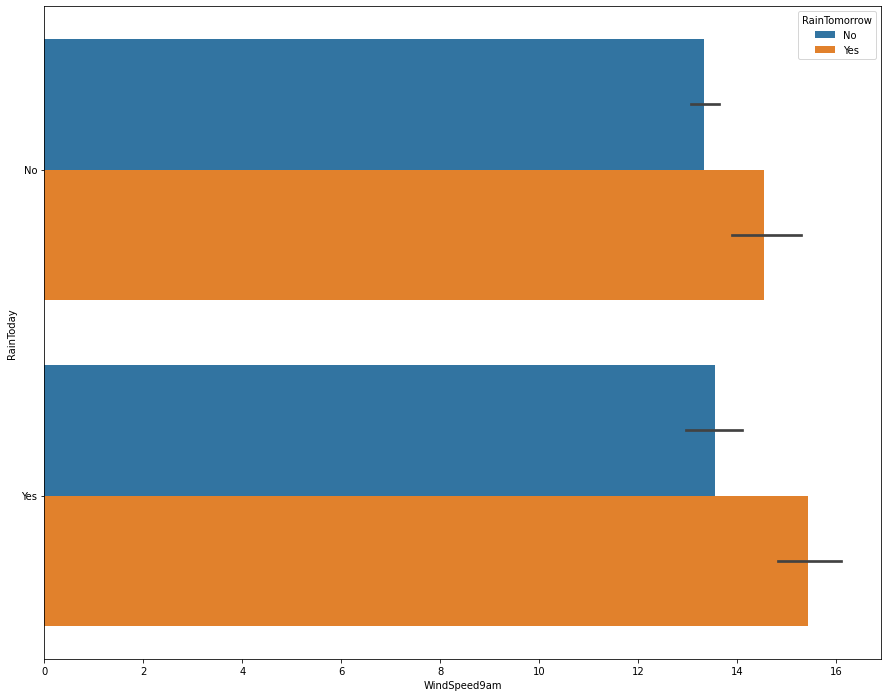

In [50]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed9am'],df['RainToday'],hue=df['RainTomorrow'])

WindSpeed3pm vs Categorical variables

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Location'>

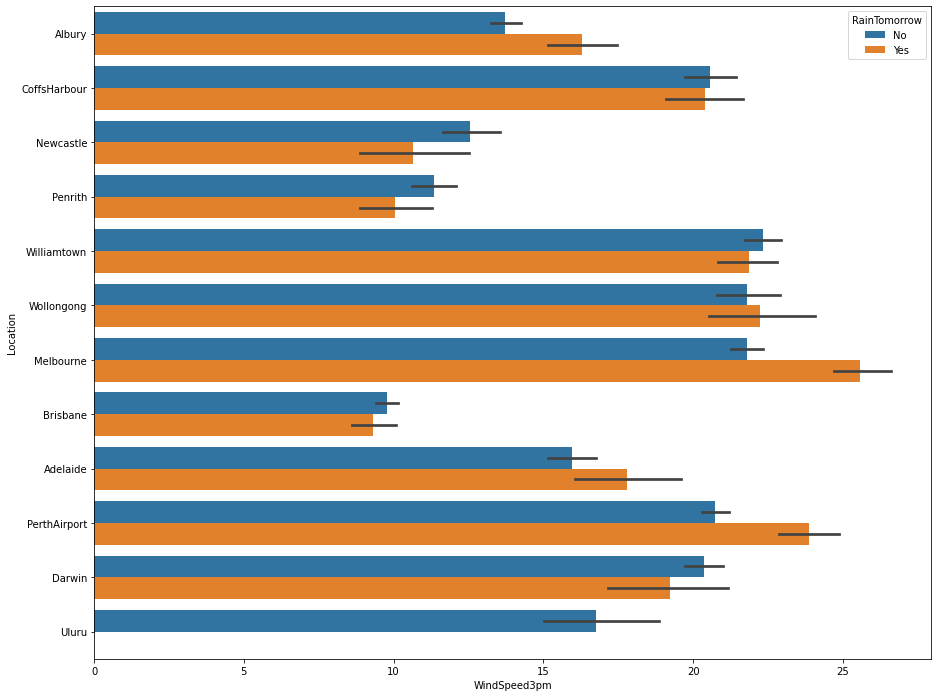

In [51]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed3pm'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='WindGustDir'>

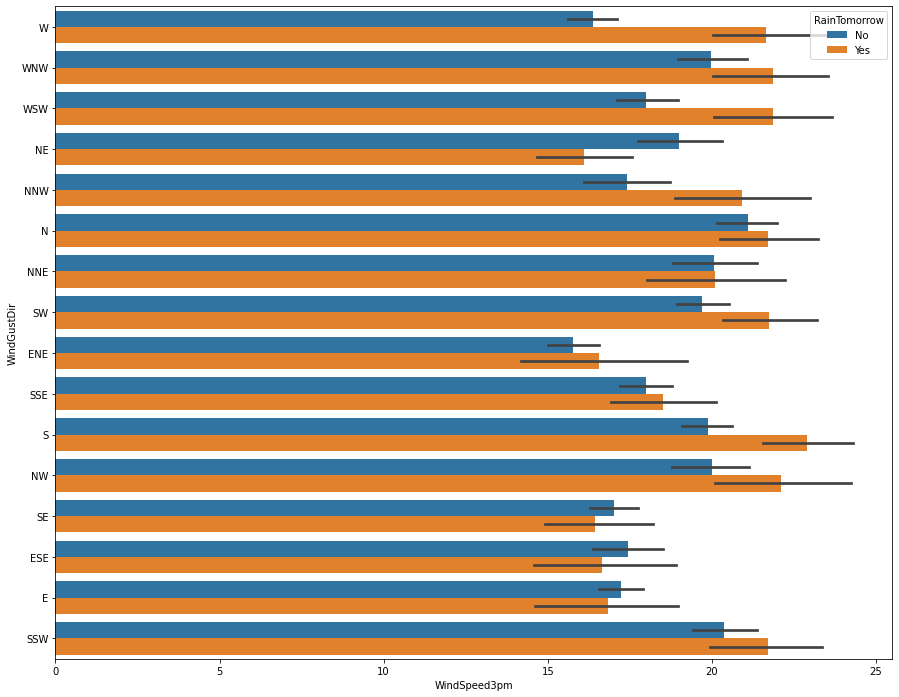

In [52]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed3pm'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='WindDir9am'>

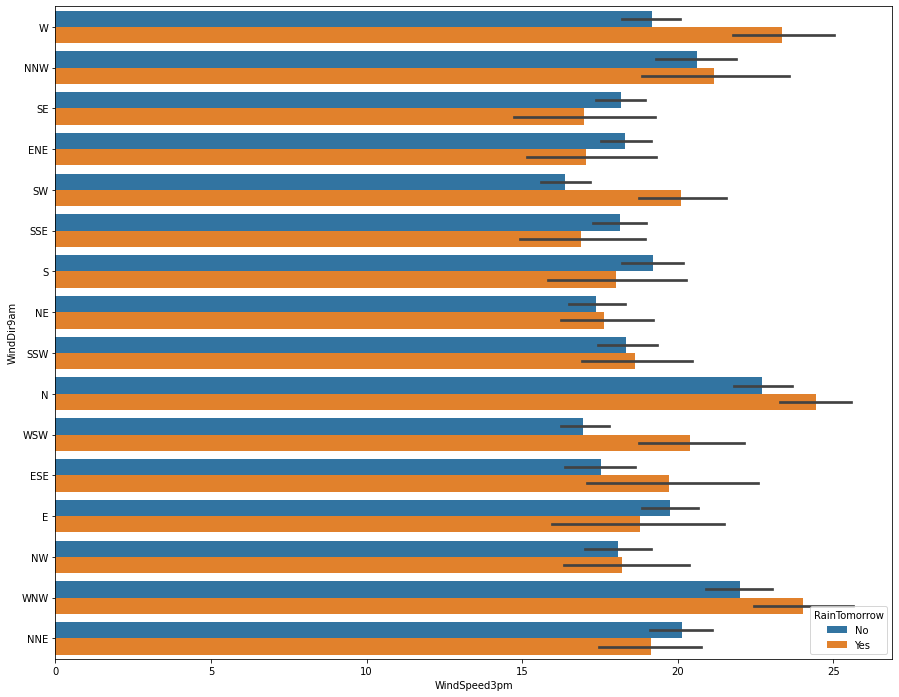

In [53]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed3pm'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='WindDir3pm'>

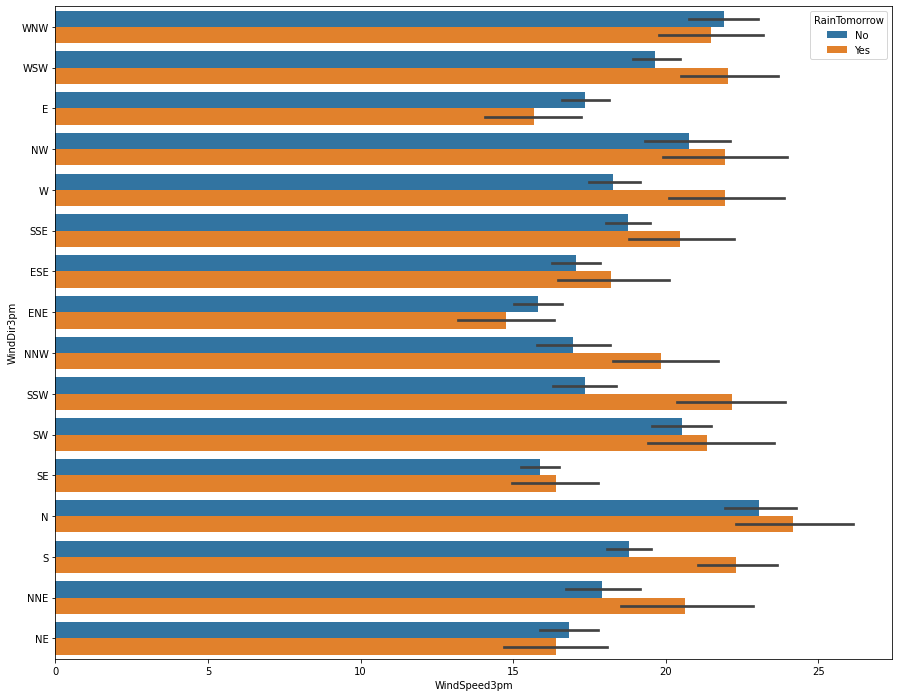

In [54]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed3pm'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='RainToday'>

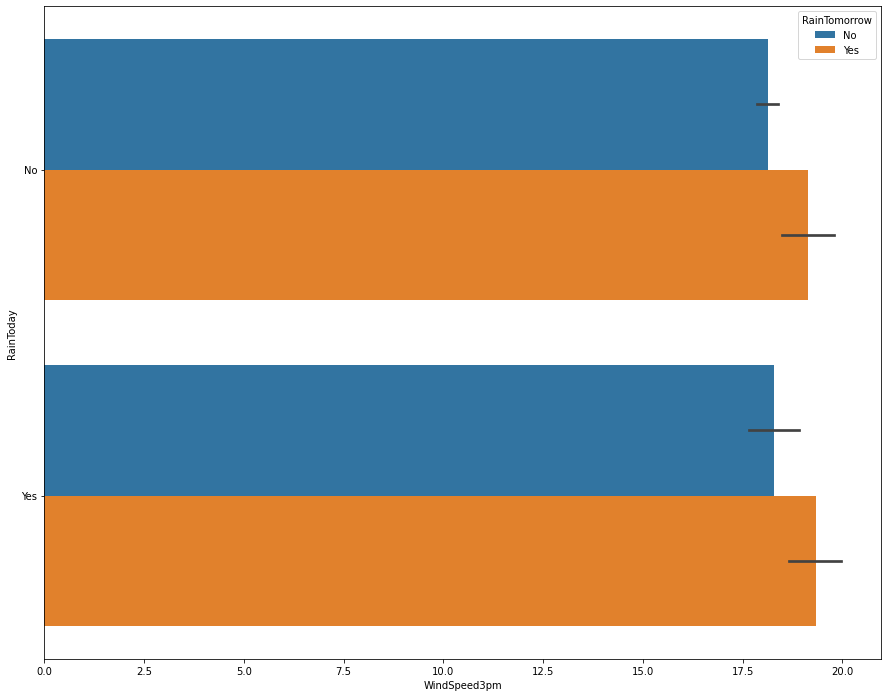

In [55]:
plt.figure(figsize=(15,12))
sns.barplot(df['WindSpeed3pm'],df['RainToday'],hue=df['RainTomorrow'])

In [56]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

Humidity9am vs categorical variables

<AxesSubplot:xlabel='Humidity9am', ylabel='Location'>

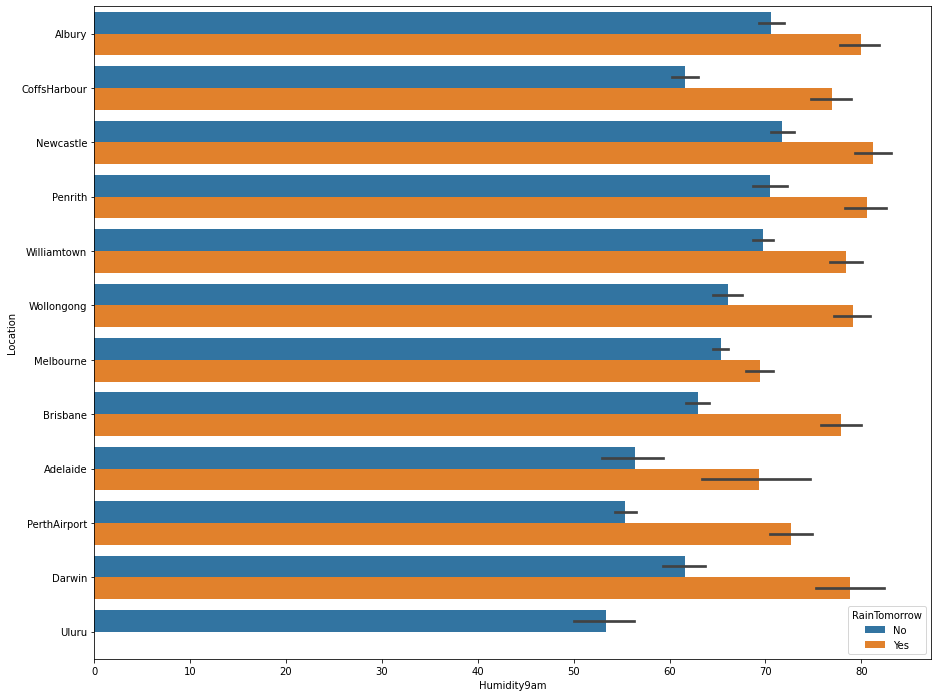

In [57]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='WindGustDir'>

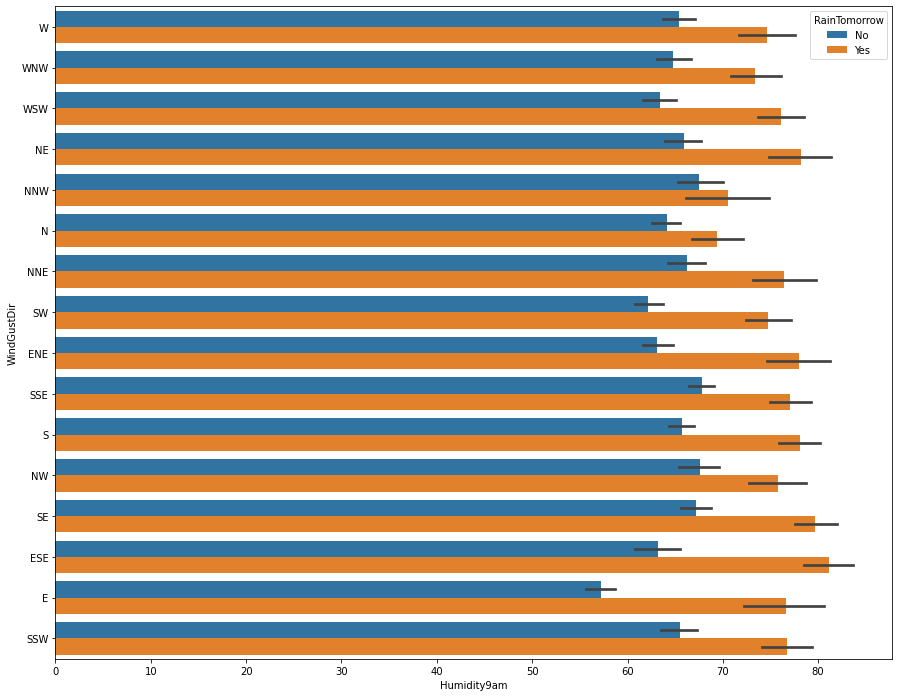

In [58]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='WindDir9am'>

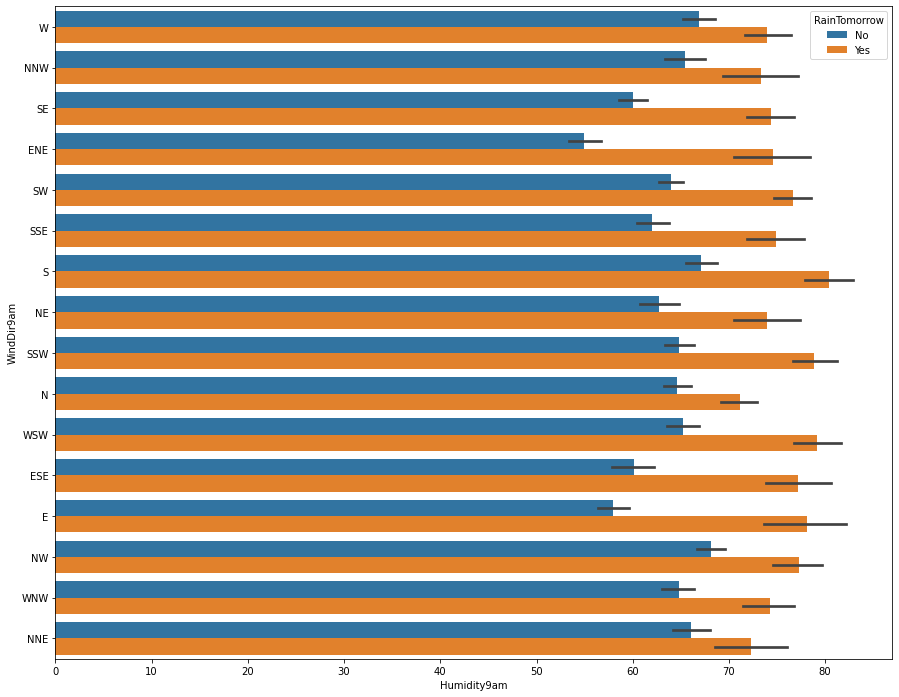

In [59]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='WindDir3pm'>

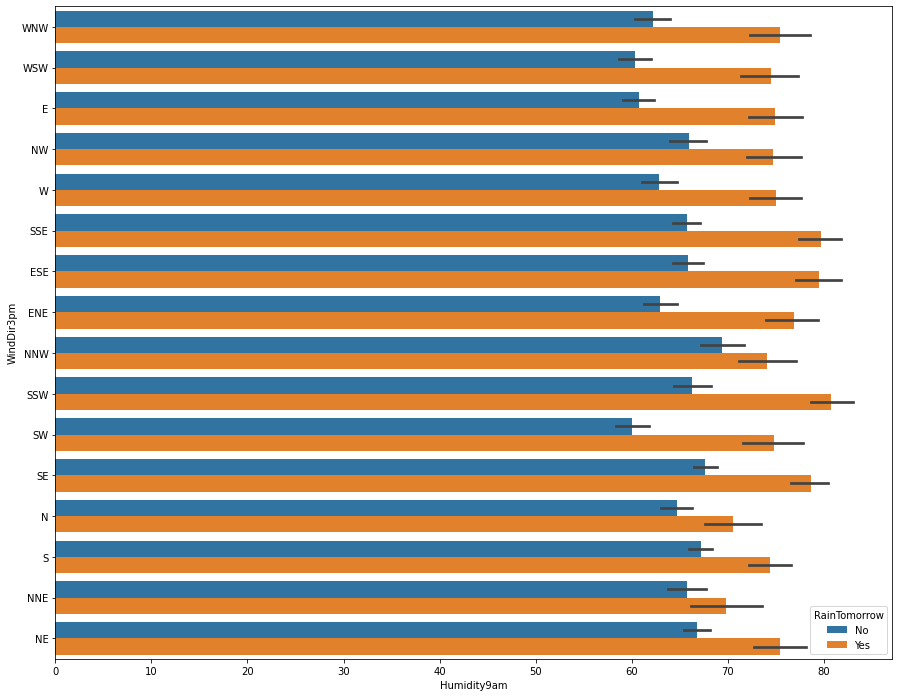

In [60]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='RainToday'>

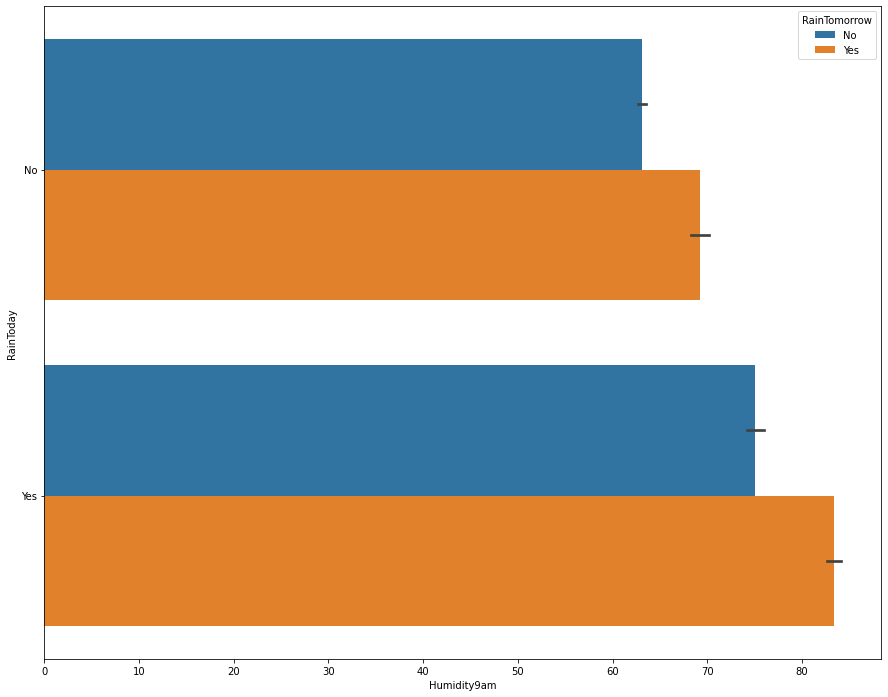

In [61]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['RainToday'],hue=df['RainTomorrow'])

Humidity3pm vs categorical variables

<AxesSubplot:xlabel='Humidity3pm', ylabel='Location'>

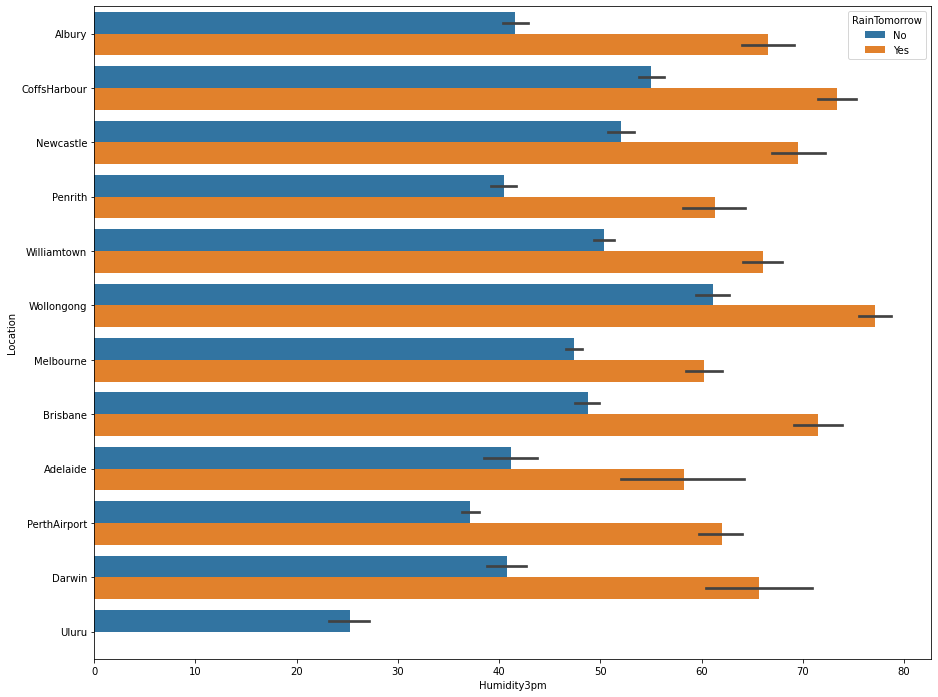

In [62]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity3pm'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='WindGustDir'>

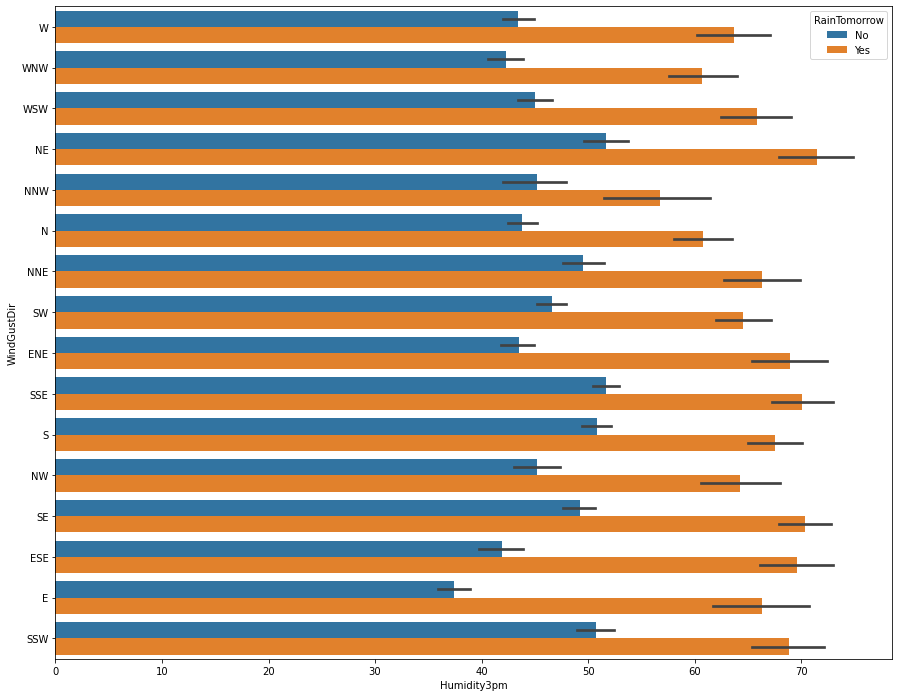

In [63]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity3pm'],df['WindGustDir'],hue=df['RainTomorrow'])

Humidity9am vs categorical variables

<AxesSubplot:xlabel='Humidity9am', ylabel='Location'>

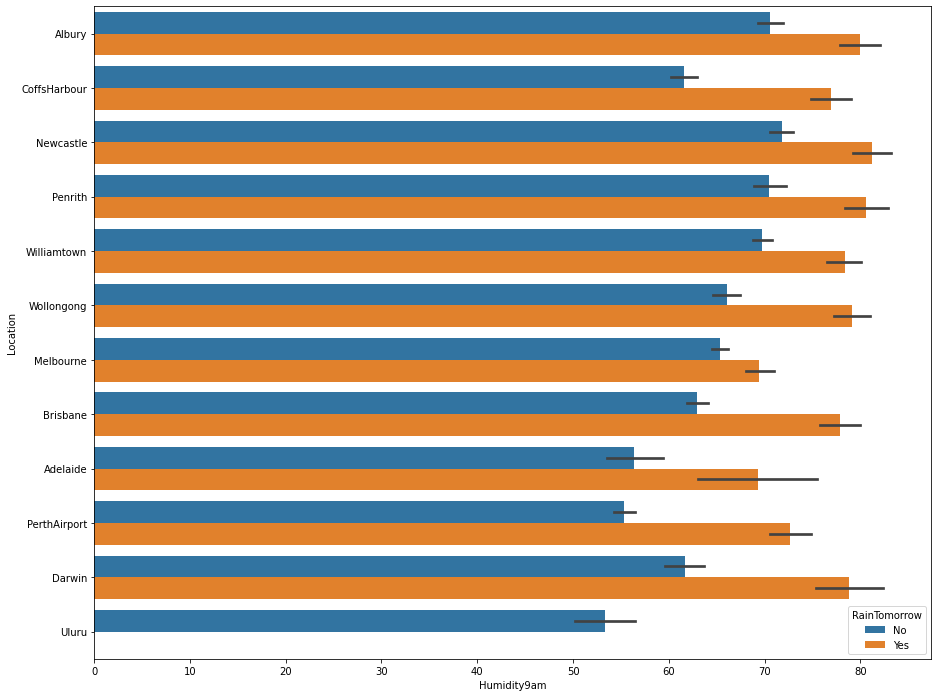

In [64]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='WindGustDir'>

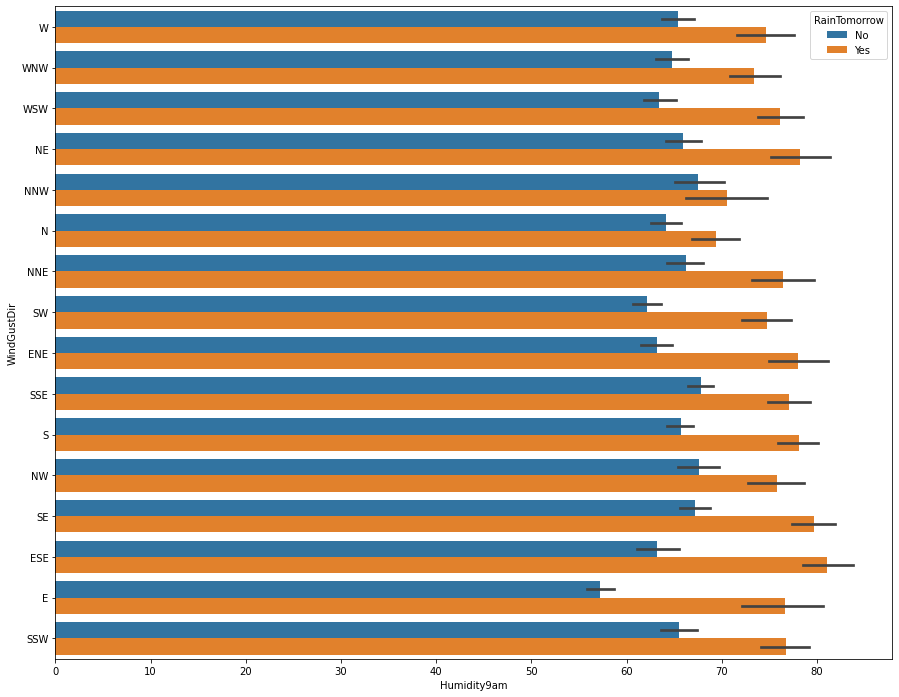

In [65]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='WindDir9am'>

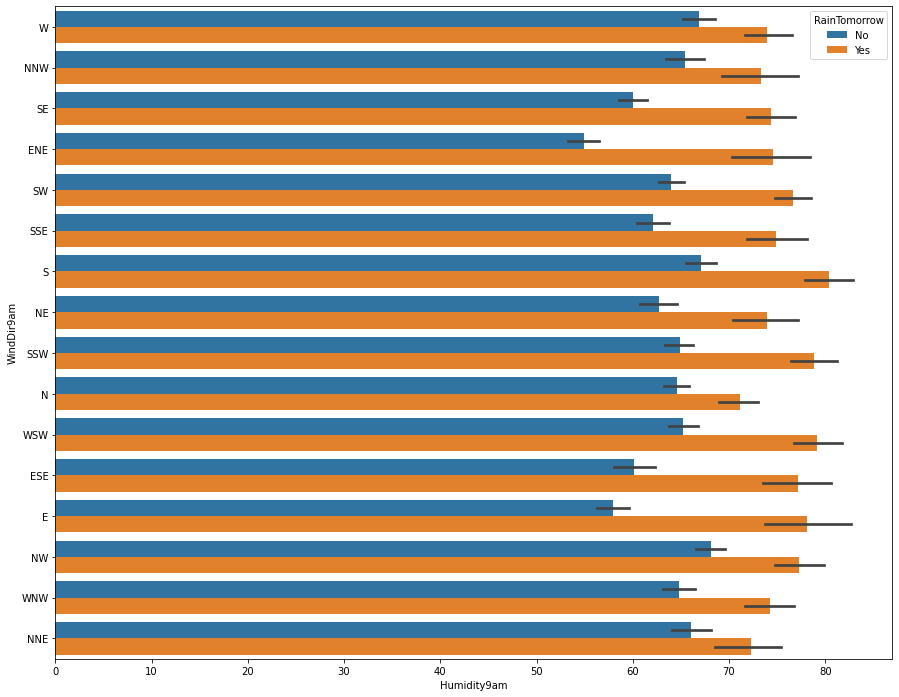

In [66]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='WindDir3pm'>

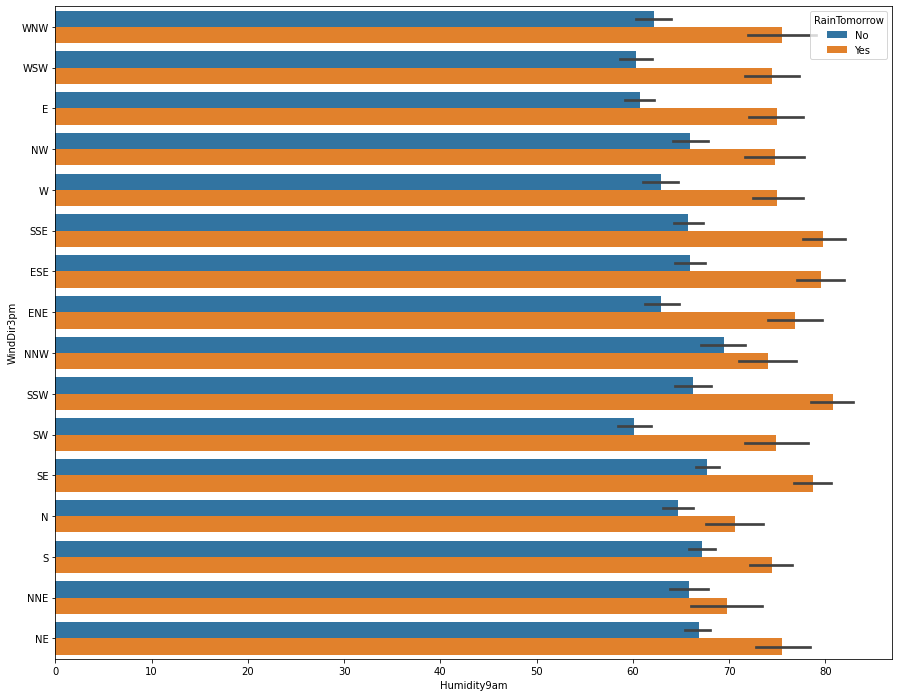

In [67]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Humidity9am', ylabel='RainToday'>

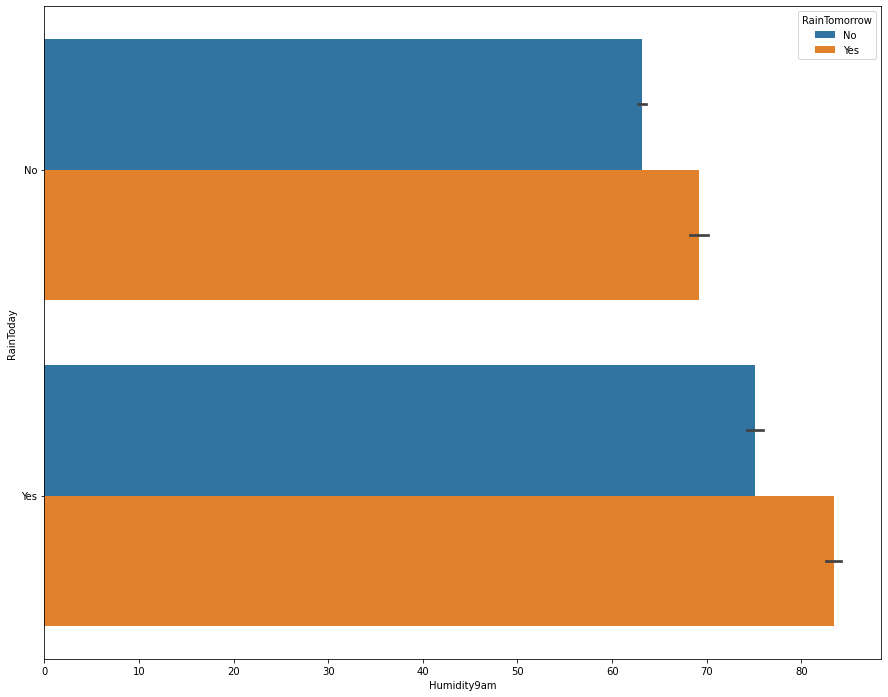

In [68]:
plt.figure(figsize=(15,12))
sns.barplot(df['Humidity9am'],df['RainToday'],hue=df['RainTomorrow'])

Pressure9am vs categorical variables

<AxesSubplot:xlabel='Pressure9am', ylabel='Location'>

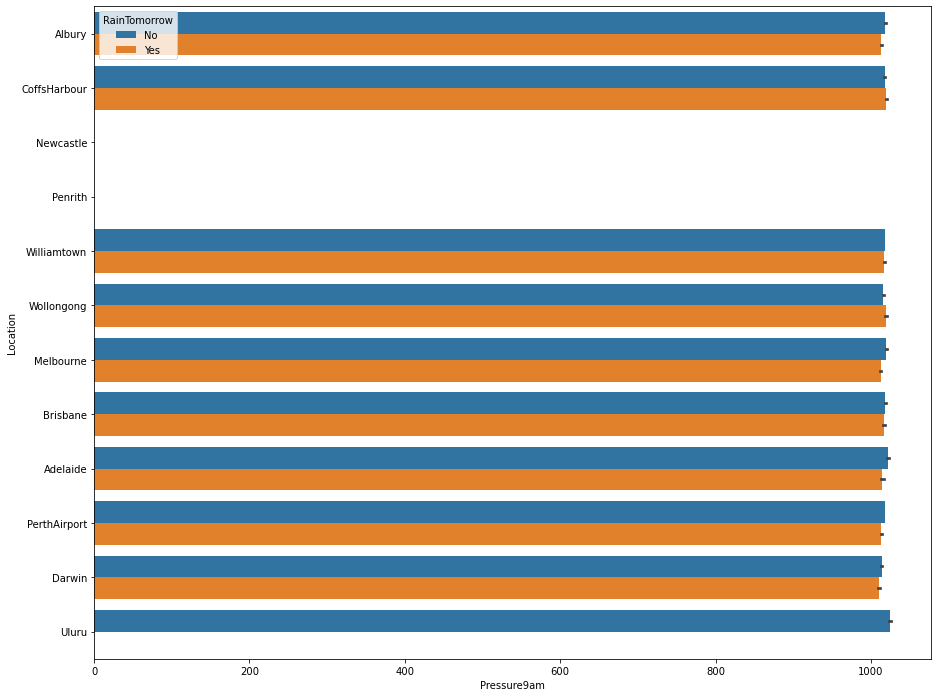

In [69]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure9am'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Pressure9am', ylabel='WindGustDir'>

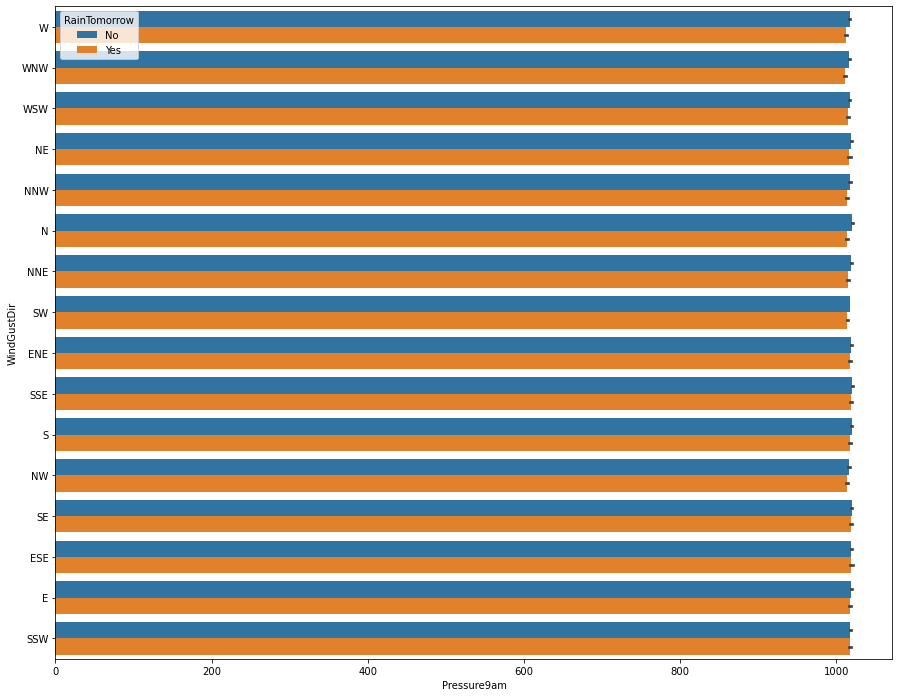

In [70]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure9am'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Pressure9am', ylabel='WindDir9am'>

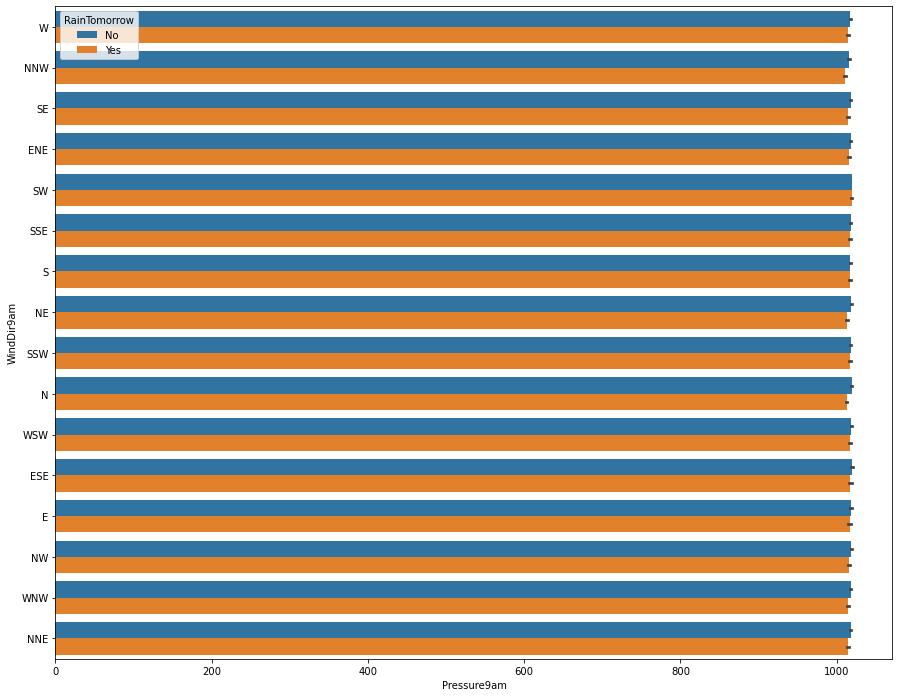

In [71]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure9am'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Pressure9am', ylabel='WindDir3pm'>

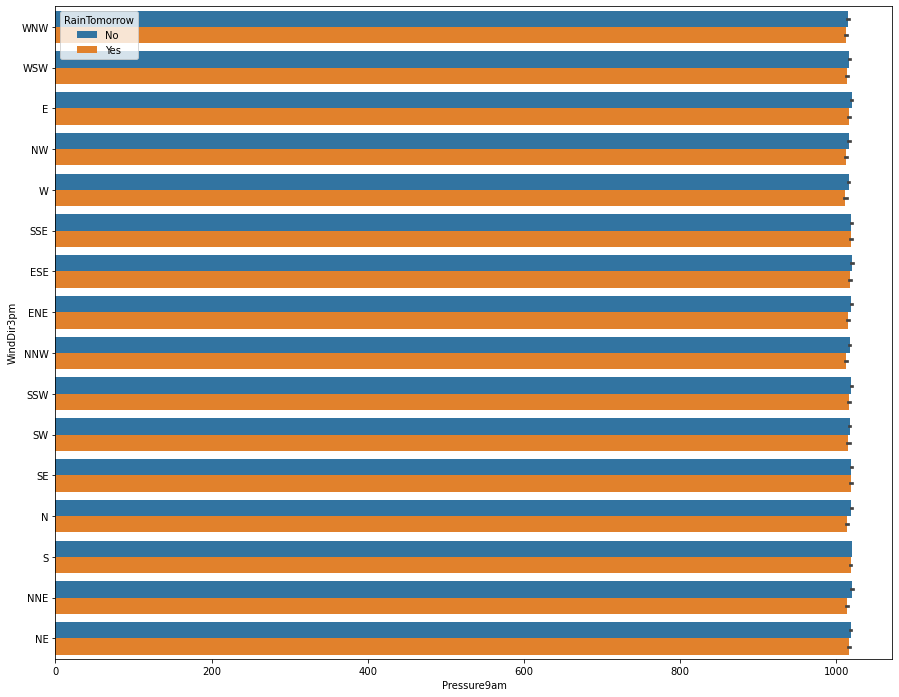

In [72]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure9am'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Pressure9am', ylabel='RainToday'>

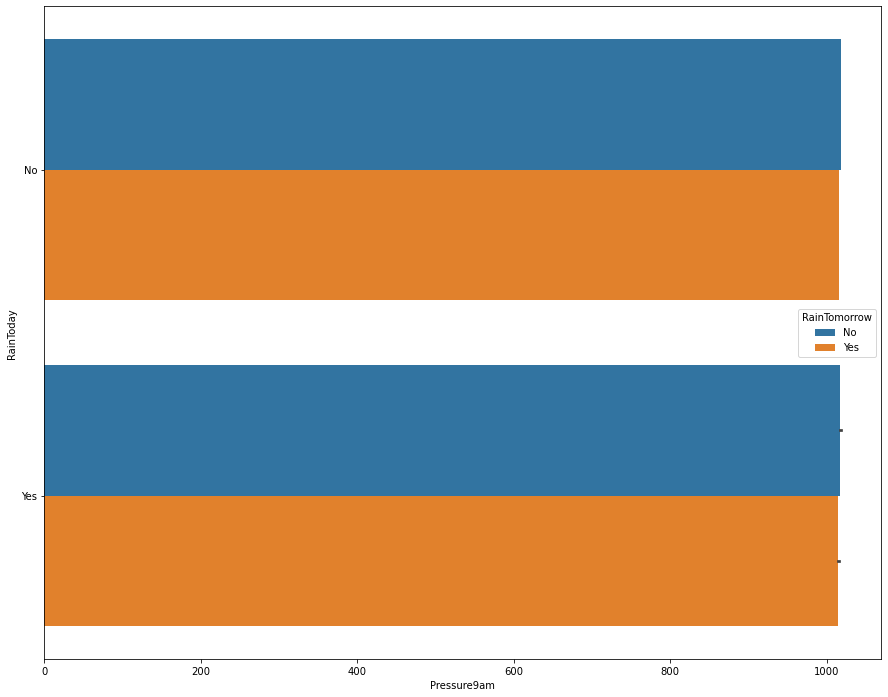

In [73]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure9am'],df['RainToday'],hue=df['RainTomorrow'])

Pressure3pm vs categorical variables

<AxesSubplot:xlabel='Pressure3pm', ylabel='Location'>

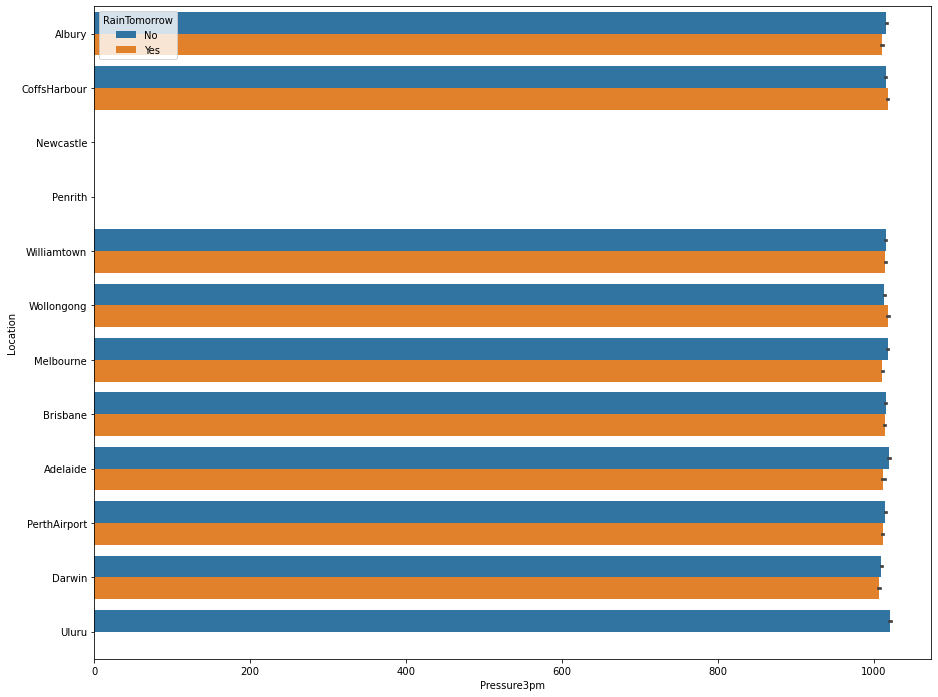

In [74]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure3pm'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='WindGustDir'>

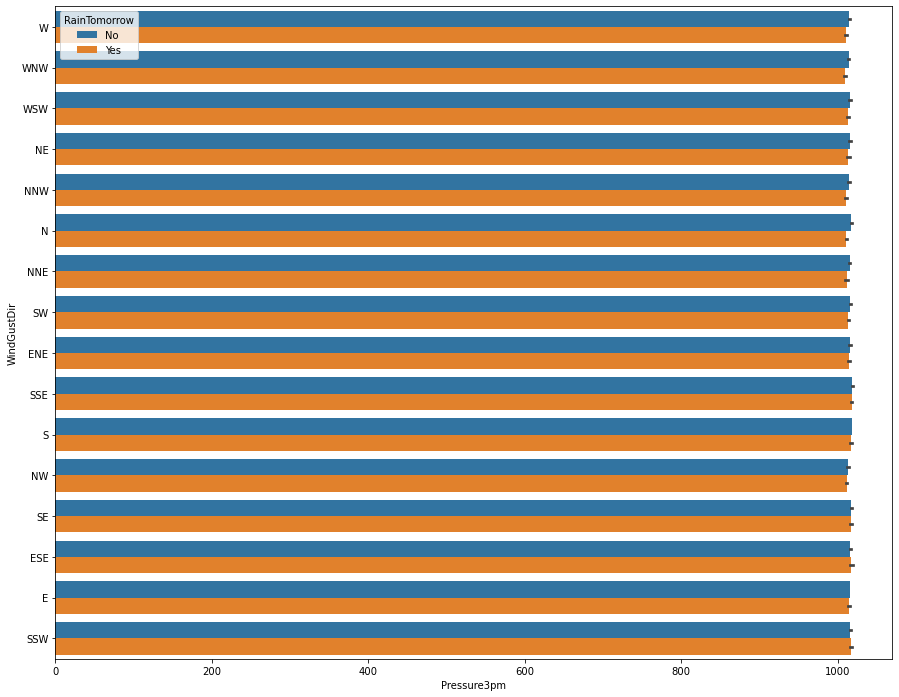

In [75]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure3pm'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='WindDir9am'>

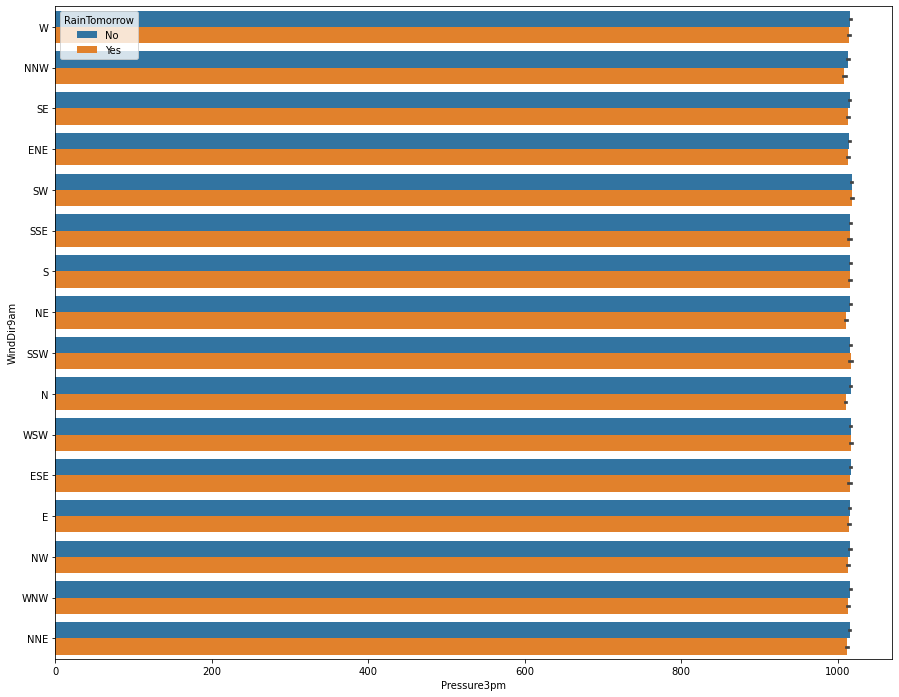

In [76]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure3pm'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='WindDir3pm'>

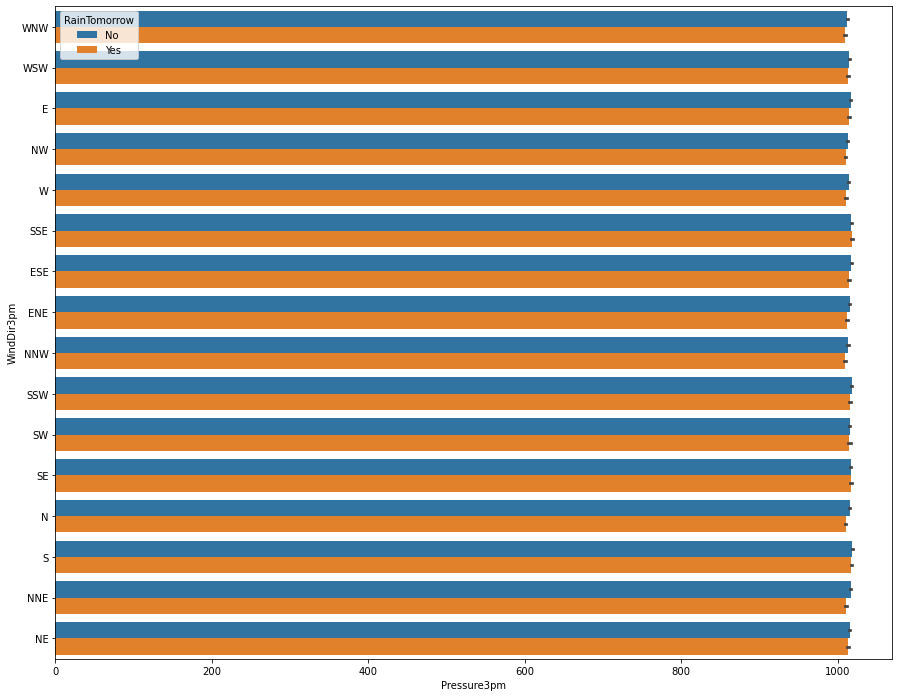

In [77]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure3pm'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='RainToday'>

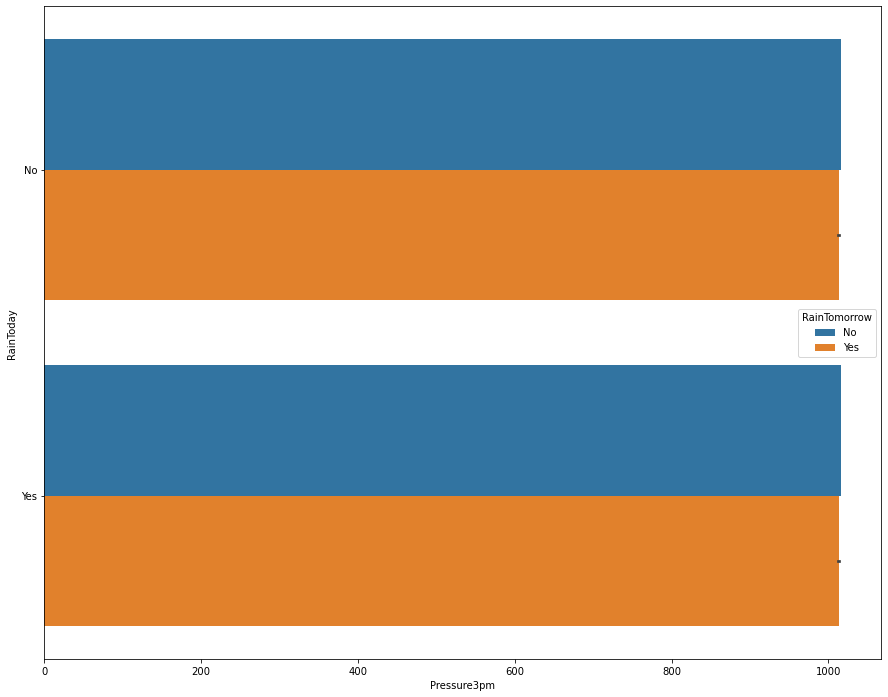

In [78]:
plt.figure(figsize=(15,12))
sns.barplot(df['Pressure3pm'],df['RainToday'],hue=df['RainTomorrow'])

Cloud9am vs categorical variables

<AxesSubplot:xlabel='Cloud9am', ylabel='Location'>

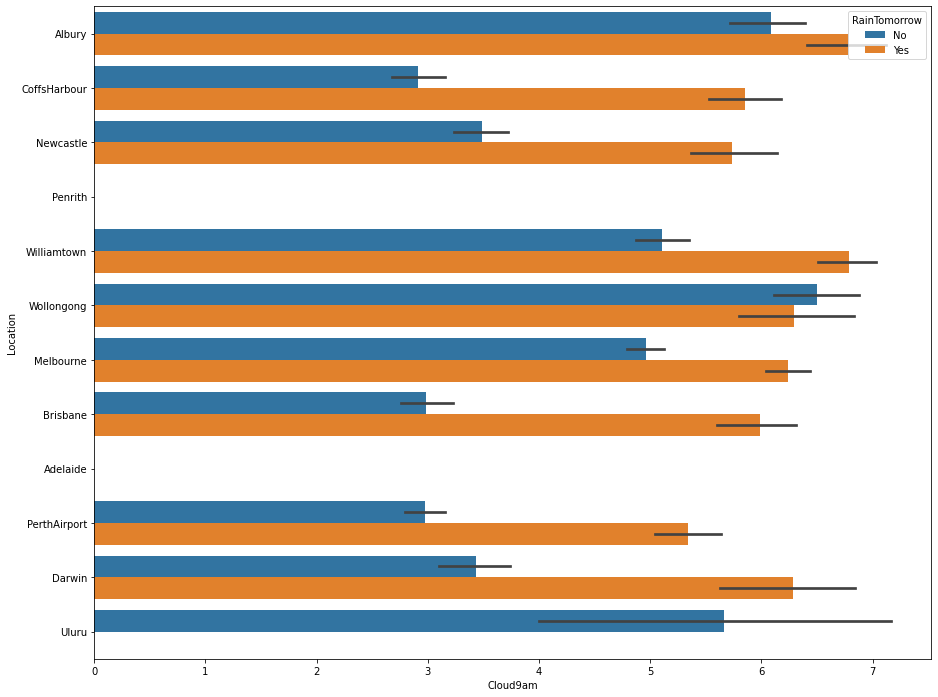

In [79]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud9am'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud9am', ylabel='WindGustDir'>

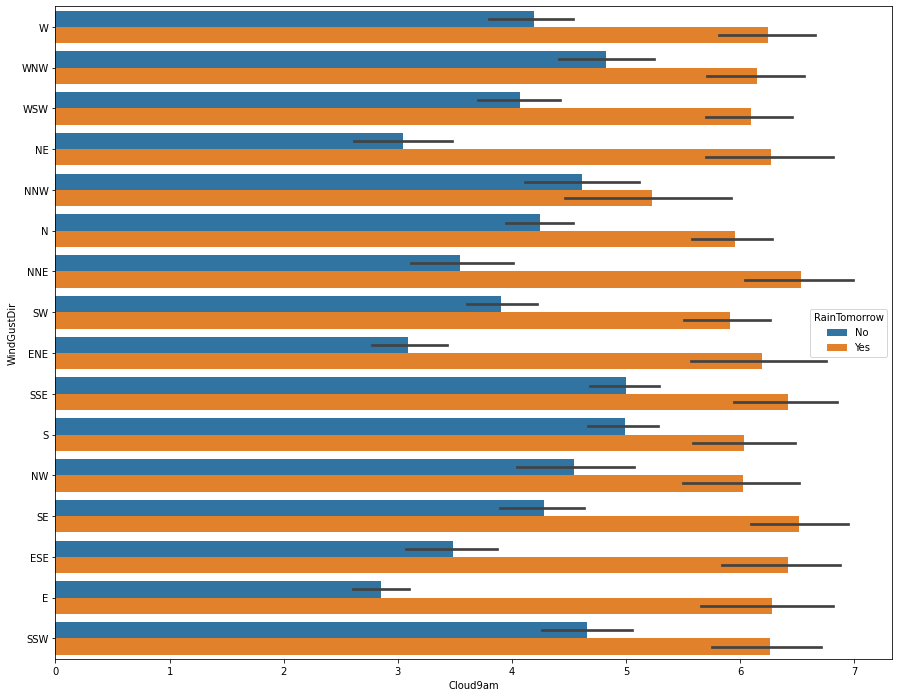

In [80]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud9am'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud9am', ylabel='WindDir9am'>

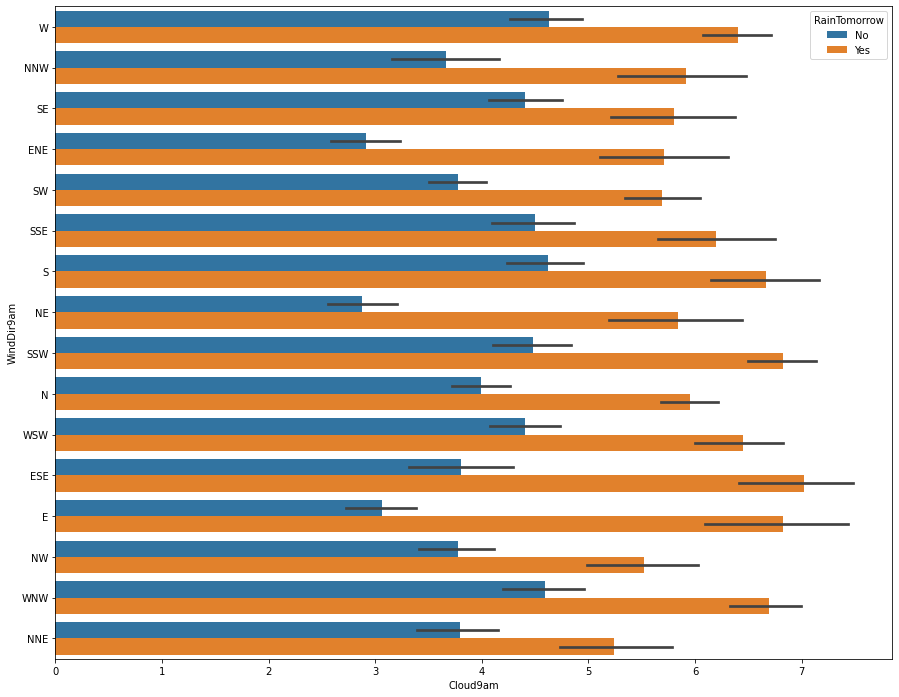

In [81]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud9am'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud9am', ylabel='WindDir3pm'>

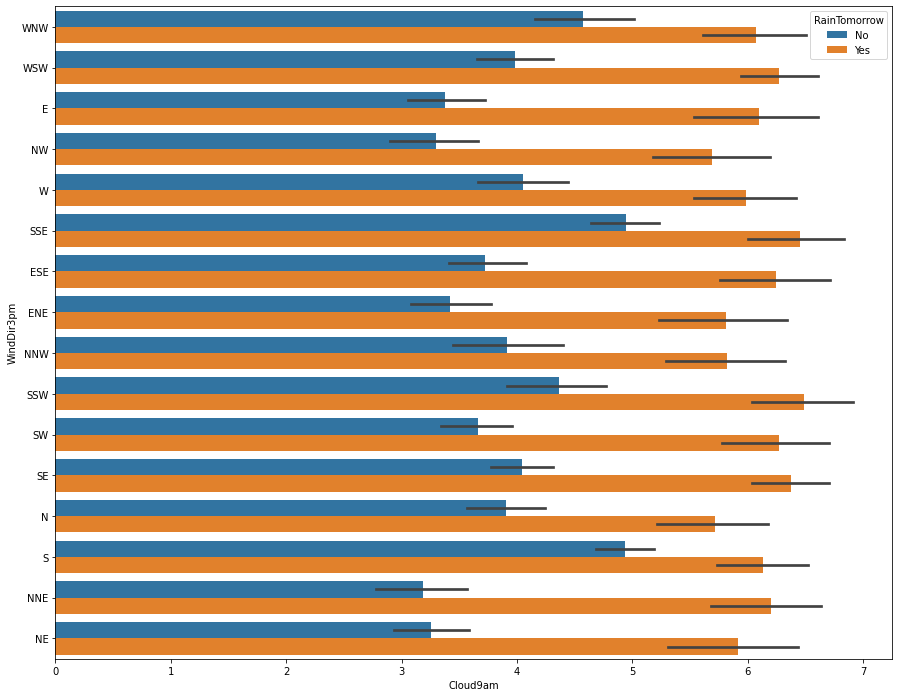

In [82]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud9am'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud9am', ylabel='RainToday'>

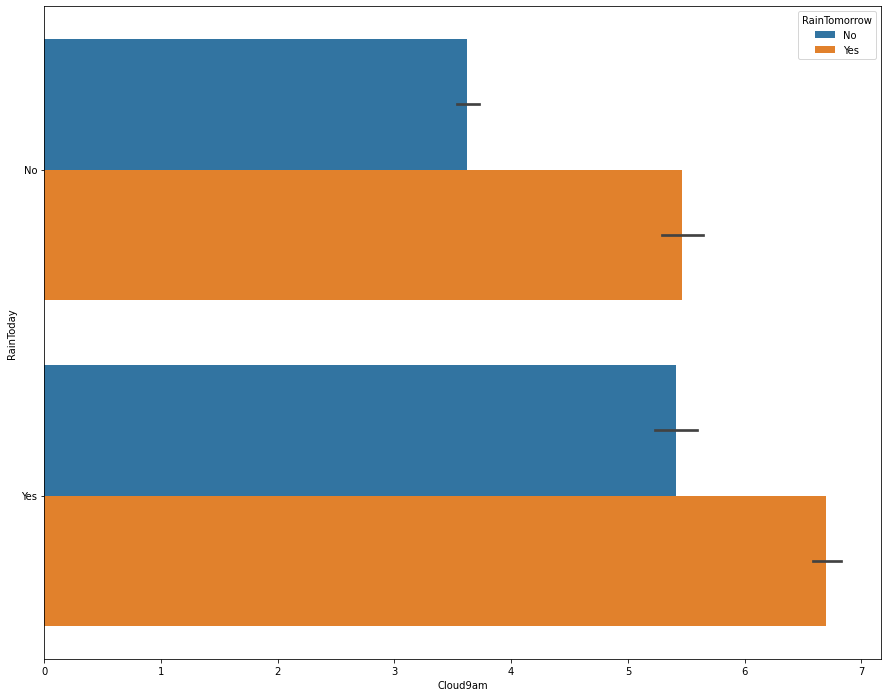

In [83]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud9am'],df['RainToday'],hue=df['RainTomorrow'])

Cloud3pm vs categorical 

<AxesSubplot:xlabel='Cloud3pm', ylabel='Location'>

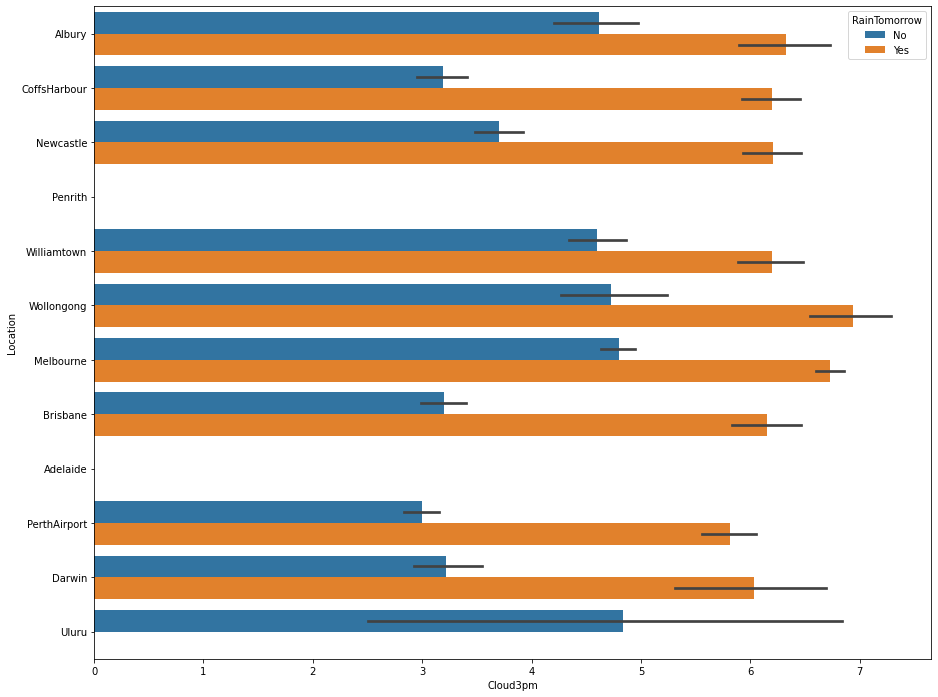

In [84]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud3pm'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='WindGustDir'>

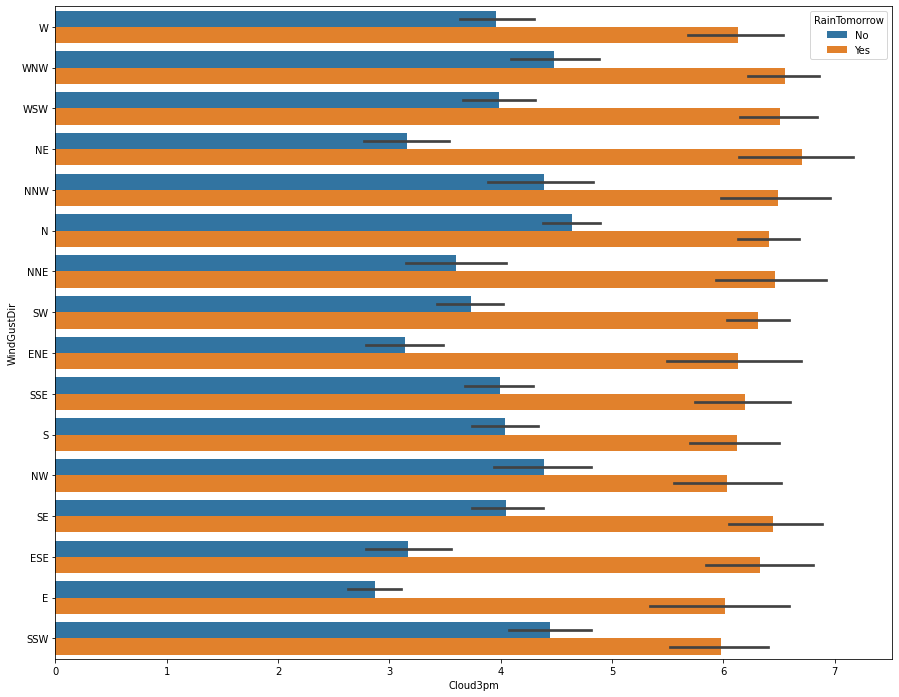

In [85]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud3pm'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='WindDir9am'>

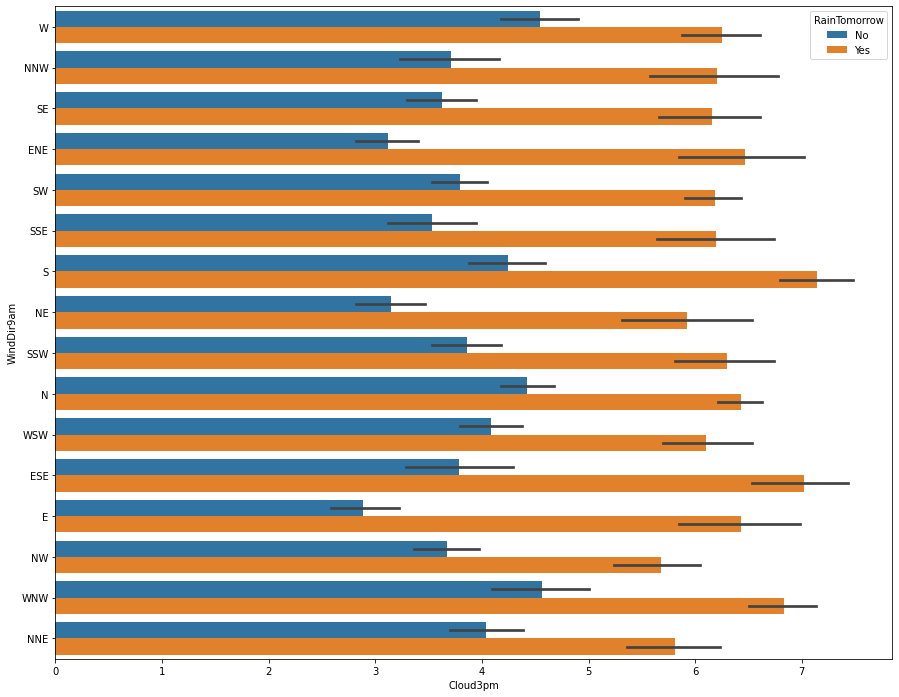

In [86]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud3pm'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='WindDir3pm'>

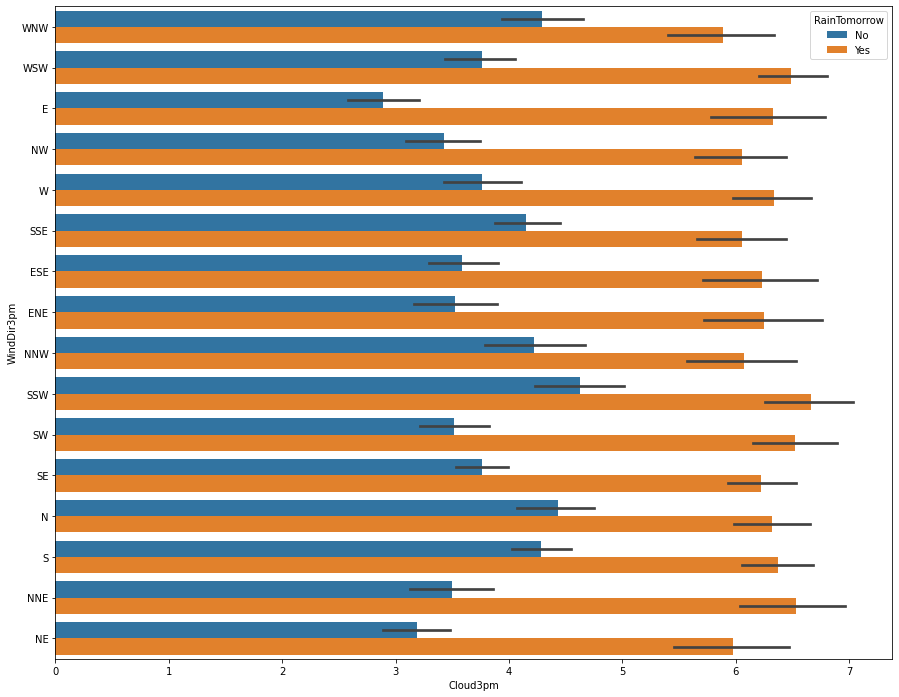

In [87]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud3pm'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='RainToday'>

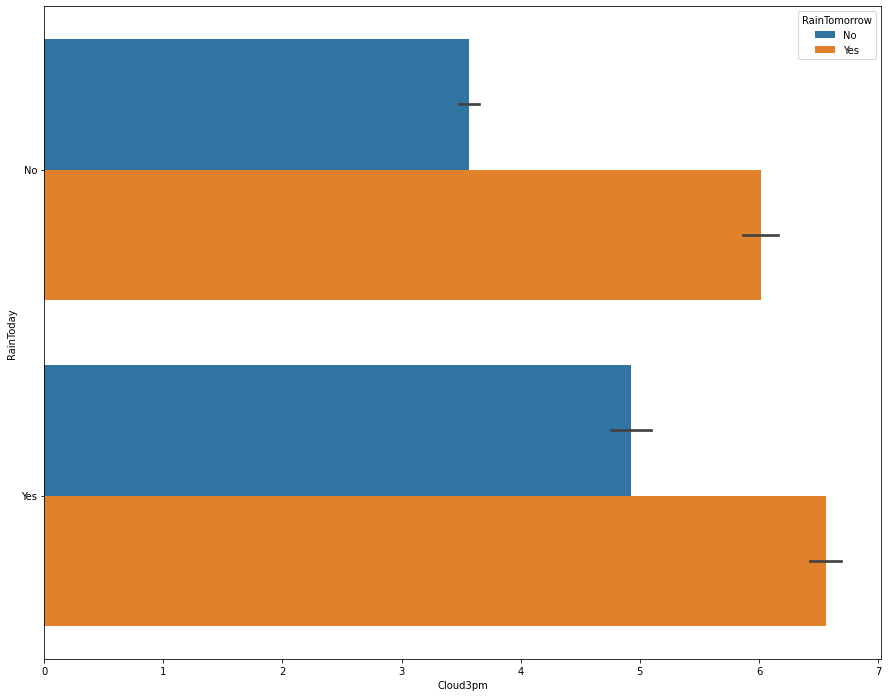

In [88]:
plt.figure(figsize=(15,12))
sns.barplot(df['Cloud3pm'],df['RainToday'],hue=df['RainTomorrow'])

Temp9am vs categorical

<AxesSubplot:xlabel='Temp9am', ylabel='Location'>

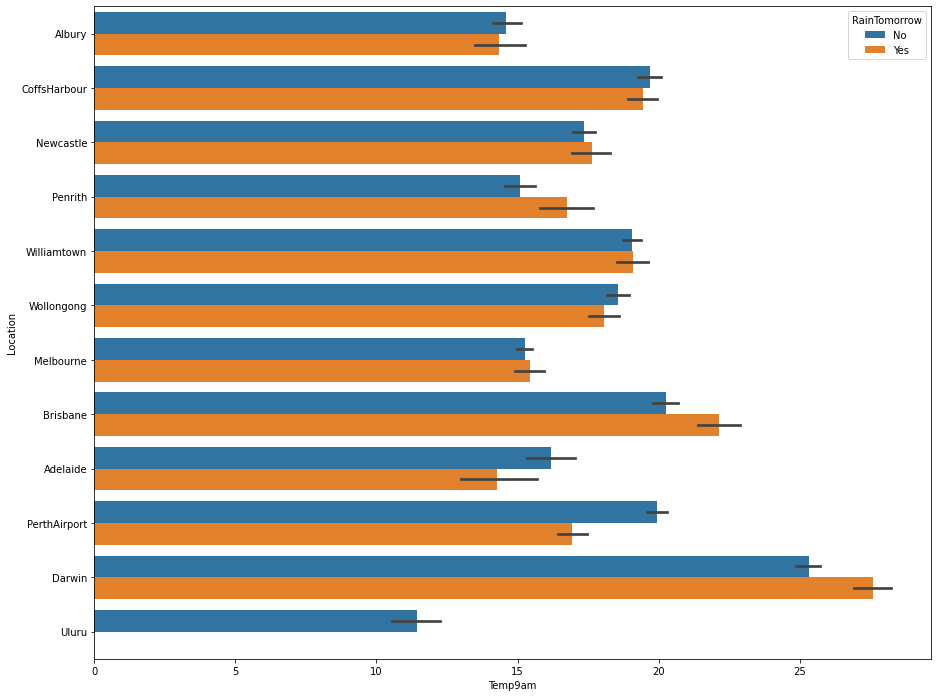

In [89]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp9am'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Temp9am', ylabel='WindGustDir'>

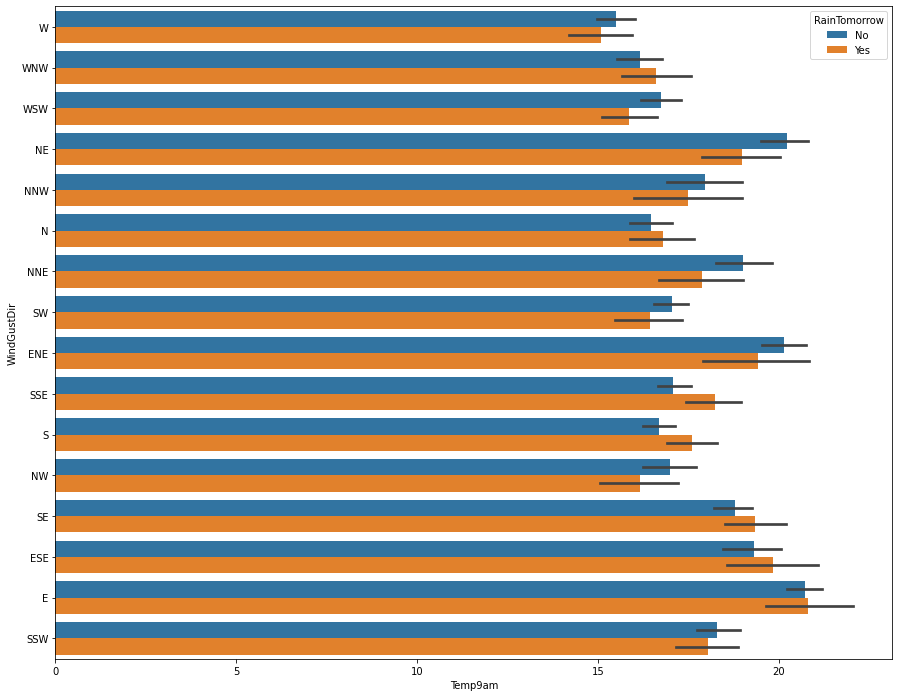

In [90]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp9am'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Temp9am', ylabel='WindDir9am'>

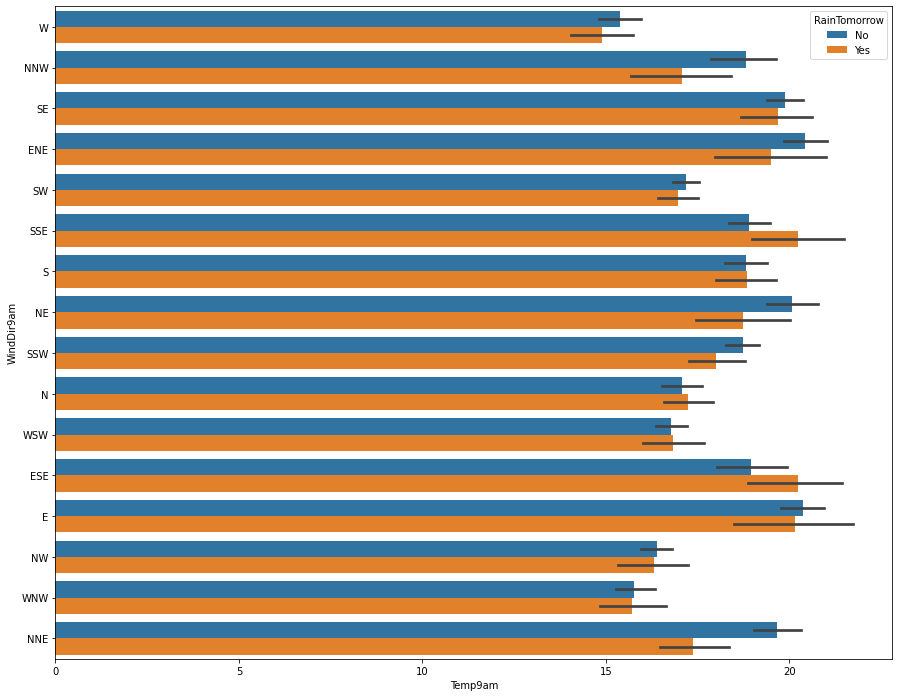

In [91]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp9am'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Temp9am', ylabel='WindDir3pm'>

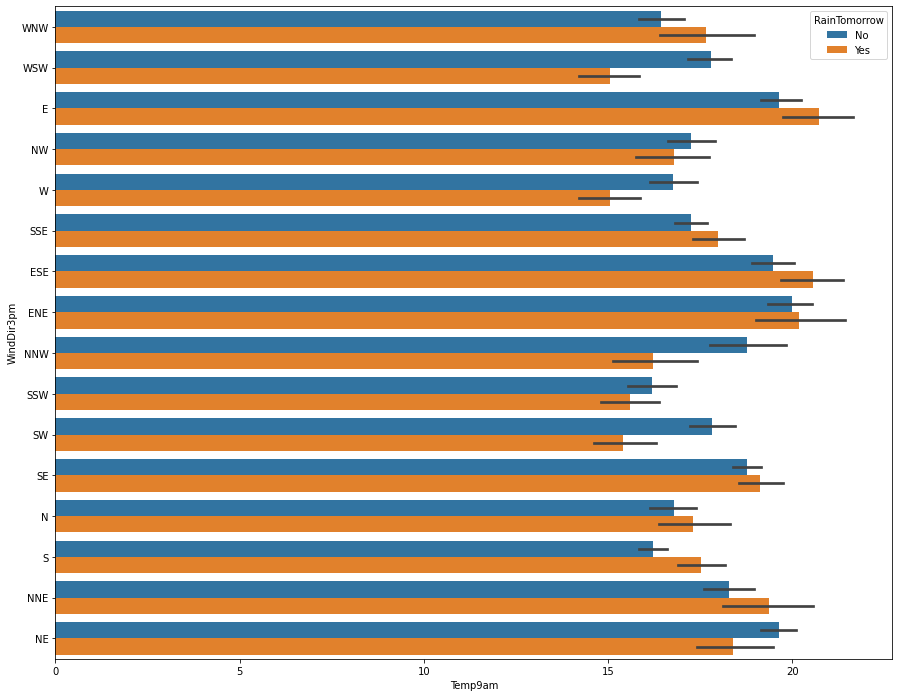

In [92]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp9am'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Temp9am', ylabel='RainToday'>

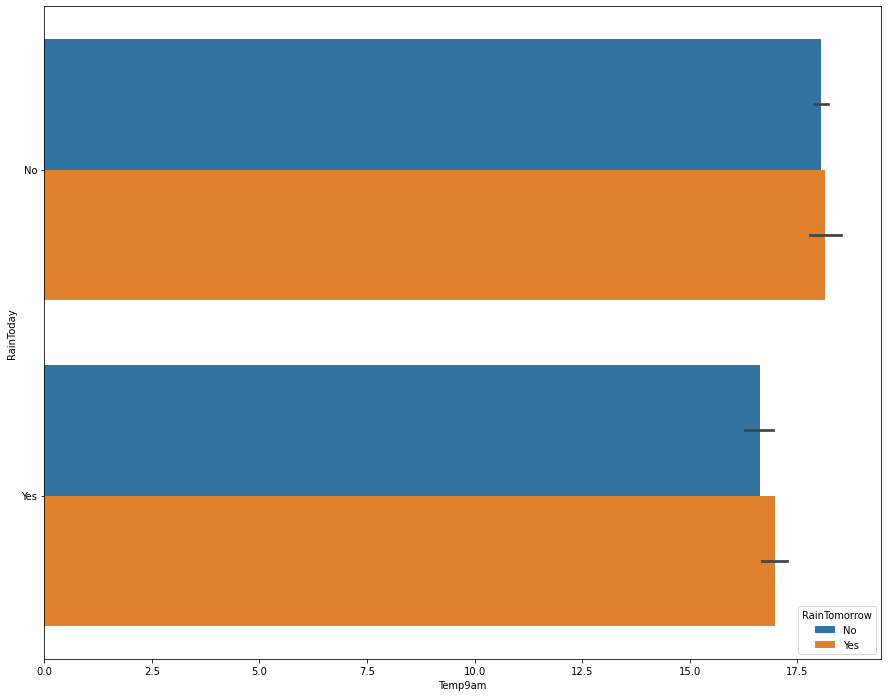

In [93]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp9am'],df['RainToday'],hue=df['RainTomorrow'])

Temp3pm vs categorical

<AxesSubplot:xlabel='Temp3pm', ylabel='Location'>

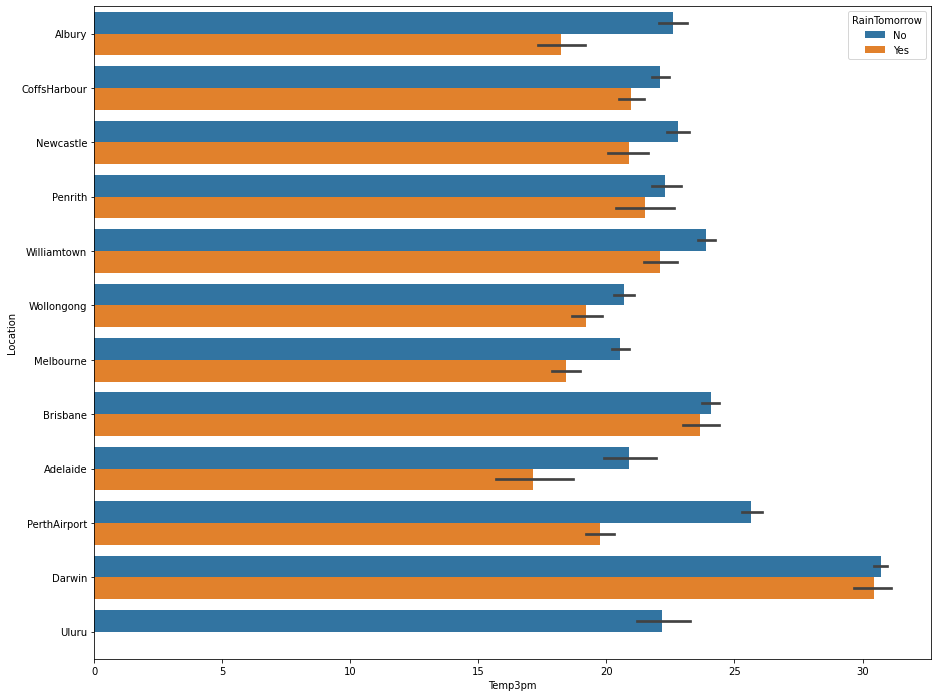

In [94]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp3pm'],df['Location'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Temp3pm', ylabel='WindGustDir'>

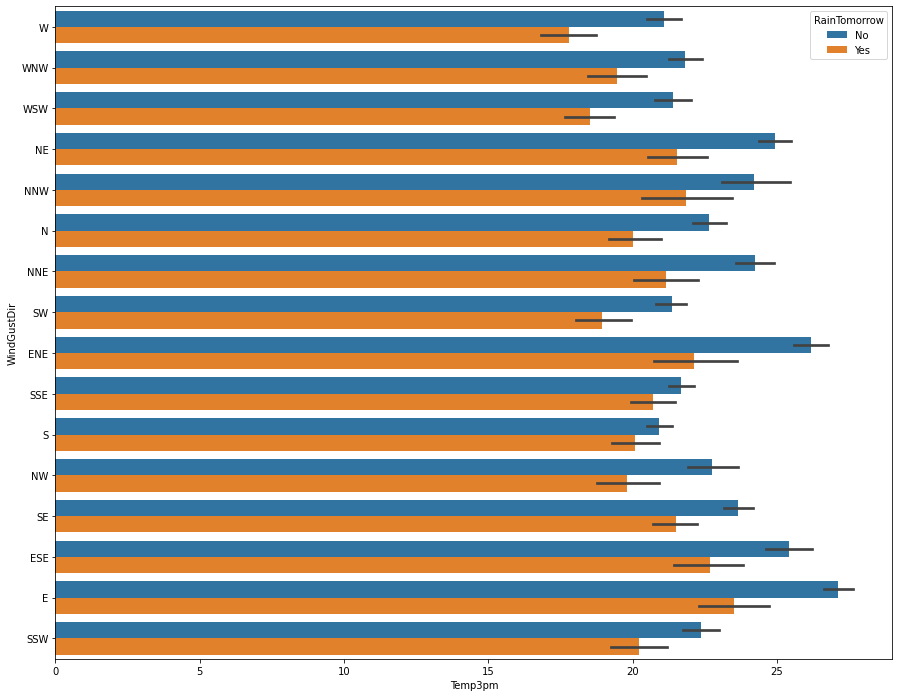

In [95]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp3pm'],df['WindGustDir'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Temp3pm', ylabel='WindDir9am'>

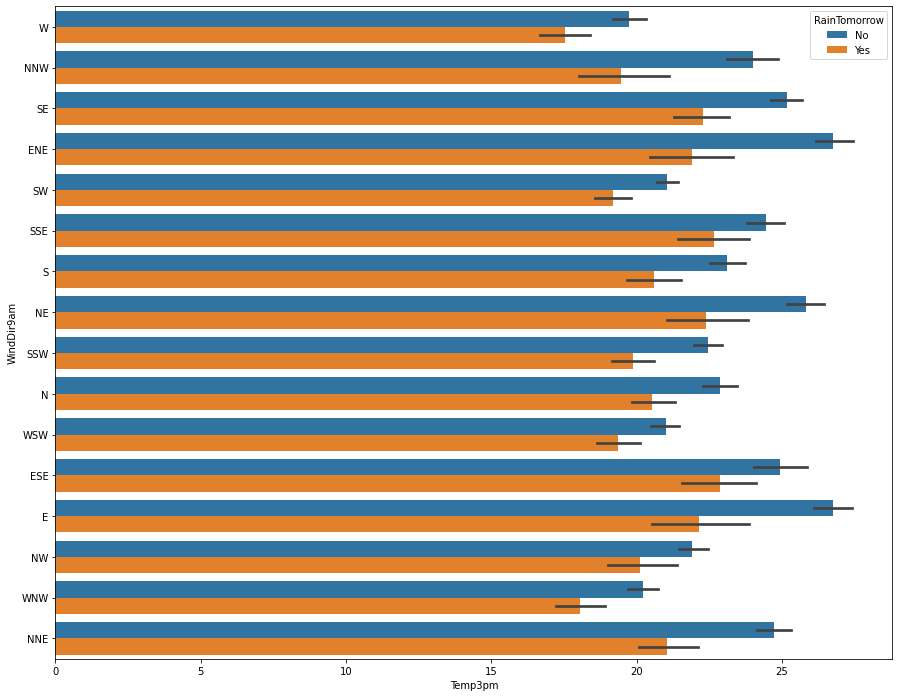

In [96]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp3pm'],df['WindDir9am'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Temp3pm', ylabel='WindDir3pm'>

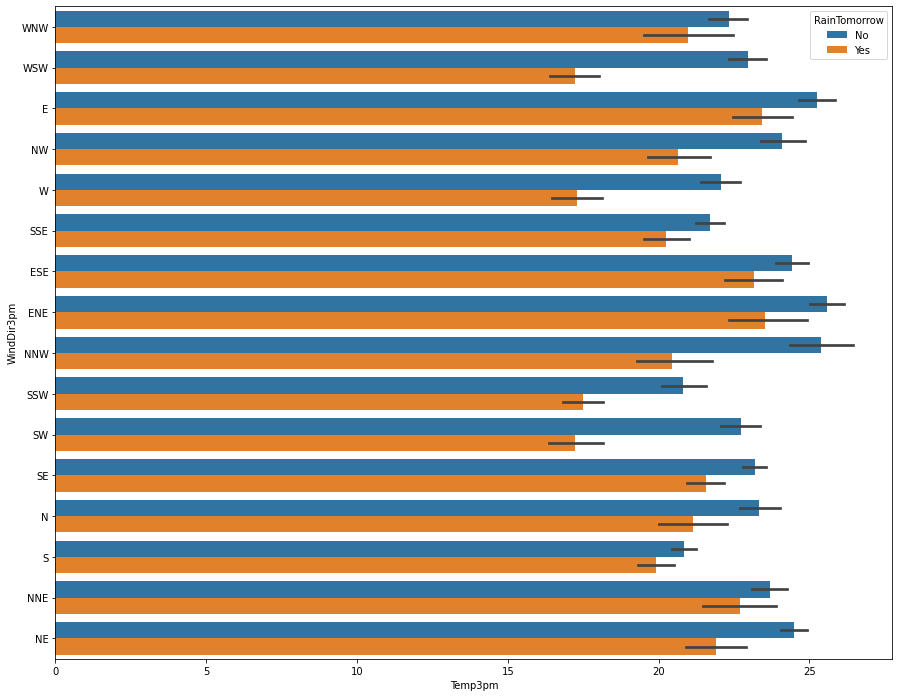

In [97]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp3pm'],df['WindDir3pm'],hue=df['RainTomorrow'])

<AxesSubplot:xlabel='Temp3pm', ylabel='RainToday'>

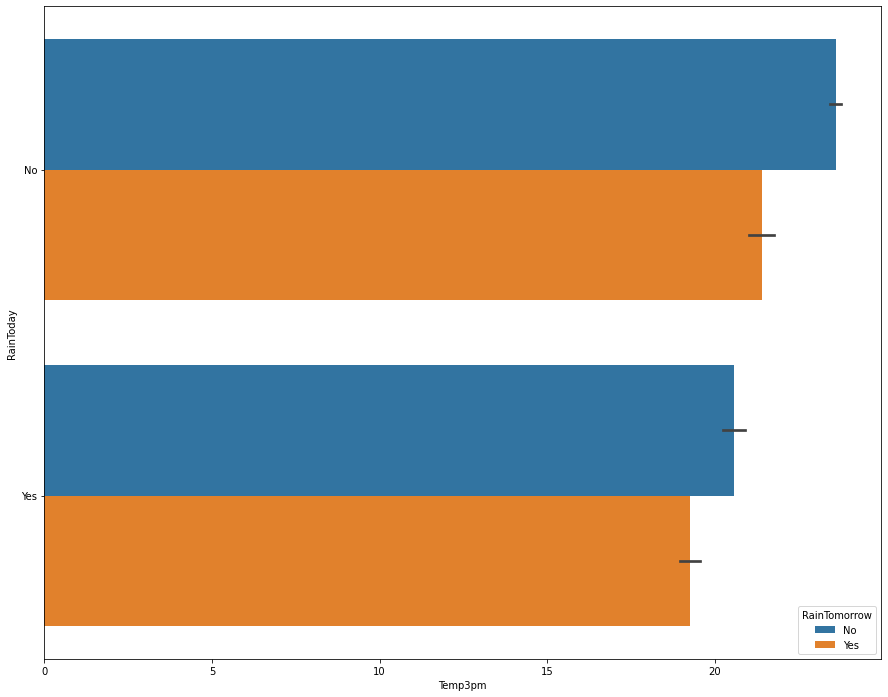

In [98]:
plt.figure(figsize=(15,12))
sns.barplot(df['Temp3pm'],df['RainToday'],hue=df['RainTomorrow'])

I have done with the bivariate analysis part.

# Missing Values

In [99]:
#Check for missing values
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
year                0
month               0
day                 0
dtype: int64

There are lot of missing values I will tune them one by one.

In [100]:
#MinTemp
df['MinTemp'].value_counts()

 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64

In [101]:
#Using fillna()
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

In [102]:
df['MinTemp'].isnull().sum()

0

In [103]:
#MaxTemp
df['MaxTemp'].value_counts()

19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64

In [104]:
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['MaxTemp'].isnull().sum()

0

In [105]:
#Rainfall
df['Rainfall'].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [106]:
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Rainfall'].isnull().sum()

0

In [107]:
#Evaporation
df['Evaporation'].value_counts()

4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
17.0      1
18.6      1
22.4      1
19.2      1
0.7       1
Name: Evaporation, Length: 116, dtype: int64

In [108]:
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Evaporation'].isnull().sum()

0

In [109]:
#Sunshine
df['Sunshine'].value_counts()

0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64

In [110]:
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Sunshine'].isnull().sum()

0

In [111]:
#WindGustDir
df['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [112]:
numerical_variables_for_null_values = df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',   
                                    'Cloud9am','Cloud3pm','Temp9am','Temp3pm']]

In [113]:
numerical_variables_for_null_values

,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...
8420,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
8421,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
8422,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
8423,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [114]:
#Looping over numerical_variables_for_null_values to fill in null values
for i in numerical_variables_for_null_values:
    df[i] = df[i].fillna(df[i].mean())
df[i].isnull().sum()

0

In [115]:
#Missing values
df.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
year               0
month              0
day                0
dtype: int64

I have tuned the numerical variables now I will proceed to categorical variables.

In [116]:
categorical_variables = df.select_dtypes(include=['O'])

categorical_variables

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
8420,Uluru,E,SE,ENE,No,No
8421,Uluru,NNW,SE,N,No,No
8422,Uluru,N,SE,WNW,No,No
8423,Uluru,SE,SSE,N,No,No


In [117]:
for i in categorical_variables:
    vc=df[i].value_counts()
    print(vc)
    print('-'*50)

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
--------------------------------------------------
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
--------------------------------------------------
N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64
--------------------------------------------------
SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    3

Using SimpleImputer I will fill the missing values.

In [118]:
from sklearn.impute import SimpleImputer

Dealing with column WindGustDir

In [119]:
imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
imputer

SimpleImputer(strategy='most_frequent')

In [120]:
imputer = imputer.fit(df[['WindGustDir']])

In [121]:
df[['WindGustDir']] = imputer.transform(df[['WindGustDir']])

In [122]:
df['WindGustDir'].isnull().sum()

0

Dealing with column WindDir9am,WindDir3pm

In [123]:
imputer1 = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
imputer1

SimpleImputer(strategy='most_frequent')

In [124]:
imputer1 = imputer1.fit(df[['WindDir9am','WindDir3pm']])

In [125]:
df[['WindDir9am','WindDir3pm']] = imputer1.transform(df[['WindDir9am','WindDir3pm']])

In [126]:
df['WindDir9am'].isnull().sum()

0

In [127]:
df['WindDir3pm'].isnull().sum()

0

Now using fillna operation I will deal with RainToday and RainTommorrow columns.

In [128]:
df[['RainToday','RainTomorrow']].isnull().sum()

RainToday       240
RainTomorrow    239
dtype: int64

In [129]:
#RainToday
df['RainToday'] = df['RainToday'].fillna('Yes')

In [130]:
print(df['RainToday'].value_counts())
print(df['RainToday'].isnull().sum())

No     6195
Yes    2230
Name: RainToday, dtype: int64
0


In [131]:
#RainTomorrow
df['RainTomorrow'] = df['RainTomorrow'].fillna('Yes')

In [132]:
print(df['RainTomorrow'].value_counts())
print(df['RainTomorrow'].isnull().sum())

No     6195
Yes    2230
Name: RainTomorrow, dtype: int64
0


In [133]:
#Final check for missing values
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

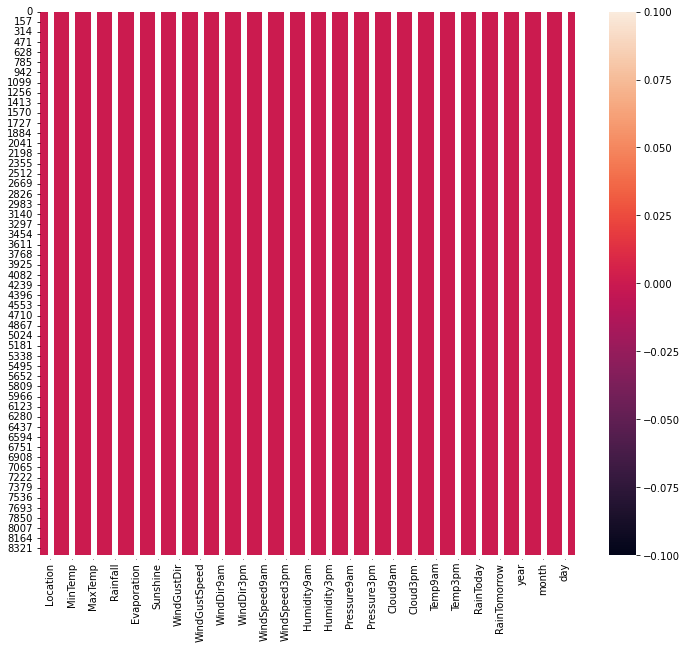

In [301]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),annot=True)

The missing values have been resolved.

Now I will convert categorical variables to numerical variables.

# Encoding

In [134]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [135]:
categorical_variables

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
8420,Uluru,E,SE,ENE,No,No
8421,Uluru,NNW,SE,N,No,No
8422,Uluru,N,SE,WNW,No,No
8423,Uluru,SE,SSE,N,No,No


Location , WindGustDir , WindDir9am , WindDir3pm will tune into numerical variables by using Ordinal Encoder.

In [136]:
from sklearn.preprocessing import OrdinalEncoder

In [137]:
ordinal_encoder = OrdinalEncoder()

In [138]:
df[['Location']] = ordinal_encoder.fit_transform(df[['Location']])

df[['WindGustDir']] = ordinal_encoder.fit_transform(df[['WindGustDir']])

df[['WindDir9am']] = ordinal_encoder.fit_transform(df[['WindDir9am']])

df[['WindDir3pm']] = ordinal_encoder.fit_transform(df[['WindDir3pm']])

In [139]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1.0,13.4,22.9,0.6,5.389395,7.632205,13.0,44.0,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,1.0,7.4,25.1,0.0,5.389395,7.632205,14.0,44.0,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,1.0,12.9,25.7,0.0,5.389395,7.632205,15.0,46.0,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,1.0,9.2,28.0,0.0,5.389395,7.632205,4.0,24.0,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,1.0,17.5,32.3,1.0,5.389395,7.632205,13.0,41.0,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


RainToday and RainTomorrow will use label Encoder to convert into numerical variables.

In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
le = LabelEncoder()

In [142]:
df['RainToday'] = le.fit_transform(df['RainToday'])

df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [143]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1.0,13.4,22.9,0.6,5.389395,7.632205,13.0,44.0,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1.0,7.4,25.1,0.0,5.389395,7.632205,14.0,44.0,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1.0,12.9,25.7,0.0,5.389395,7.632205,15.0,46.0,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1.0,9.2,28.0,0.0,5.389395,7.632205,4.0,24.0,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1.0,17.5,32.3,1.0,5.389395,7.632205,13.0,41.0,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


# Correlation Matrix

In [144]:
df_corr = df.corr()

df_corr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
Location,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,-0.027736,...,-0.020574,0.038019,0.017561,0.118051,0.060570,0.018656,0.017806,0.486405,-0.082407,-0.002019
MinTemp,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,...,-0.422991,0.091604,0.038414,0.887119,0.685520,0.077980,0.107589,0.044123,-0.245854,0.009446
MaxTemp,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,-0.180622,...,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.213605,-0.140895,0.119772,-0.163253,0.015608
Rainfall,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,0.038560,...,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.443944,0.212599,0.006435,-0.012244,-0.013760
Evaporation,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,-0.047952,...,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.095767,-0.064303,0.152708,0.004362,0.013597
Sunshine,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,-0.068553,...,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.243335,-0.339198,0.065374,-0.006694,0.004662
WindGustDir,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,0.505799,...,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.134416,0.054887,-0.088340,0.034823,0.015683
WindGustSpeed,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,0.071235,...,-0.372651,0.023313,0.078631,0.202298,0.102199,0.095121,0.202065,-0.042402,0.051968,-0.002876
WindDir9am,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,0.249527,...,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.156912,0.037043,-0.014498,0.012544,-0.015154
WindDir3pm,-0.027736,-0.147166,-0.180622,0.038560,-0.047952,-0.068553,0.505799,0.071235,0.249527,1.000000,...,-0.043681,0.075453,0.053986,-0.165072,-0.194463,0.099465,0.011400,-0.005812,0.029384,0.003089


<AxesSubplot:>

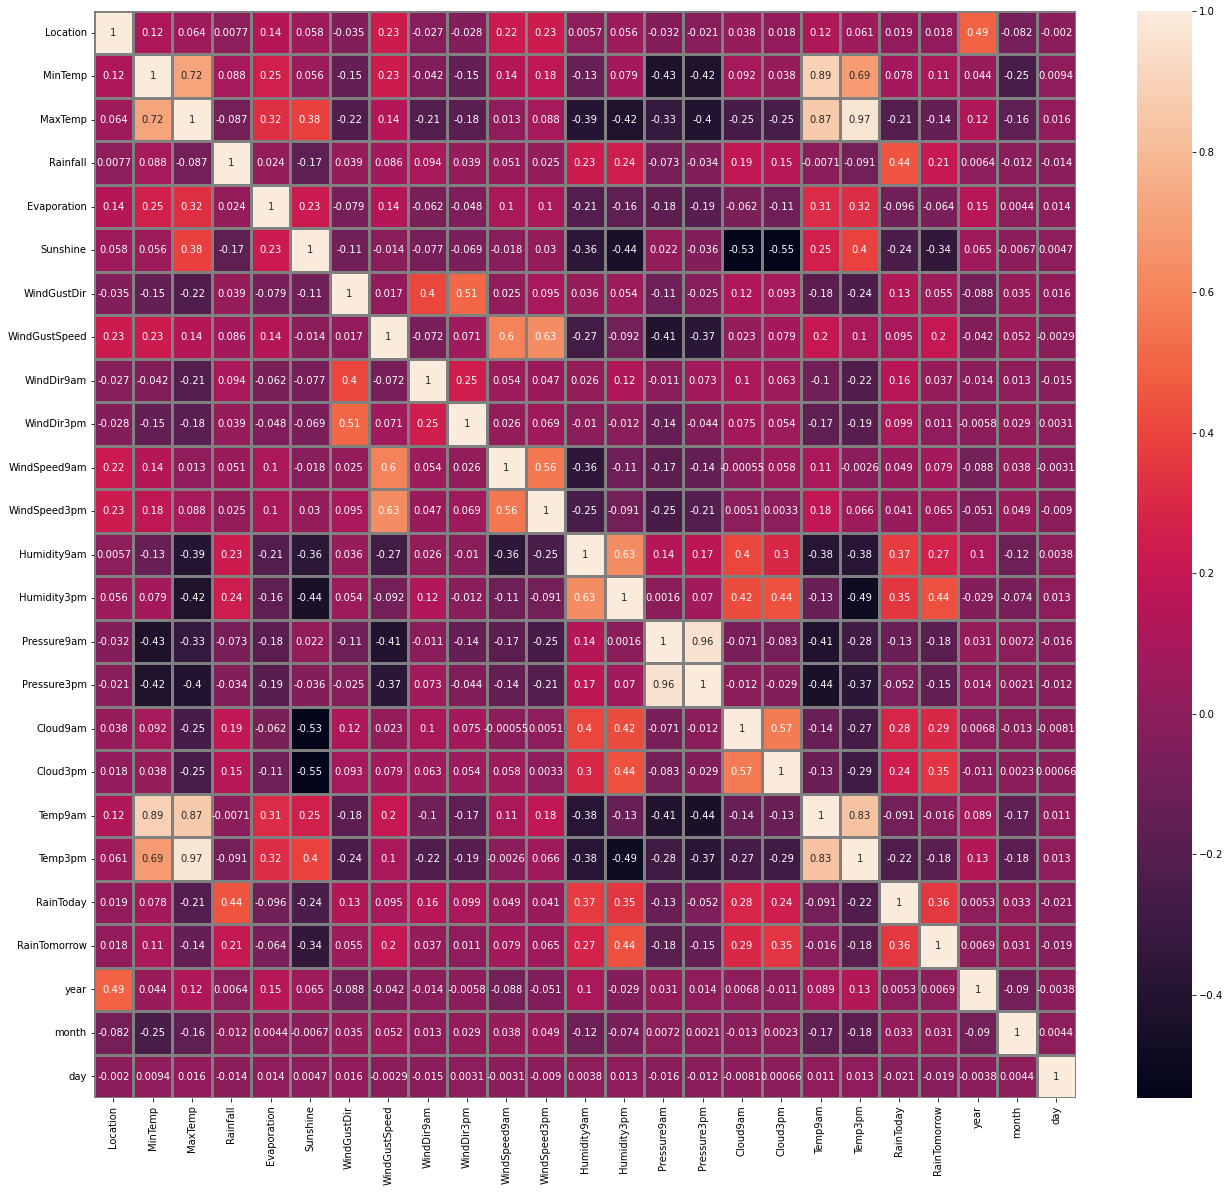

In [145]:
plt.figure(figsize=(22,20))
sns.heatmap(df_corr,annot=True,linecolor='grey',linewidths=3)

Correlation Bar using Target variable with Features

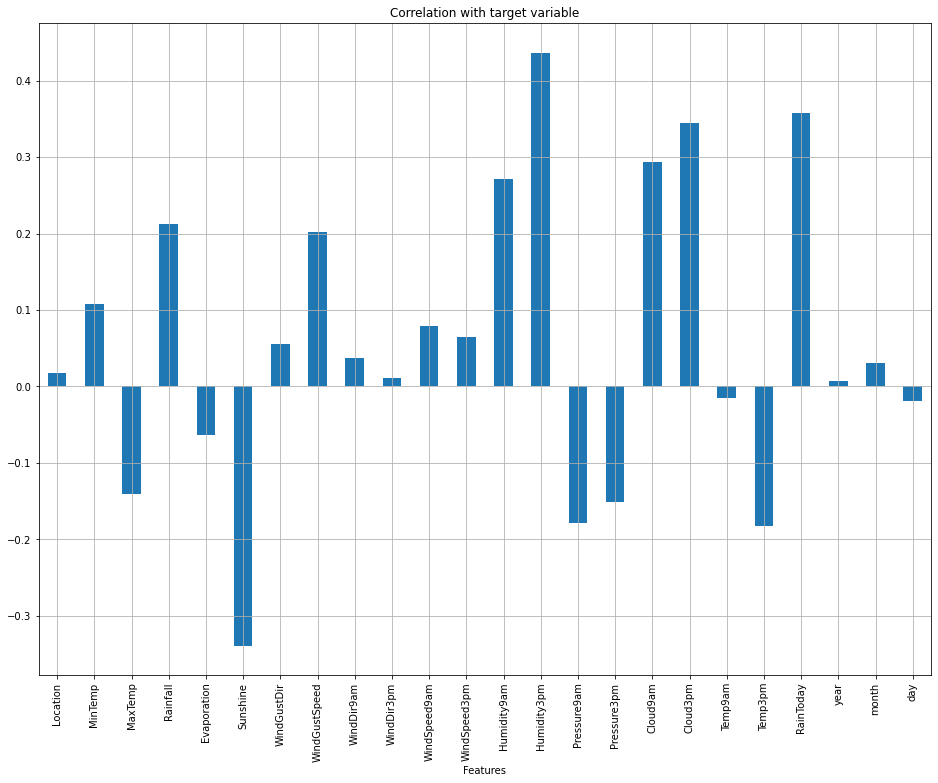

In [146]:
plt.figure(figsize=(16,12))
df.drop('RainTomorrow',axis=1).corrwith(df['RainTomorrow']).plot(kind='bar',grid=True)
plt.title('Correlation with target variable');
plt.xlabel("Features");

# Cheking for outliers

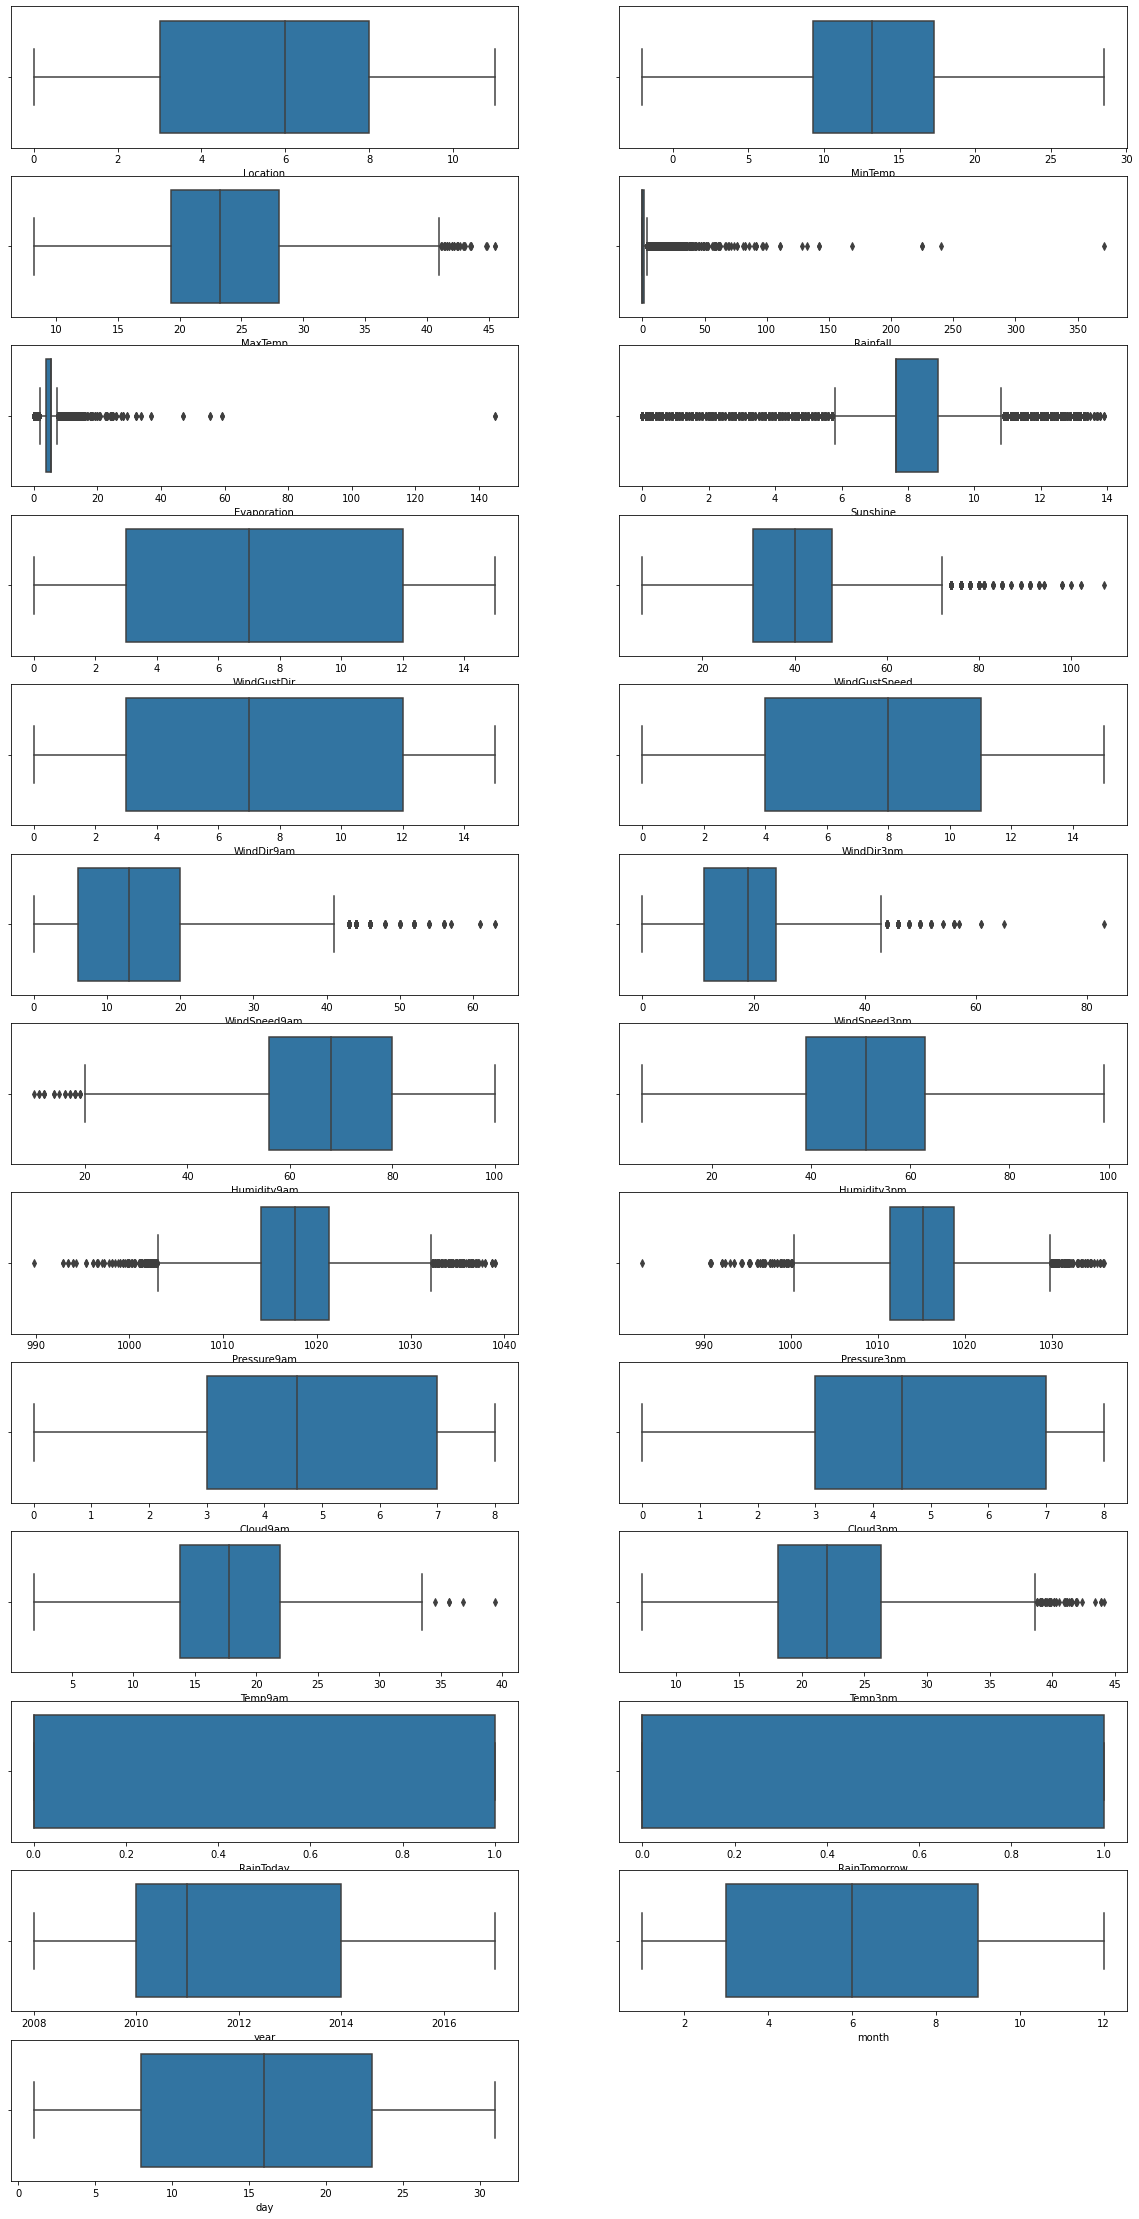

In [147]:
#Plotting Box Plot
plt.figure(figsize=(20,40))
plot = 1
for i in df:
    if plot < 26:
        ax = plt.subplot(13,2,plot)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plot += 1
plt.show()

# Zscore

In [148]:
from scipy.stats import zscore

In [149]:
z = np.abs(zscore(df))
z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1.515776,0.038425,1.570089e-01,0.213986,2.305893e-16,1.257472e-15,1.229643,0.277710,1.249535,1.397222,...,1.308665,1.413459,3.862851e-16,0.153712,0.108138,0.599973,0.599973,1.658896,1.616696,1.677733
1,1.515776,1.076989,2.028121e-01,0.272189,2.305893e-16,1.257472e-15,1.442303,0.277710,0.276260,1.622961,...,1.196072,0.000000,3.862851e-16,0.100217,0.312348,0.599973,0.599973,1.658896,1.616696,1.563926
2,1.515776,0.054526,3.009450e-01,0.272189,2.305893e-16,1.257472e-15,1.654964,0.422897,1.249535,1.622961,...,1.051309,0.000000,1.088680e+00,0.577390,0.127334,0.599973,0.599973,1.658896,1.616696,1.450120
3,1.515776,0.742365,6.771214e-01,0.272189,2.305893e-16,1.257472e-15,0.684299,1.174166,0.377652,1.763120,...,0.391836,0.000000,3.862851e-16,0.060269,0.682376,0.599973,0.599973,1.658896,1.616696,1.336313
4,1.515776,0.800625,1.380408e+00,0.175183,2.305893e-16,1.257472e-15,1.229643,0.059928,1.366114,0.182949,...,1.485596,1.001777,1.520830e+00,0.006773,1.220599,0.599973,0.599973,1.658896,1.616696,1.222506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.013895,1.932140,7.523137e-02,0.272189,2.305893e-16,1.257472e-15,1.534940,0.666009,0.377652,1.537381,...,0.814518,0.000000,3.862851e-16,1.366273,0.007221,0.599973,0.599973,1.980423,0.128611,0.598400
8421,1.013895,1.783418,2.355231e-01,0.272189,2.305893e-16,1.257472e-15,0.258979,1.319354,0.377652,1.085904,...,0.621501,0.000000,3.862851e-16,1.223619,0.345987,0.599973,0.599973,1.980423,0.128611,0.712207
8422,1.013895,1.448794,4.972110e-01,0.272189,2.305893e-16,1.257472e-15,0.896959,0.230447,0.377652,1.397222,...,0.251553,0.000000,3.862851e-16,0.938310,0.615099,0.599973,0.599973,1.980423,0.128611,0.826013
8423,1.013895,1.002628,5.135665e-01,0.272189,2.305893e-16,1.257472e-15,0.379002,0.883791,0.595623,1.085904,...,0.203299,0.644950,1.088680e+00,0.474684,0.598279,0.599973,0.599973,1.980423,0.128611,0.939820


In [150]:
threshold = 3
df1 = df[(z<3).all(axis=1)]
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1.0,13.4,22.900000,0.6,5.389395,7.632205,13.0,44.000000,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1.0,7.4,25.100000,0.0,5.389395,7.632205,14.0,44.000000,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1.0,12.9,25.700000,0.0,5.389395,7.632205,15.0,46.000000,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1.0,9.2,28.000000,0.0,5.389395,7.632205,4.0,24.000000,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1.0,17.5,32.300000,1.0,5.389395,7.632205,13.0,41.000000,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,0.0,5.389395,7.632205,0.0,31.000000,9.0,1.0,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,2017,6,21
8421,9.0,3.6,25.300000,0.0,5.389395,7.632205,6.0,22.000000,9.0,3.0,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,2017,6,22
8422,9.0,5.4,26.900000,0.0,5.389395,7.632205,3.0,37.000000,9.0,14.0,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,2017,6,23
8423,9.0,7.8,27.000000,0.0,5.389395,7.632205,9.0,28.000000,10.0,3.0,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,2017,6,24


In [151]:
print(df.shape)# shape of the original data 
print(df1.shape)# shape of the data after using zscore to remove outliers

(8425, 25)
(7987, 25)


In [152]:
df = df1.copy()# reassigning the changed dataframe name to our original dataframe name

df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1.0,13.4,22.900000,0.6,5.389395,7.632205,13.0,44.000000,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1.0,7.4,25.100000,0.0,5.389395,7.632205,14.0,44.000000,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1.0,12.9,25.700000,0.0,5.389395,7.632205,15.0,46.000000,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1.0,9.2,28.000000,0.0,5.389395,7.632205,4.0,24.000000,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1.0,17.5,32.300000,1.0,5.389395,7.632205,13.0,41.000000,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,0.0,5.389395,7.632205,0.0,31.000000,9.0,1.0,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,2017,6,21
8421,9.0,3.6,25.300000,0.0,5.389395,7.632205,6.0,22.000000,9.0,3.0,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,2017,6,22
8422,9.0,5.4,26.900000,0.0,5.389395,7.632205,3.0,37.000000,9.0,14.0,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,2017,6,23
8423,9.0,7.8,27.000000,0.0,5.389395,7.632205,9.0,28.000000,10.0,3.0,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,2017,6,24


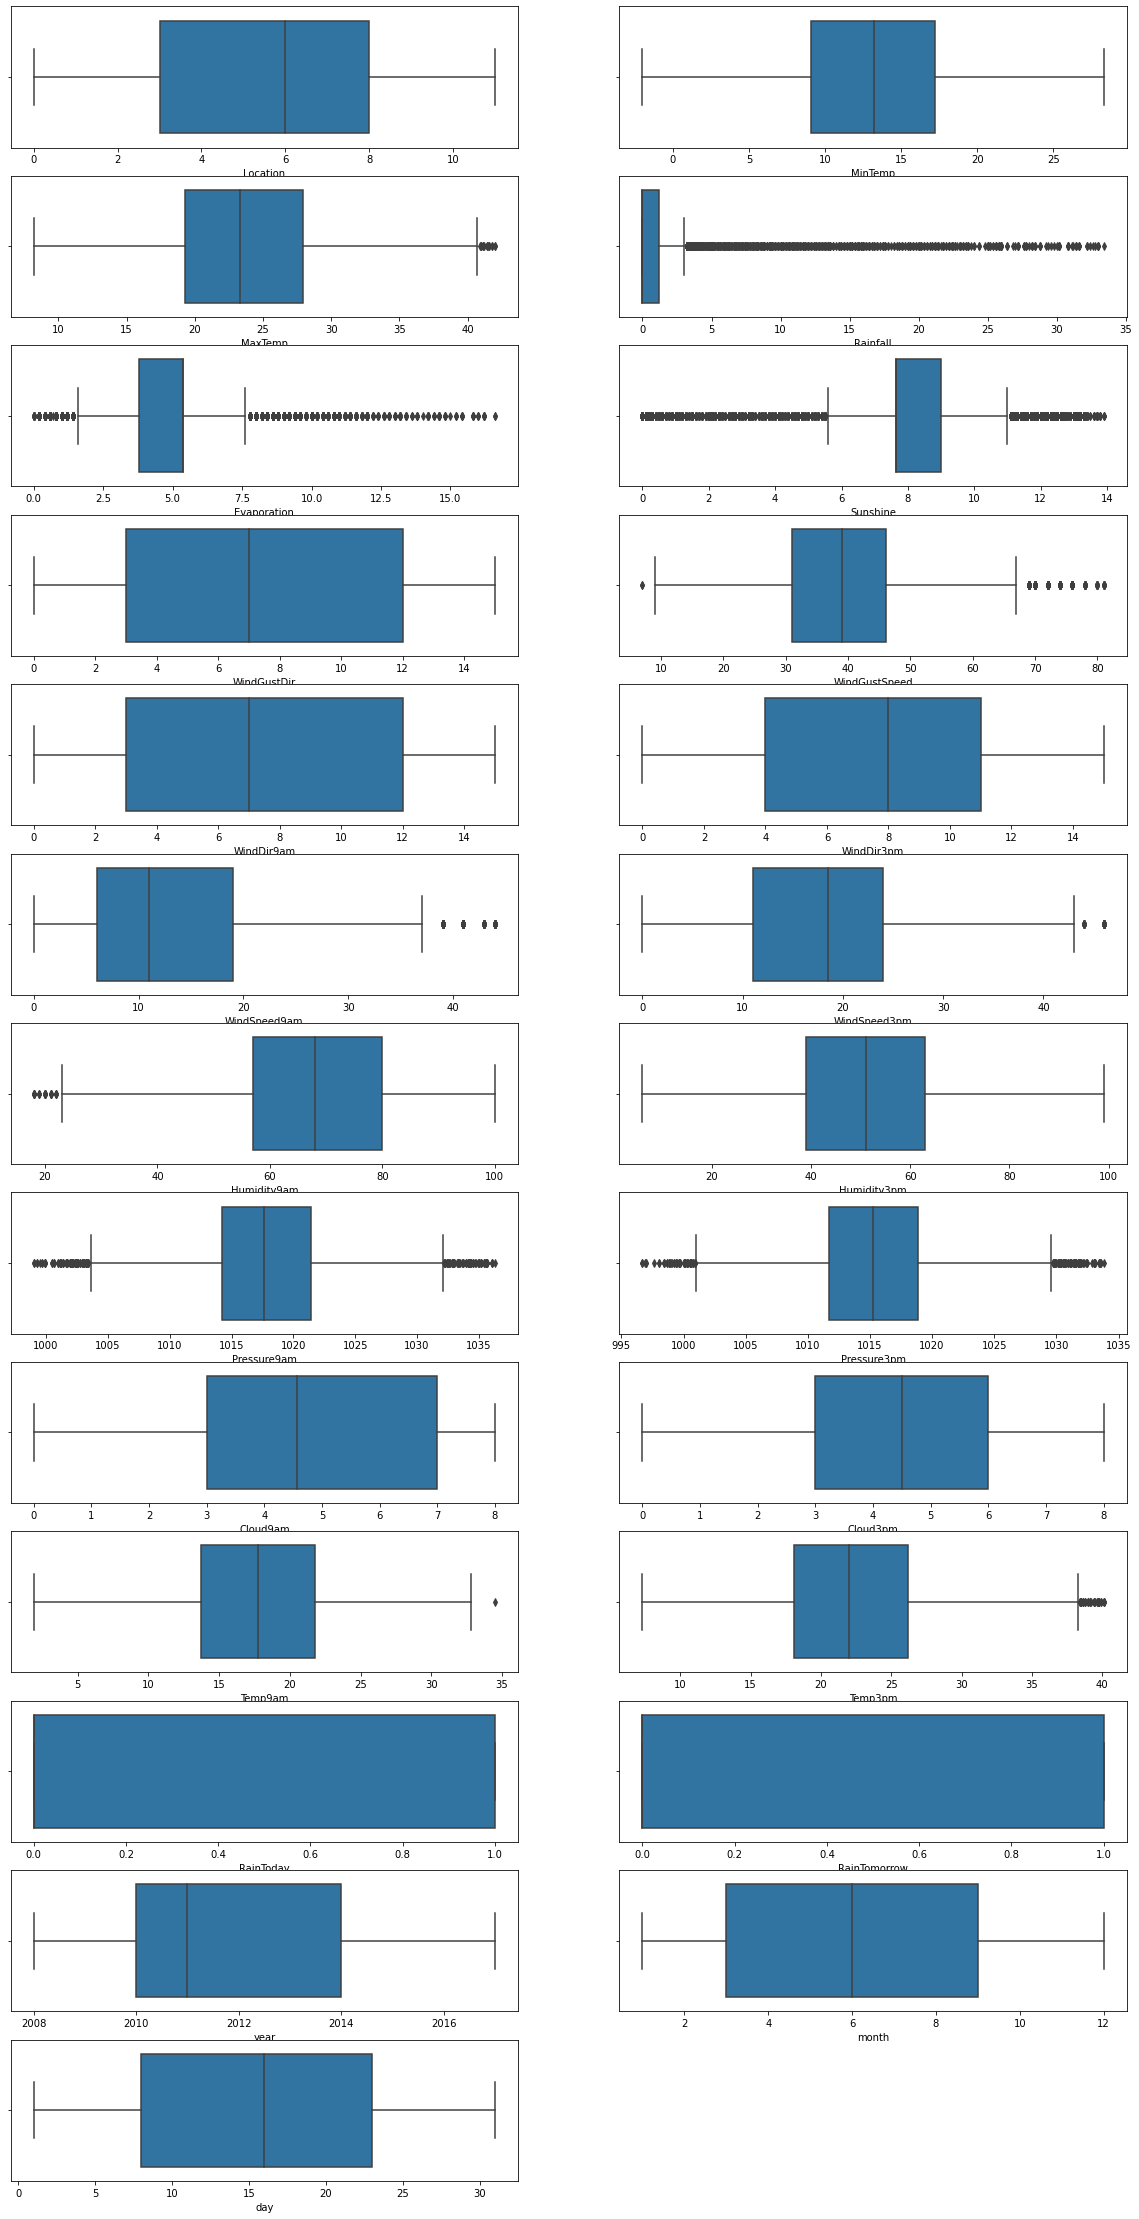

In [153]:
#Plotting Box Plot
plt.figure(figsize=(20,40))
plot = 1
for i in df:
    if plot < 26:
        ax = plt.subplot(13,2,plot)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plot += 1
plt.show()

In [154]:
df.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.115889
RainTomorrow     1.115889
year             0.430100
month            0.054460
day              0.002731
dtype: float64

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [155]:
X = df.drop(['RainTomorrow'],axis=1)
Y = df['RainTomorrow']

In [156]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
0,1.0,13.4,22.9,0.6,5.389395,7.632205,13.0,44.0,13.0,14.0,...,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,2008,12,1
1,1.0,7.4,25.1,0.0,5.389395,7.632205,14.0,44.0,6.0,15.0,...,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,2008,12,2
2,1.0,12.9,25.7,0.0,5.389395,7.632205,15.0,46.0,13.0,15.0,...,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,2008,12,3
3,1.0,9.2,28.0,0.0,5.389395,7.632205,4.0,24.0,9.0,0.0,...,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,2008,12,4
4,1.0,17.5,32.3,1.0,5.389395,7.632205,13.0,41.0,1.0,7.0,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,2008,12,5


In [157]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int32

# PowerTransformer

In [158]:
from sklearn.preprocessing import PowerTransformer

In [159]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
0,-1.568421,0.060502,-0.075727,0.617396,0.186311,-0.097439,1.160422,0.433926,1.180892,1.354048,...,-1.692943,-1.405096,1.461692,-0.000987,-0.134269,-0.027061,-0.58723,-2.433609e-13,1.524023,-1.885612
1,-1.568421,-1.057253,0.287145,-0.693670,0.186311,-0.097439,1.320123,0.433926,-0.145662,1.558466,...,-1.203853,-1.284708,-0.013271,-0.000987,-0.080445,0.392529,-0.58723,-2.433609e-13,1.524023,-1.703131
2,-1.568421,-0.032222,0.383000,-0.693670,0.186311,-0.097439,1.475632,0.579399,1.180892,1.558466,...,-1.709835,-1.130218,-0.013271,-1.082152,0.599608,0.210969,-0.58723,-2.433609e-13,1.524023,-1.536664
3,-1.568421,-0.720632,0.739293,-0.693670,0.186311,-0.097439,-0.579731,-1.257142,0.469967,-1.875412,...,-0.029358,-0.430600,-0.013271,-0.000987,0.080903,0.742575,-0.58723,-2.433609e-13,1.524023,-1.381174
4,-1.568421,0.818594,1.363746,0.975076,0.186311,-0.097439,1.160422,0.209370,-1.524916,-0.141138,...,-1.170177,-1.594683,1.025084,1.559044,0.027141,1.224291,-0.58723,-2.433609e-13,1.524023,-1.233906


# Feature Scaling

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X_scaled.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
0,-1.568421,0.060502,-0.075727,0.617396,0.186311,-0.097439,1.160422,0.433926,1.180892,1.354048,...,-1.692943,-1.405096,1.461692,-0.000987,-0.134269,-0.027061,-0.58723,-1.667577,1.524023,-1.885612
1,-1.568421,-1.057253,0.287145,-0.693670,0.186311,-0.097439,1.320123,0.433926,-0.145662,1.558466,...,-1.203853,-1.284708,-0.013271,-0.000987,-0.080445,0.392529,-0.58723,-1.667577,1.524023,-1.703131
2,-1.568421,-0.032222,0.383000,-0.693670,0.186311,-0.097439,1.475632,0.579399,1.180892,1.558466,...,-1.709835,-1.130218,-0.013271,-1.082152,0.599608,0.210969,-0.58723,-1.667577,1.524023,-1.536664
3,-1.568421,-0.720632,0.739293,-0.693670,0.186311,-0.097439,-0.579731,-1.257142,0.469967,-1.875412,...,-0.029358,-0.430600,-0.013271,-0.000987,0.080903,0.742575,-0.58723,-1.667577,1.524023,-1.381174
4,-1.568421,0.818594,1.363746,0.975076,0.186311,-0.097439,1.160422,0.209370,-1.524916,-0.141138,...,-1.170177,-1.594683,1.025084,1.559044,0.027141,1.224291,-0.58723,-1.667577,1.524023,-1.233906


# VIF   

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,1.579906,Location
1,8.872877,MinTemp
2,26.878954,MaxTemp
3,9.788987,Rainfall
4,1.565808,Evaporation
5,2.050021,Sunshine
6,1.616812,WindGustDir
7,2.221543,WindGustSpeed
8,1.348278,WindDir9am
9,1.483602,WindDir3pm


I will drop Temp3pm,Temp9am,Pressure9am because there are multicollinear with each other.

In [162]:
#Dropping Pressure9am ,Temp9am,Temp3pm
X_scaled.drop(['Pressure9am','Temp9am','Temp3pm'],axis=1,inplace=True)    

In [163]:
X_scaled.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'year', 'month',
       'day'],
      dtype='object')

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X_scaled.columns
vif

,vif,features
0,1.576575,Location
1,4.772671,MinTemp
2,5.623667,MaxTemp
3,9.754118,Rainfall
4,1.541589,Evaporation
5,2.031922,Sunshine
6,1.600832,WindGustDir
7,2.152621,WindGustSpeed
8,1.323709,WindDir9am
9,1.416346,WindDir3pm


# Converting an Imbalanced Dataset into a Balanced Dataset

0    5939
1    2048
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

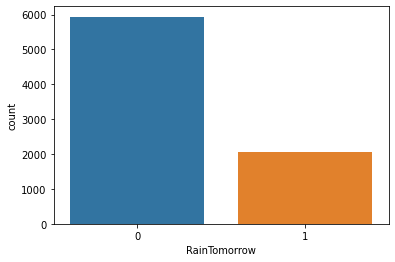

In [165]:
print(Y.value_counts())
sns.countplot(Y)

In [166]:
from imblearn.over_sampling import SMOTE

# adding samples to make all the categorical quality values same
oversample = SMOTE()
X_scaled, Y = oversample.fit_resample(X_scaled, Y)

0    5939
1    5939
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

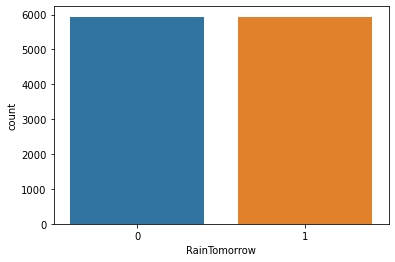

In [167]:
print(Y.value_counts())
sns.countplot(Y)

# Model building

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score,KFold,StratifiedShuffleSplit

In [169]:
X_scaled

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,year,month,day
0,-1.568421,0.060502,-0.075727,0.617396,0.186311,-0.097439,1.160422,0.433926,1.180892,1.354048,...,0.670390,0.152197,-1.678848,-1.405096,1.461692,-0.000987,-0.58723,-1.667577,1.524023,-1.885612
1,-1.568421,-1.057253,0.287145,-0.693670,0.186311,-0.097439,1.320123,0.433926,-0.145662,1.558466,...,0.472699,-1.429214,-1.491664,-1.284708,-0.013271,-0.000987,-0.58723,-1.667577,1.524023,-1.703131
2,-1.568421,-0.032222,0.383000,-0.693670,0.186311,-0.097439,1.475632,0.579399,1.180892,1.558466,...,0.863753,-1.749610,-1.187424,-1.130218,-0.013271,-1.082152,-0.58723,-1.667577,1.524023,-1.536664
3,-1.568421,-0.720632,0.739293,-0.693670,0.186311,-0.097439,-0.579731,-1.257142,0.469967,-1.875412,...,-0.966158,-1.374578,-2.066341,-0.430600,-0.013271,-0.000987,-0.58723,-1.667577,1.524023,-1.381174
4,-1.568421,0.818594,1.363746,0.975076,0.186311,-0.097439,1.160422,0.209370,-1.524916,-0.141138,...,0.270193,0.851199,-1.008868,-1.594683,1.025084,1.559044,-0.58723,-1.667577,1.524023,-1.233906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11873,-1.195851,1.303438,0.752514,1.719324,0.206903,-1.526231,-0.064525,-0.528513,-0.133420,0.142312,...,-1.805481,0.396070,1.447855,-0.225813,0.408470,0.786313,1.70291,-0.323761,-1.452879,0.081656
11874,-0.230716,1.448912,0.670991,1.827470,-0.847112,-0.440674,-0.667137,2.240394,1.395406,0.435202,...,-0.820701,1.111187,0.914210,-1.960722,1.350294,-0.050587,1.70291,-0.385607,-1.641015,-0.217522
11875,1.583924,0.180905,-0.937167,-0.255311,0.186311,-0.097439,0.927048,2.163389,0.896087,0.081075,...,1.947431,-0.060320,1.731986,0.512874,0.968534,1.559044,-0.58723,-1.256706,-0.356347,0.566377
11876,-1.195851,1.418864,0.964279,1.804685,-0.285160,-1.216262,-1.838176,-0.954608,-0.981031,-1.875412,...,-1.322309,1.145295,1.323046,-0.351196,1.025084,1.108399,1.70291,-0.029801,-0.952165,-1.231759


In [170]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
11873    1
11874    1
11875    1
11876    1
11877    1
Name: RainTomorrow, Length: 11878, dtype: int32

# 1}Logistic Regression

In [171]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    accuracy_lr = accuracy_score(y_test, y_lr)
    
    if accuracy_lr>maxAccuracy:
        maxAccuracy=accuracy_lr
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.7882154882154883  on Random State 47


In [172]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=47)

#training our model
lr=LogisticRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_lr)

#Accuracy Score
print("Accuracy score : ", accuracy_lr*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_lr))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_lr))

Accuracy score :  78.82154882154883
---------------------------------------------
[0.68097643 0.63089226 0.63930976 0.75663158 0.82989474]
Cross Validation Score :  70.75409533935849
---------------------------------------------
[[1204  292]
 [ 337 1137]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1496
           1       0.80      0.77      0.78      1474

    accuracy                           0.79      2970
   macro avg       0.79      0.79      0.79      2970
weighted avg       0.79      0.79      0.79      2970



In [173]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , l1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.63341751 0.5702862  0.76388889 0.77221053 0.66821053]
--------------------------------------------------
K-Fold Cross Validation Score :  68.16027290448343


In [174]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
s1 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(s1)
print('--'*50)
print("Stratified Shuffle Split : ",s1.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.77676768 0.77239057 0.77609428 0.78484848 0.77811448]
----------------------------------------------------------------------------------------------------
Stratified Shuffle Split :  77.76430976430977


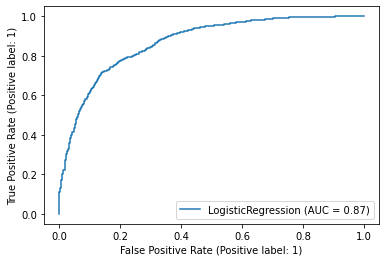

In [175]:
#Roc Curve
plot_roc_curve(lr,x_test,y_test)

In [176]:
print(lr.score(x_train,y_train)*100)#Training Score
print(lr.score(x_test,y_test)*100)#Testing Score

77.26762460709475
78.82154882154883


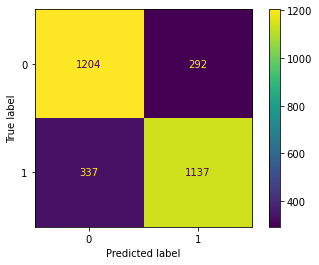

In [177]:
#Plot Confusion Matrix
plot_confusion_matrix(lr,x_test,y_test)

# 2}Decision Tree

In [178]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    accuracy_dt = accuracy_score(y_test, y_dt)
    
    if accuracy_dt>maxAccuracy:
        maxAccuracy=accuracy_dt
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8838383838383839  on Random State 62


In [179]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=62)

#training our model
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt)

#Accuracy Score
print("Accuracy score : ", accuracy_dt*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_dt))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_dt))

Accuracy score :  87.8114478114478
---------------------------------------------
[0.54545455 0.56397306 0.84048822 0.79494737 0.76042105]
Cross Validation Score :  70.10568491936914
---------------------------------------------
[[1281  181]
 [ 181 1327]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1462
           1       0.88      0.88      0.88      1508

    accuracy                           0.88      2970
   macro avg       0.88      0.88      0.88      2970
weighted avg       0.88      0.88      0.88      2970



In [180]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
d1 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(d1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , d1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.37878788 0.50799663 0.76683502 0.85515789 0.86442105]
--------------------------------------------------
K-Fold Cross Validation Score :  67.46396951975899


In [181]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
d1 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(d1)
print('--'*30)
print("Stratified Shuffle Split : ",d1.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.76969697 0.77508418 0.77508418 0.77239057 0.78080808]
------------------------------------------------------------
Stratified Shuffle Split :  77.46127946127947


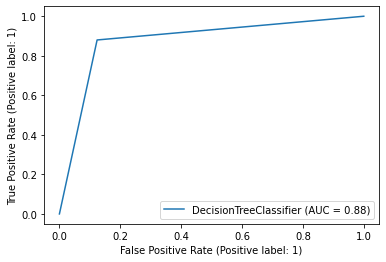

In [182]:
#Roc Curve
plot_roc_curve(dt,x_test,y_test)

In [183]:
print(dt.score(x_train,y_train)*100)#Training Score
print(dt.score(x_test,y_test)*100)#Testing Score

100.0
87.8114478114478


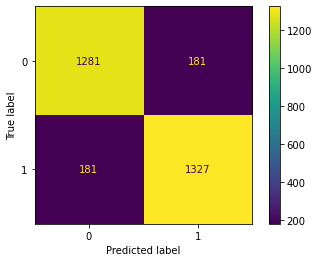

In [184]:
#Plot Confusion Matrix
plot_confusion_matrix(dt,x_test,y_test)

# 3}KNN

In [185]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    accuracy_knn = accuracy_score(y_test, y_knn)
    
    if accuracy_knn>maxAccuracy:
        maxAccuracy=accuracy_knn
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.87003367003367  on Random State 8


In [186]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=8)

#training our model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_knn)

#Accuracy Score
print("Accuracy score : ", accuracy_knn*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_knn))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_knn))

Accuracy score :  87.003367003367
---------------------------------------------
[0.66624579 0.61026936 0.7483165  0.77726316 0.78273684]
Cross Validation Score :  71.69663299663299
---------------------------------------------
[[1135  305]
 [  81 1449]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1440
           1       0.83      0.95      0.88      1530

    accuracy                           0.87      2970
   macro avg       0.88      0.87      0.87      2970
weighted avg       0.88      0.87      0.87      2970



In [187]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
k1 = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , k1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.45538721 0.53956229 0.70622896 0.90147368 0.94273684]
--------------------------------------------------
K-Fold Cross Validation Score :  70.90777954988481


In [188]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
k2 = cross_val_score(knn,X_scaled,Y,cv=Stratified_Shuffle)
print(k2)
print("--------------------------------------------------")
print("Shuffle Split : ",k2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.85117845 0.85117845 0.84781145 0.84814815 0.84343434]
--------------------------------------------------
Shuffle Split :  84.83501683501682


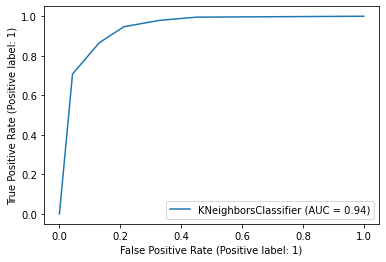

In [189]:
#Plot Roc Curve
plot_roc_curve(knn,x_test,y_test)

In [190]:
print(knn.score(x_train,y_train)*100)#Training Score
print(knn.score(x_test,y_test)*100)#Testing Score

89.90794791198923
87.003367003367


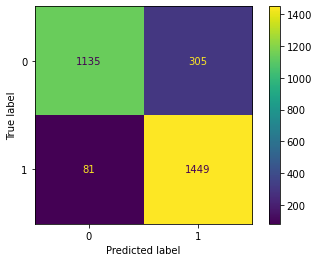

In [191]:
#Plot Confusion Matrix
plot_confusion_matrix(knn,x_test,y_test)

# 4}Support Vector Machine

In [192]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    y_svc = svc.predict(x_test)
    accuracy_svc = accuracy_score(y_test, y_svc)
    
    if accuracy_svc>maxAccuracy:
        maxAccuracy=accuracy_svc
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8629629629629629  on Random State 36


In [193]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=36)

#training our model
svc=SVC()
svc.fit(x_train, y_train)

#Predicting y_test
y_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_svc)

#Accuracy Score
print("Accuracy score : ", accuracy_svc*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_svc = cross_val_score(svc,X_scaled,Y,cv=5)
print(cross_val_svc)
print("Cross Validation Score : ",cross_val_svc.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_svc))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_svc))

Accuracy score :  86.29629629629629
---------------------------------------------
[0.66498316 0.59385522 0.71801347 0.78021053 0.82947368]
Cross Validation Score :  71.73072124756337
---------------------------------------------
[[1254  230]
 [ 177 1309]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1484
           1       0.85      0.88      0.87      1486

    accuracy                           0.86      2970
   macro avg       0.86      0.86      0.86      2970
weighted avg       0.86      0.86      0.86      2970



In [194]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
s1 = cross_val_score(svc,X_scaled,Y,cv=K_fold)
print(s1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , s1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.53745791 0.57744108 0.78030303 0.85178947 0.80210526]
--------------------------------------------------
K-Fold Cross Validation Score :  0.709819351408825


In [195]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle)
s2 = cross_val_score(svc,X_scaled,Y,cv=Stratified_Shuffle)
print(s2)
print("--------------------------------------------------")
print("Shuffle Split : ",s2.mean())

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)
[0.86111111 0.8526936  0.83754209 0.85521886 0.8459596 ]
--------------------------------------------------
Shuffle Split :  0.8505050505050505


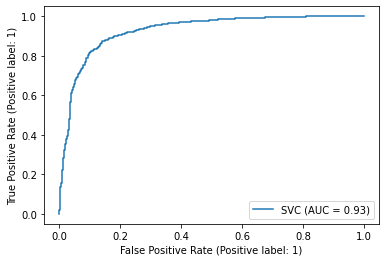

In [196]:
#Plot Roc Curve
plot_roc_curve(svc,x_test,y_test)

In [197]:
print(svc.score(x_train,y_train)*100)#Training Score
print(svc.score(x_test,y_test)*100)#Testing Score

87.59541984732824
86.29629629629629


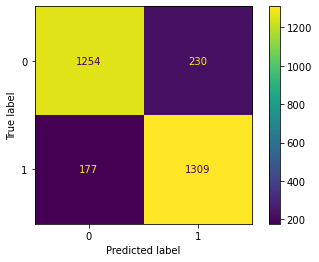

In [198]:
#plot confusion matrix
plot_confusion_matrix(svc,x_test,y_test)

# 5}Random Forest

In [199]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    accuracy_rf= accuracy_score(y_test, y_rf)
    
    if accuracy_rf>maxAccuracy:
        maxAccuracy=accuracy_rf
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.9383838383838384  on Random State 95


In [200]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=95)

#training our model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_rf)

#Accuracy Score
print("Accuracy score : ", accuracy_rf*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_rf))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_rf))

Accuracy score :  93.67003367003367
---------------------------------------------
[0.61363636 0.61616162 0.85732323 0.84421053 0.86105263]
Cross Validation Score :  75.84768740031897
---------------------------------------------
[[1410  112]
 [  76 1372]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1522
           1       0.92      0.95      0.94      1448

    accuracy                           0.94      2970
   macro avg       0.94      0.94      0.94      2970
weighted avg       0.94      0.94      0.94      2970



In [201]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
r1 = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , r1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.53872054 0.49242424 0.80808081 0.936      0.95115789]
--------------------------------------------------
K-Fold Cross Validation Score :  0.7452766967924862


In [202]:
# Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
r2 = cross_val_score(rf,X_scaled,Y,cv=Stratified_Shuffle)
print(r2)
print("--------------------------------------------------")
print("Shuffle Split : ",r2.mean())

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.92794613 0.92727273 0.92255892 0.92491582 0.92121212]
--------------------------------------------------
Shuffle Split :  0.9247811447811447


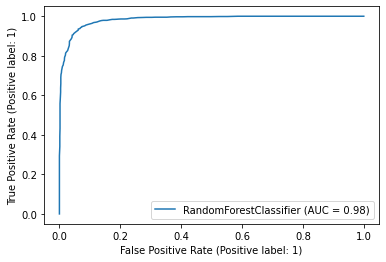

In [203]:
#Plot Roc curve
plot_roc_curve(rf,x_test,y_test)

In [204]:
print(rf.score(x_train,y_train)*100)#Training Score
print(rf.score(x_test,y_test)*100)#Testing Score

100.0
93.67003367003367


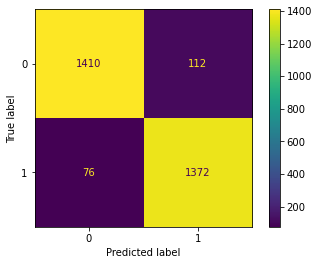

In [205]:
#Plot Confusion Matrix
plot_confusion_matrix(rf,x_test,y_test)

# 6}Ada Boost Classifier

In [206]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    y_ad = ad.predict(x_test)
    accuracy_ad = accuracy_score(y_test, y_ad)
    
    if accuracy_ad>maxAccuracy:
        maxAccuracy=accuracy_ad
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8249158249158249  on Random State 78


In [207]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=78)

#training our model
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)

#Predicting y_test
y_ad = ad.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_ad)

#Accuracy Score
print("Accuracy score : ", accuracy_ad*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_ad = cross_val_score(ad,X_scaled,Y,cv=5)
print(cross_val_ad)
print("Cross Validation Score : ",cross_val_ad.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_ad))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_ad))

Accuracy score :  82.49158249158249
---------------------------------------------
[0.6456229  0.48695286 0.65572391 0.70357895 0.77178947]
Cross Validation Score :  65.27336168704589
---------------------------------------------
[[1219  266]
 [ 254 1231]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1485
           1       0.82      0.83      0.83      1485

    accuracy                           0.82      2970
   macro avg       0.82      0.82      0.82      2970
weighted avg       0.82      0.82      0.82      2970



In [208]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
a1 = cross_val_score(ad,X_scaled,Y,cv=K_fold)
print(a1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , a1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.45791246 0.4503367  0.66498316 0.81178947 0.76294737]
--------------------------------------------------
K-Fold Cross Validation Score :  62.959383306751725


In [209]:
# Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
a2 = cross_val_score(ad,X_scaled,Y,cv=Stratified_Shuffle)
print(a2)
print("--------------------------------------------------")
print("Shuffle Split : ",a2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.81279461 0.81212121 0.81279461 0.81144781 0.79393939]
--------------------------------------------------
Shuffle Split :  80.86195286195286


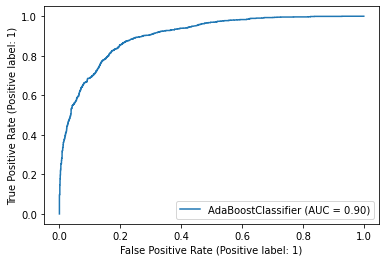

In [210]:
#plot roc curve
plot_roc_curve(ad,x_test,y_test)

In [211]:
print(ad.score(x_train,y_train)*100)#Training Score
print(ad.score(x_test,y_test)*100)#Testing Score

81.2528064660979
82.49158249158249


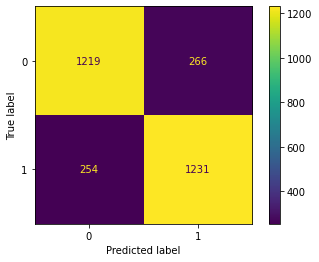

In [212]:
#Plot confusion matrix
plot_confusion_matrix(ad,x_test,y_test)

# 7}Gradient Boost

In [213]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    gb=GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    accuracy = accuracy_score(y_test, y_gb)
    
    if accuracy>maxAccuracy:
        maxAccuracy=accuracy
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8676767676767677  on Random State 78


In [214]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=78)

#training our model
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_gb)

#Accuracy Score
print("Accuracy score : ", accuracy_gb*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_val_gb)
print("Cross Validation Score : ",cross_val_gb.mean()*100)

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_gb))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_gb))

Accuracy score :  86.76767676767678
---------------------------------------------
[0.62752525 0.48190236 0.71548822 0.71452632 0.74315789]
Cross Validation Score :  65.6520007088428
---------------------------------------------
[[1279  206]
 [ 187 1298]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1485
           1       0.86      0.87      0.87      1485

    accuracy                           0.87      2970
   macro avg       0.87      0.87      0.87      2970
weighted avg       0.87      0.87      0.87      2970



In [215]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
g1 = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , g1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.51388889 0.46675084 0.72306397 0.87957895 0.83705263]
--------------------------------------------------
K-Fold Cross Validation Score :  68.40670565302143


In [216]:
#Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
g2 = cross_val_score(gb,X_scaled,Y,cv=Stratified_Shuffle)
print(g2)
print("--------------------------------------------------")
print("Shuffle Split : ",g2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.84410774 0.85084175 0.84915825 0.86127946 0.84713805]
--------------------------------------------------
Shuffle Split :  85.05050505050505


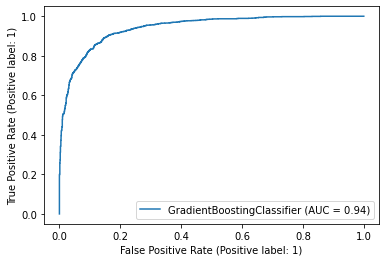

In [217]:
#Plot roc curve
plot_roc_curve(gb,x_test,y_test)

In [218]:
print(gb.score(x_train,y_train)*100)#Training Score
print(gb.score(x_test,y_test)*100)#Testing Score

86.58509205208802
86.76767676767678


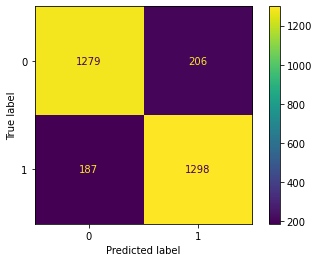

In [219]:
#Plot confusion matrix
plot_confusion_matrix(gb,x_test,y_test)

From the above models I have selected Random Forest for tuning my hyperparameters because its accuracy is bigger than the accuracy of other models.

# Hyperparamter Tuning

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
#Choosing Random Forest Classifier

params = {
    'n_estimators' : [100,120,150,170],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [1,2,3],
    'max_features' : ['sqrt','log2']
}

In [222]:
gs_rf = GridSearchCV(rf,param_grid=params,cv=5)

gs_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [223]:
gs_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [224]:
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 150}

In [225]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_split=3,
                       n_estimators=150)

In [226]:
gs_rf.best_score_

0.8429522626602918

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_split=3,
                       n_estimators=150)
------------------------------------------------------------------------
[0 0 0 ... 1 0 0]
Accuracy Score : 0.8558922558922559
------------------------------------------------------------------------
Classification Report :                precision    recall  f1-score   support

           0       0.87      0.84      0.85      1485
           1       0.85      0.87      0.86      1485

    accuracy                           0.86      2970
   macro avg       0.86      0.86      0.86      2970
weighted avg       0.86      0.86      0.86      2970

-------------------------------------------------------------------------
Confusion Matrix 
------------------------------------------------------------------------


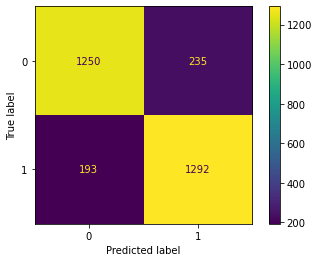

In [227]:
final_model = RandomForestClassifier(max_depth=8, min_samples_split=3,max_features='log2',n_estimators=150,criterion='gini')
print(final_model)
print("------------------------------------------------------------------------")
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(final_model_pred)
print("Accuracy Score :",accuracy_score(y_test,final_model_pred))
print("------------------------------------------------------------------------")
print("Classification Report : ",classification_report(y_test,final_model_pred))
print("-------------------------------------------------------------------------")
print("Confusion Matrix ")
print(plot_confusion_matrix(final_model,x_test,y_test))
print("------------------------------------------------------------------------")

In [228]:
#Cross Validation Score
cross_val_score(final_model,x_test,y_test,cv=5).mean()*100

83.16498316498317

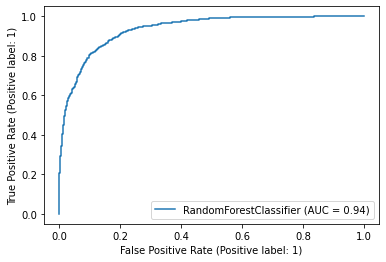

In [229]:
#Plot Roc Curve
plot_roc_curve(final_model,x_test,y_test)

In [230]:
#K fold Cross Validation Score
K = KFold(n_splits=5)
print(K)
cross_val_score(final_model,x_test,y_test,cv=K).mean()*100

KFold(n_splits=5, random_state=None, shuffle=False)


82.86195286195287

In [231]:
#Stratified Shuffle Split Cross Validation Score
Stratified_Shuffle_final_model = StratifiedShuffleSplit(n_splits=5)
print(Stratified_Shuffle_final_model)
cross_val_score(final_model,x_test,y_test,cv=Stratified_Shuffle_final_model).mean()*100

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None)


84.44444444444444

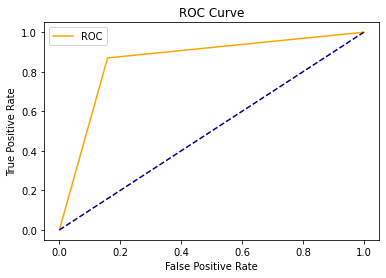

85.58922558922558

In [232]:
fpr,tpr ,thresholds = roc_curve(y_test,final_model_pred)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test,final_model_pred)
auc_score*100

# Saving my best problem for classification

In [233]:
import pickle

In [234]:
filename = "Rainfall Prediction - Weather Forecasting_Classification.pkl"

In [235]:
pickle.dump(final_model,open(filename,'wb'))

# Regression Phase

Now I will start with the regression problem in which i have to predict how much rainfall could be there.

In [274]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1.0,13.4,22.900000,0.6,5.389395,7.632205,13.0,44.000000,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1.0,7.4,25.100000,0.0,5.389395,7.632205,14.0,44.000000,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1.0,12.9,25.700000,0.0,5.389395,7.632205,15.0,46.000000,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1.0,9.2,28.000000,0.0,5.389395,7.632205,4.0,24.000000,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1.0,17.5,32.300000,1.0,5.389395,7.632205,13.0,41.000000,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,0.0,5.389395,7.632205,0.0,31.000000,9.0,1.0,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,2017,6,21
8421,9.0,3.6,25.300000,0.0,5.389395,7.632205,6.0,22.000000,9.0,3.0,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,2017,6,22
8422,9.0,5.4,26.900000,0.0,5.389395,7.632205,3.0,37.000000,9.0,14.0,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,2017,6,23
8423,9.0,7.8,27.000000,0.0,5.389395,7.632205,9.0,28.000000,10.0,3.0,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,2017,6,24


The target variable in above df is Rainfall which I have to predict.

In [275]:
#Exploring the target variable 
df['Rainfall'].value_counts()

0.000000     5071
0.200000      390
2.805913      232
0.400000      176
0.600000      115
             ... 
29.400000       1
29.800000       1
24.800000       1
32.800000       1
26.800000       1
Name: Rainfall, Length: 171, dtype: int64

(array([6763.,  449.,  258.,  183.,  109.,   67.,   62.,   42.,   27.,
          27.]),
 array([ 0.  ,  3.34,  6.68, 10.02, 13.36, 16.7 , 20.04, 23.38, 26.72,
        30.06, 33.4 ]),
 <BarContainer object of 10 artists>)

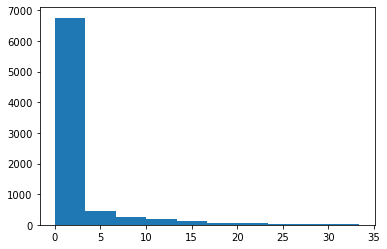

In [276]:
plt.hist(df['Rainfall'])

# Splitting the data into X and Y respectively

In [289]:
X = df.drop(['Rainfall'],axis=1)
Y = df['Rainfall']

In [290]:
X.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1.0,13.4,22.9,5.389395,7.632205,13.0,44.0,13.0,14.0,20.0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1.0,7.4,25.1,5.389395,7.632205,14.0,44.0,6.0,15.0,4.0,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1.0,12.9,25.7,5.389395,7.632205,15.0,46.0,13.0,15.0,19.0,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1.0,9.2,28.0,5.389395,7.632205,4.0,24.0,9.0,0.0,11.0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1.0,17.5,32.3,5.389395,7.632205,13.0,41.0,1.0,7.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [291]:
X.shape

(7987, 24)

In [292]:
Y.shape

(7987,)

In [293]:
Y.head()

0    0.6
1    0.0
2    0.0
3    0.0
4    1.0
Name: Rainfall, dtype: float64

# Check for skewness

In [294]:
X.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.115889
RainTomorrow     1.115889
year             0.430100
month            0.054460
day              0.002731
dtype: float64

In [295]:
Y.skew()

3.488445646546424

# VIF

In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,1.587606,Location
1,8.852225,MinTemp
2,26.904320,MaxTemp
3,1.558796,Evaporation
4,2.073098,Sunshine
5,1.618366,WindGustDir
6,2.280657,WindGustSpeed
7,1.348090,WindDir9am
8,1.481808,WindDir3pm
9,1.997327,WindSpeed9am


In [317]:
#Dropping Pressure9am ,Temp9am,Temp3pm
X.drop(['Pressure9am','Temp9am','Temp3pm'],axis=1,inplace=True)   

In [318]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,1.584706,Location
1,4.739634,MinTemp
2,5.613585,MaxTemp
3,1.535571,Evaporation
4,2.053869,Sunshine
5,1.601755,WindGustDir
6,2.209407,WindGustSpeed
7,1.323439,WindDir9am
8,1.414098,WindDir3pm
9,1.978572,WindSpeed9am


# Power Transformer

In [319]:
from sklearn.preprocessing import PowerTransformer

In [320]:
p_transform_reg = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform_reg.fit_transform(X), columns=X.columns)
X.head(5)

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,-1.503575,0.036254,-0.076936,0.179282,-0.101739,1.195694,0.433142,1.208791,1.445926,0.777217,...,0.141097,-1.665926,-1.404854,1.587353,-0.065102,-0.58723,-0.58723,-1.668219,1.59284,-1.751009
1,-1.503575,-1.053975,0.286058,0.179282,-0.101739,1.381789,0.433142,-0.196334,1.699687,-0.983565,...,-1.417898,-1.482555,-1.284535,-0.100749,-0.065102,-0.58723,-0.58723,-1.668219,1.59284,-1.601431
2,-1.503575,-0.056639,0.382008,0.179282,-0.101739,1.565285,0.578790,1.208791,1.699687,0.689311,...,-1.728714,-1.183861,-1.130128,-0.100749,-1.075236,-0.58723,-0.58723,-1.668219,1.59284,-1.463221
3,-1.503575,-0.731329,0.738844,0.179282,-0.101739,-0.624506,-1.256457,0.433454,-1.723492,-0.091313,...,-1.364768,-2.044660,-0.430780,-0.100749,-0.065102,-0.58723,-0.58723,-1.668219,1.59284,-1.332486
4,-1.503575,0.813530,1.364830,0.179282,-0.101739,1.195694,0.208404,-1.471213,-0.224321,-0.560149,...,0.849284,-1.008145,-1.594324,1.051724,1.664273,-0.58723,-0.58723,-1.668219,1.59284,-1.207092


In [321]:
X.skew()

Location        -0.028502
MinTemp         -0.010883
MaxTemp         -0.009553
Evaporation      0.138827
Sunshine        -0.035128
WindGustDir     -0.047565
WindGustSpeed    0.008825
WindDir9am      -0.042675
WindDir3pm      -0.017842
WindSpeed9am     0.005738
WindSpeed3pm     0.003293
Humidity9am     -0.019201
Humidity3pm      0.000060
Pressure3pm      0.000940
Cloud9am        -0.034573
Cloud3pm        -0.017803
RainToday        1.115889
RainTomorrow     1.115889
year             0.423418
month           -0.028561
day             -0.040238
dtype: float64

# Feature Scaling

In [322]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler

StandardScaler()

In [323]:
X_scaled_reg = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled_reg.head(5)

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,-1.503575,0.036254,-0.076936,0.179282,-0.101739,1.195694,0.433142,1.208791,1.445926,0.777217,...,0.141097,-1.665926,-1.404854,1.587353,-0.065102,-0.58723,-0.58723,-1.668219,1.59284,-1.751009
1,-1.503575,-1.053975,0.286058,0.179282,-0.101739,1.381789,0.433142,-0.196334,1.699687,-0.983565,...,-1.417898,-1.482555,-1.284535,-0.100749,-0.065102,-0.58723,-0.58723,-1.668219,1.59284,-1.601431
2,-1.503575,-0.056639,0.382008,0.179282,-0.101739,1.565285,0.578790,1.208791,1.699687,0.689311,...,-1.728714,-1.183861,-1.130128,-0.100749,-1.075236,-0.58723,-0.58723,-1.668219,1.59284,-1.463221
3,-1.503575,-0.731329,0.738844,0.179282,-0.101739,-0.624506,-1.256457,0.433454,-1.723492,-0.091313,...,-1.364768,-2.044660,-0.430780,-0.100749,-0.065102,-0.58723,-0.58723,-1.668219,1.59284,-1.332486
4,-1.503575,0.813530,1.364830,0.179282,-0.101739,1.195694,0.208404,-1.471213,-0.224321,-0.560149,...,0.849284,-1.008145,-1.594324,1.051724,1.664273,-0.58723,-0.58723,-1.668219,1.59284,-1.207092


# Model Building

In [324]:
#import required libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

In [325]:
X_scaled_reg

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,-1.503575,0.036254,-0.076936,0.179282,-0.101739,1.195694,0.433142,1.208791,1.445926,0.777217,...,0.141097,-1.665926,-1.404854,1.587353,-0.065102,-0.58723,-0.58723,-1.668219,1.592840,-1.751009
1,-1.503575,-1.053975,0.286058,0.179282,-0.101739,1.381789,0.433142,-0.196334,1.699687,-0.983565,...,-1.417898,-1.482555,-1.284535,-0.100749,-0.065102,-0.58723,-0.58723,-1.668219,1.592840,-1.601431
2,-1.503575,-0.056639,0.382008,0.179282,-0.101739,1.565285,0.578790,1.208791,1.699687,0.689311,...,-1.728714,-1.183861,-1.130128,-0.100749,-1.075236,-0.58723,-0.58723,-1.668219,1.592840,-1.463221
3,-1.503575,-0.731329,0.738844,0.179282,-0.101739,-0.624506,-1.256457,0.433454,-1.723492,-0.091313,...,-1.364768,-2.044660,-0.430780,-0.100749,-0.065102,-0.58723,-0.58723,-1.668219,1.592840,-1.332486
4,-1.503575,0.813530,1.364830,0.179282,-0.101739,1.195694,0.208404,-1.471213,-0.224321,-0.560149,...,0.849284,-1.008145,-1.594324,1.051724,1.664273,-0.58723,-0.58723,-1.668219,1.592840,-1.207092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.028389,-1.870538,0.007176,0.179282,-0.101739,-1.720034,-0.606101,0.433454,-1.497492,0.119208,...,-1.038352,-1.543298,0.831694,-0.100749,-0.065102,-0.58723,-0.58723,1.995244,-0.095242,0.601806
7983,1.028389,-1.728889,0.318180,0.179282,-0.101739,-0.191632,-1.458868,0.433454,-1.071395,0.119208,...,-0.756605,-1.727853,0.631144,-0.100749,-0.065102,-0.58723,-0.58723,1.995244,-0.095242,0.714115
7984,1.028389,-1.409896,0.570283,0.179282,-0.101739,-0.856499,-0.104222,0.433454,1.445926,-0.316019,...,-0.926700,-1.543298,0.245215,-0.100749,-0.065102,-0.58723,-0.58723,1.995244,-0.095242,0.826395
7985,1.028389,-0.982500,0.585762,0.179282,-0.101739,0.422282,-0.874962,0.633575,-1.071395,0.119208,...,-1.038352,-1.543298,0.194728,-0.709709,-1.075236,-0.58723,-0.58723,1.995244,-0.095242,0.938617


In [326]:
Y

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 7987, dtype: float64

# Linear Regression

First we will start with Linear Regression to find the best random state for building our Linear Regression Model.

In [327]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    lr_r2 = r2_score(y_test, y_lr)
    
    if lr_r2>maxAccuracy:
        maxAccuracy=lr_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.4954217826193784  on Random State 67


In [328]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=67)

#training our model
lr=LinearRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
lr_r2 = r2_score(y_test, y_lr)

#R2 Score
print("R2 score : ", lr_r2*100)

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled_reg,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean()*100)

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_lr))
print("Mean Square Error : ",mean_squared_error(y_test,y_lr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_lr)))

R2 score :  49.54217826193784
[0.50365695 0.45037746 0.44380501 0.38272294 0.49937837]
Cross Validation Score :  45.59881452008889
Mean Absolute Error : 1.5744220703647882
Mean Square Error :  10.958502962707708
Root Mean Square Error : 3.3103629654023905


In [329]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_scaled_reg,Y,cv=K_fold)
print(l1)
print("K-Fold Cross Validation Score : " , l1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.50365695 0.45037746 0.44380501 0.38272294 0.49937837]
K-Fold Cross Validation Score :  45.59881452008889


In [330]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
l2 = cross_val_score(lr,X_scaled_reg,Y,cv=shuffle)
print(l2)
print("Shuffle Split : ",l2.mean()*100)

ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.47901921 0.47821608 0.47396625 0.47338643 0.46973256]
Shuffle Split :  47.48641032681646


# Decision Tree

In [331]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    dt_r2 = r2_score(y_test, y_dt)
    
    if dt_r2>maxAccuracy:
        maxAccuracy=dt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.4679051680926588  on Random State 25


In [332]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=25)

#training our model
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
dt_r2 = r2_score(y_test, y_dt)

#R2 Score
print("R2 score : ", dt_r2*100)

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled_reg,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean()*100)

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_dt))
print("Mean Square Error : ",mean_squared_error(y_test,y_dt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_dt)))

R2 score :  43.173441738058216
[-0.12217779  0.36779473  0.59238662  0.00140716  0.27455787]
Cross Validation Score :  22.279371856265836
Mean Absolute Error : 1.0695499796248058
Mean Square Error :  13.221796197591013
Root Mean Square Error : 3.636178790652491


In [333]:
#K-Fold Cross Validation
K_fold = KFold(5)
print(K_fold)
l11 = cross_val_score(dt,X_scaled_reg,Y,cv=K_fold)
print(l11)
print("K-Fold Cross Validation Score : " , l11.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[-0.18214421  0.34017599  0.58746662 -0.05560095  0.30435401]
K-Fold Cross Validation Score :  0.19885029161653933


In [334]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
l21 = cross_val_score(dt,X_scaled_reg,Y,cv=shuffle)
print(l21)
print("Shuffle Split : ",l21.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.38072992 0.284065   0.21068063 0.33824576 0.36606512]
Shuffle Split :  0.315957284054621


# KNN

In [335]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    knn_r2 = r2_score(y_test, y_knn)
    
    if knn_r2>maxAccuracy:
        maxAccuracy=knn_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5094528406502291  on Random State 67


In [336]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=67)

#training our model
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
knn_r2 = r2_score(y_test, y_knn)

#R2 Score
print("R2 score : ", knn_r2*100)

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled_reg,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean()*100)

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_knn))
print("Mean Square Error : ",mean_squared_error(y_test,y_knn))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_knn)))

R2 score :  50.94528406502291
[0.41774788 0.38642112 0.4103563  0.3157523  0.3547927 ]
Cross Validation Score :  37.70140606458131
Mean Absolute Error : 1.2877344053310376
Mean Square Error :  10.653774407838254
Root Mean Square Error : 3.2640120109825355


In [337]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
k = cross_val_score(knn,X_scaled_reg,Y,cv=K_fold)
print(k)
print("K-Fold Cross Validation Score : " , k.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.41774788 0.38642112 0.4103563  0.3157523  0.3547927 ]
K-Fold Cross Validation Score :  0.37701406064581316


In [338]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
k1 = cross_val_score(knn,X_scaled_reg,Y,cv=shuffle)
print(k1)
print("Shuffle Split : ",k1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.45550241 0.43554039 0.41833218 0.43520664 0.41544175]
Shuffle Split :  0.43200467459018455


# Random Forest

In [339]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    rf_r2 = r2_score(y_test, y_rf)
    
    if rf_r2>maxAccuracy:
        maxAccuracy=rf_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.6569511221949709  on Random State 79


In [340]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=79)

#training our model
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
rf_r2 = r2_score(y_test, y_rf)

#R2 Score
print("R2 score : ", rf_r2*100)

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled_reg,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean()*100)

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_rf))
print("Mean Square Error : ",mean_squared_error(y_test,y_rf))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_rf)))

R2 score :  65.45214633759656
[0.47162194 0.55063935 0.69033083 0.50343355 0.53806034]
Cross Validation Score :  55.08172030213725
Mean Absolute Error : 1.0512348025135263
Mean Square Error :  7.008743492514085
Root Mean Square Error : 2.6474031601767956


In [341]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
r = cross_val_score(rf,X_scaled_reg,Y,cv=K_fold)
print(r)
print("K-Fold Cross Validation Score : " , r.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.46663326 0.55325335 0.68852411 0.50753135 0.52488036]
K-Fold Cross Validation Score :  0.5481644862161893


In [342]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
r1 = cross_val_score(rf,X_scaled_reg,Y,cv=shuffle)
print(r1)
print("Shuffle Split : ",r1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.5678186  0.58575261 0.59784666 0.5995961  0.59000951]
Shuffle Split :  0.5882046951523938


# Gradient boost

In [343]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=i)
    gb=GradientBoostingRegressor()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    gb_r2 = r2_score(y_test, y_gb)
    
    if gb_r2>maxAccuracy:
        maxAccuracy=gb_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5512468007870808  on Random State 67


In [344]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=67)

#training our model
gb=GradientBoostingRegressor()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
gb_r2 = r2_score(y_test, y_gb)

#R2 Score
print("R2 score : ", gb_r2)

#Cross Validation Score
cross_score_gb = cross_val_score(gb,X_scaled_reg,Y,cv=5)
print(cross_score_gb)
print("Cross Validation Score : ",cross_score_gb.mean()*100)

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_gb))
print("Mean Square Error : ",mean_squared_error(y_test,y_gb))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_gb)))

R2 score :  0.5501113077403711
[0.4980627  0.49343973 0.54867124 0.43719965 0.46322514]
Cross Validation Score :  48.81196932725421
Mean Absolute Error : 1.3255917822261587
Mean Square Error :  9.77074791815058
Root Mean Square Error : 3.1258195594356657


In [349]:
K_fold = KFold(5)
print(K_fold)
g = cross_val_score(gb,X_scaled_reg,Y,cv=K_fold)
print(g)
print("K-Fold Cross Validation Score : " , g.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.49875883 0.49232788 0.54853944 0.43433155 0.48333435]
K-Fold Cross Validation Score :  0.49145840876826535


In [350]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
g1 = cross_val_score(gb,X_scaled_reg,Y,cv=shuffle)
print(g1)
print("Shuffle Split : ",g1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.52090899 0.52148615 0.52924498 0.51091858 0.50648039]
Shuffle Split :  0.5178078201474366


# XGBoost

In [347]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=i)
    xgbt=xgb.XGBRegressor()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    xgbt_r2 = r2_score(y_test, y_xgbt)
    
    if xgbt_r2>maxAccuracy:
        maxAccuracy=xgbt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.6468311816682952  on Random State 79


In [348]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_reg, Y, test_size=0.30, random_state=79)

#training our model
xgbt=xgb.XGBRegressor()
xgbt.fit(x_train, y_train)

#Predicting y_test
y_xgbt = xgbt.predict(x_test)
xgbt_r2 = r2_score(y_test, y_xgbt)

#R2 Score
print("R2 score : ", xgbt_r2*100)

#Cross Validation Score
cross_score_xgbt = cross_val_score(xgbt,X_scaled_reg,Y,cv=5)
print(cross_score_xgbt)
print("Cross Validation Score : ",cross_score_xgbt.mean()*100)

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_xgbt))
print("Mean Square Error : ",mean_squared_error(y_test,y_xgbt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_xgbt)))

R2 score :  64.68311816682953
[0.41239992 0.54235571 0.74826469 0.48204895 0.41045763]
Cross Validation Score :  51.91053793978588
Mean Absolute Error : 1.0687265333450364
Mean Square Error :  7.164756692063121
Root Mean Square Error : 2.676706314122474


In [351]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
xg = cross_val_score(xgbt,X_scaled_reg,Y,cv=K_fold)
print(xg)
print("K-Fold Cross Validation Score : " , xg.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.41239992 0.54235571 0.74826469 0.48204895 0.41045763]
K-Fold Cross Validation Score :  0.5191053793978588


In [352]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
xg1 = cross_val_score(xgbt,X_scaled_reg,Y,cv=shuffle)
print(xg1)
print("Shuffle Split : ",xg1.mean())

ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.57119878 0.48869132 0.60837938 0.57684882 0.56882715]
Shuffle Split :  0.5627890872231669


From the above models I have selected Random Forest for tuning my hyperparameters because its r2score is bigger than the r2score of other models.

# R2 Scores

The overall r2 scores for regression phase : 

In [353]:
print("R2 Scores : ")
print("---------------------------------------------")
print("Linear Regression :        ",lr_r2*100)
print("Decision Tree :            ",dt_r2*100)
print("KNN :                      ",knn_r2*100)
print("Random Forest :            ",rf_r2*100)
print("Gradient Boost :           ",gb_r2*100)
print("XGBoost :                  ", xgbt_r2*100)

R2 Scores : 
---------------------------------------------
Linear Regression :         49.54217826193784
Decision Tree :             43.173441738058216
KNN :                       50.94528406502291
Random Forest :             65.45214633759656
Gradient Boost :            55.011130774037106
XGBoost :                   64.68311816682953


# HyperParameter Tuning

In [354]:
from sklearn.model_selection import GridSearchCV

In [356]:
#Choosing RandomForestRegressor 

params1 = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [2,3,4,5,6],
    'min_samples_split' : [2,3,4,5],
    'max_features' : ['sqrt','log2'],
    'n_estimators' : [120,150,175,200]
}

In [357]:
gs_rf_reg = GridSearchCV(rf,param_grid=params1,scoring='neg_mean_squared_error',verbose=1)

gs_rf_reg

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [120, 150, 175, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [358]:
gs_rf_reg.fit(x_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [120, 150, 175, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [360]:
gs_rf_reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 175}

In [361]:
gs_rf_reg.best_estimator_

RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_split=3,
                      n_estimators=175)

In [362]:
gs_rf_reg.best_score_

-12.057872017639024

In [363]:
final_model_reg = RandomForestRegressor(criterion='squared_error',max_depth=6,max_features='sqrt',min_samples_split=3,n_estimators=175)
print(final_model_reg)
print("------------------------------------------------------------------------")
final_model_reg.fit(x_train,y_train)
final_model_reg_pred = final_model_reg.predict(x_test)
print(final_model_reg_pred)
print("R2 Score :",r2_score(y_test,final_model_reg_pred))
print("------------------------------------------------------------------------")
print("Mean Absolute Error :",mean_absolute_error(y_test,final_model_reg_pred))
print("Mean Square Error : ",mean_squared_error(y_test,final_model_reg_pred))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,final_model_reg_pred)))
print("------------------------------------------------------------------------")

RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_split=3,
                      n_estimators=175)
------------------------------------------------------------------------
[0.30673028 6.22485893 7.64464824 ... 0.47158502 0.53842348 5.24624536]
R2 Score : 0.5263352057734707
------------------------------------------------------------------------
Mean Absolute Error : 1.4054273109523967
Mean Square Error :  9.609265677135143
Root Mean Square Error : 3.099881558565608
------------------------------------------------------------------------


In [364]:
#Cross val score
cross_val_score(final_model_reg,x_test,y_test,cv=5).mean()

0.4761827494436369

In [365]:
#K fold Cross Validation Score
K = KFold(n_splits=5)
print(K)
cross_val_score(final_model_reg,x_test,y_test,cv=K).mean()*100

KFold(n_splits=5, random_state=None, shuffle=False)


47.10783013633934

# Saving my best model

In [366]:
import pickle

In [367]:
filename = "Rainfall Prediction - Weather Forecasting_Regression.pkl"

In [368]:
pickle.dump(rf,open(filename,'wb'))